<a href="https://colab.research.google.com/github/Viny2030/colabs/blob/main/polars_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Getting Started with Polars

## Introduction

## Installing Polars

https://catalog.data.gov/dataset/?q=vehicles.csv&sort=views_recent+desc&tags=vehicle&ext_location=&ext_bbox=&ext_prev_extent=


In [36]:
import polars as pl

In [37]:
import polars as pl
pl.__version__

'1.9.0'

In [38]:
df_ops = set(x for x in dir(pl.DataFrame()) if not x.startswith('_'))
lazy_ops = set(x for x in dir(pl.LazyFrame()) if not x.startswith('_'))
print(sorted(df_ops - lazy_ops))

['corr', 'drop_in_place', 'equals', 'estimated_size', 'extend', 'flags', 'fold', 'get_column', 'get_column_index', 'get_columns', 'glimpse', 'hash_rows', 'height', 'hstack', 'insert_column', 'is_duplicated', 'is_empty', 'is_unique', 'item', 'iter_columns', 'iter_rows', 'iter_slices', 'map_rows', 'max_horizontal', 'mean_horizontal', 'min_horizontal', 'n_chunks', 'n_unique', 'partition_by', 'pivot', 'plot', 'product', 'rechunk', 'replace_column', 'row', 'rows', 'rows_by_key', 'sample', 'shape', 'shrink_to_fit', 'style', 'sum_horizontal', 'to_arrow', 'to_dict', 'to_dicts', 'to_dummies', 'to_init_repr', 'to_jax', 'to_numpy', 'to_pandas', 'to_series', 'to_struct', 'to_torch', 'transpose', 'unstack', 'upsample', 'vstack', 'write_avro', 'write_clipboard', 'write_csv', 'write_database', 'write_delta', 'write_excel', 'write_ipc', 'write_ipc_stream', 'write_json', 'write_ndjson', 'write_parquet']


In [39]:
df_ops

{'approx_n_unique',
 'bottom_k',
 'cast',
 'clear',
 'clone',
 'collect_schema',
 'columns',
 'corr',
 'count',
 'describe',
 'deserialize',
 'drop',
 'drop_in_place',
 'drop_nulls',
 'dtypes',
 'equals',
 'estimated_size',
 'explode',
 'extend',
 'fill_nan',
 'fill_null',
 'filter',
 'flags',
 'fold',
 'gather_every',
 'get_column',
 'get_column_index',
 'get_columns',
 'glimpse',
 'group_by',
 'group_by_dynamic',
 'hash_rows',
 'head',
 'height',
 'hstack',
 'insert_column',
 'interpolate',
 'is_duplicated',
 'is_empty',
 'is_unique',
 'item',
 'iter_columns',
 'iter_rows',
 'iter_slices',
 'join',
 'join_asof',
 'join_where',
 'lazy',
 'limit',
 'map_rows',
 'max',
 'max_horizontal',
 'mean',
 'mean_horizontal',
 'median',
 'melt',
 'merge_sorted',
 'min',
 'min_horizontal',
 'n_chunks',
 'n_unique',
 'null_count',
 'partition_by',
 'pipe',
 'pivot',
 'plot',
 'product',
 'quantile',
 'rechunk',
 'rename',
 'replace_column',
 'reverse',
 'rolling',
 'row',
 'rows',
 'rows_by_key',
 

In [40]:
lazy_ops

{'approx_n_unique',
 'bottom_k',
 'cache',
 'cast',
 'clear',
 'clone',
 'collect',
 'collect_async',
 'collect_schema',
 'columns',
 'count',
 'describe',
 'deserialize',
 'drop',
 'drop_nulls',
 'dtypes',
 'explain',
 'explode',
 'fetch',
 'fill_nan',
 'fill_null',
 'filter',
 'first',
 'gather_every',
 'group_by',
 'group_by_dynamic',
 'head',
 'inspect',
 'interpolate',
 'join',
 'join_asof',
 'join_where',
 'last',
 'lazy',
 'limit',
 'map_batches',
 'max',
 'mean',
 'median',
 'melt',
 'merge_sorted',
 'min',
 'null_count',
 'pipe',
 'profile',
 'quantile',
 'rename',
 'reverse',
 'rolling',
 'schema',
 'select',
 'select_seq',
 'serialize',
 'set_sorted',
 'shift',
 'show_graph',
 'sink_csv',
 'sink_ipc',
 'sink_ndjson',
 'sink_parquet',
 'slice',
 'sort',
 'sql',
 'std',
 'sum',
 'tail',
 'top_k',
 'unique',
 'unnest',
 'unpivot',
 'update',
 'var',
 'width',
 'with_columns',
 'with_columns_seq',
 'with_context',
 'with_row_count',
 'with_row_index'}

In [41]:
print(sorted(lazy_ops & df_ops))

['approx_n_unique', 'bottom_k', 'cast', 'clear', 'clone', 'collect_schema', 'columns', 'count', 'describe', 'deserialize', 'drop', 'drop_nulls', 'dtypes', 'explode', 'fill_nan', 'fill_null', 'filter', 'gather_every', 'group_by', 'group_by_dynamic', 'head', 'interpolate', 'join', 'join_asof', 'join_where', 'lazy', 'limit', 'max', 'mean', 'median', 'melt', 'merge_sorted', 'min', 'null_count', 'pipe', 'quantile', 'rename', 'reverse', 'rolling', 'schema', 'select', 'select_seq', 'serialize', 'set_sorted', 'shift', 'slice', 'sort', 'sql', 'std', 'sum', 'tail', 'top_k', 'unique', 'unnest', 'unpivot', 'update', 'var', 'width', 'with_columns', 'with_columns_seq', 'with_row_count', 'with_row_index']


In [42]:
col = pl.col('sample')
col_ops = set(x for x in dir(col) if not x.startswith('_'))
print(sorted(col_ops))

['abs', 'add', 'agg_groups', 'alias', 'all', 'and_', 'any', 'append', 'approx_n_unique', 'arccos', 'arccosh', 'arcsin', 'arcsinh', 'arctan', 'arctanh', 'arg_max', 'arg_min', 'arg_sort', 'arg_true', 'arg_unique', 'arr', 'backward_fill', 'bin', 'bitwise_and', 'bitwise_count_ones', 'bitwise_count_zeros', 'bitwise_leading_ones', 'bitwise_leading_zeros', 'bitwise_or', 'bitwise_trailing_ones', 'bitwise_trailing_zeros', 'bitwise_xor', 'bottom_k', 'bottom_k_by', 'cast', 'cat', 'cbrt', 'ceil', 'clip', 'cos', 'cosh', 'cot', 'count', 'cum_count', 'cum_max', 'cum_min', 'cum_prod', 'cum_sum', 'cumulative_eval', 'cut', 'degrees', 'deserialize', 'diff', 'dot', 'drop_nans', 'drop_nulls', 'dt', 'entropy', 'eq', 'eq_missing', 'ewm_mean', 'ewm_mean_by', 'ewm_std', 'ewm_var', 'exclude', 'exp', 'explode', 'extend_constant', 'fill_nan', 'fill_null', 'filter', 'first', 'flatten', 'floor', 'floordiv', 'forward_fill', 'from_json', 'gather', 'gather_every', 'ge', 'get', 'gt', 'has_nulls', 'hash', 'head', 'hist'

In [43]:
(col
 .cast(pl.Int32)
 .fill_null(col.mean())
 .clip(upper_bound=100)
 .sample(10)
 .mean()
)

<Expr ['col("sample").strict_cast(Int3…'] at 0x7C6A20353E80>



"col.cast(pl.Int32).fill_null(col.mean()).clip(upper_bound=100).sample(10).mean()"


##"Toma la columna col, cástala a tipo entero de 32 bits, rellena los valores nulos con la media de la columna, recorta los valores mayores a 100 a 100, toma una muestra aleatoria de 10 valores y calcula la media de esa muestra."

Explicación paso a paso:

##col.cast(pl.Int32): Convierte la columna col a un tipo de dato entero de 32 bits.
##fill_null(col.mean()): Rellena los valores nulos en la columna con el valor promedio de la columna.
##clip(upper_bound=100): Limita los valores de la columna a un máximo de 100.
##sample(10): Muestra aleatoriamente 10 valores de la columna.
##mean(): Calcula la media (promedio) de los 10 valores muestreados.
En resumen:

# Esta expresión de Polars realiza una serie de operaciones para limpiar y procesar una columna de datos numéricos:

`Limpieza de datos: convierte los valores a enteros y rellena los valores faltantes.`
`Transformación de datos: limita los valores extremos.`
`Muestreo: selecciona una muestra aleatoria de los datos.`
`Análisis estadístico: calcula la media de la muestra.`
##Esto es útil para obtener una estimación rápida de la tendencia central de los datos, especialmente cuando se trabaja con grandes conjuntos de datos o datos con valores atípicos.

```pycon
>>> import polars as pl
>>> pl.__version__
'0.20.16'
```

## Polars Data Structures

## Laziness

```pycon
>>> df_ops = set(x for x in dir(pl.DataFrame()) if not x.startswith('_'))
>>> lazy_ops = set(x for x in dir(pl.LazyFrame()) if not x.startswith('_'))
>>> print(sorted(df_ops - lazy_ops))
['apply', 'corr', 'drop_in_place', 'equals', 'estimated_size', 'extend',
     'find_idx_by_name', 'flags', 'fold', 'frame_equal', 'get_column',
     'get_column_index', 'get_columns', 'glimpse', 'hash_rows', 'height',
     'hstack', 'insert_at_idx', 'insert_column', 'is_duplicated',
     'is_empty', 'is_unique', 'item', 'iter_columns', 'iter_rows',
     'iter_slices', 'map_rows', 'max_horizontal', 'mean_horizontal',
     'min_horizontal', 'n_chunks', 'n_unique', 'partition_by', 'pivot',
     'plot', 'product', 'rechunk', 'replace', 'replace_at_idx',
     'replace_column', 'row', 'rows', 'rows_by_key', 'sample', 'shape',
     'shrink_to_fit', 'sum_horizontal', 'to_arrow', 'to_dict', 'to_dicts',
     'to_dummies', 'to_init_repr', 'to_numpy', 'to_pandas', 'to_series',
     'to_struct', 'transpose', 'unstack', 'upsample', 'vstack',
     'write_avro', 'write_csv', 'write_database', 'write_delta',
     'write_excel', 'write_ipc', 'write_ipc_stream', 'write_json',
     'write_ndjson', 'write_parquet']
```

```pycon
>>> print(sorted(lazy_ops & df_ops))
['approx_n_unique', 'bottom_k', 'cast', 'clear', 'clone', 'columns',
     'count', 'describe', 'drop', 'drop_nulls', 'dtypes', 'explode',
     'fill_nan', 'fill_null', 'filter', 'gather_every', 'group_by',
     'group_by_dynamic', 'group_by_rolling', 'groupby', 'groupby_dynamic',
     'groupby_rolling', 'head', 'interpolate', 'join', 'join_asof', 'lazy',
     'limit', 'max', 'mean', 'median', 'melt', 'merge_sorted', 'min',
     'null_count', 'pipe', 'quantile', 'rename', 'reverse', 'rolling',
     'schema', 'select', 'select_seq', 'set_sorted', 'shift',
     'shift_and_fill', 'slice', 'sort', 'std', 'sum', 'tail', 'take_every',
     'top_k', 'unique', 'unnest', 'update', 'var', 'width', 'with_columns',
     'with_columns_seq', 'with_row_count', 'with_row_index']
```

## Contexts & Expressions

```pycon
>>> col = pl.col('sample')
>>> col_ops = set(x for x in dir(col) if not x.startswith('_'))
>>> print(sorted(col_ops))
['abs', 'add', 'agg_groups', 'alias', 'all', 'and_', 'any', 'append',
     'apply', 'approx_n_unique', 'arccos', 'arccosh', 'arcsin', 'arcsinh',
     'arctan', 'arctanh', 'arg_max', 'arg_min', 'arg_sort', 'arg_true',
     'arg_unique', 'arr', 'backward_fill', 'bin', 'bottom_k', 'cast', 'cat',
     'cbrt', 'ceil', 'clip', 'clip_max', 'clip_min', 'cos', 'cosh', 'cot',
     'count', 'cum_count', 'cum_max', 'cum_min', 'cum_prod', 'cum_sum',
     'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'cumulative_eval',
     'cut', 'degrees', 'deserialize', 'diff', 'dot', 'drop_nans',
     'drop_nulls', 'dt', 'entropy', 'eq', 'eq_missing', 'ewm_mean',
     'ewm_std', 'ewm_var', 'exclude', 'exp', 'explode', 'extend_constant',
     'fill_nan', 'fill_null', 'filter', 'first', 'flatten', 'floor',
     'floordiv', 'forward_fill', 'from_json', 'gather', 'gather_every',
     'ge', 'get', 'gt', 'hash', 'head', 'hist', 'implode', 'inspect',
     'interpolate', 'is_between', 'is_duplicated', 'is_finite', 'is_first',
     'is_first_distinct', 'is_in', 'is_infinite', 'is_last',
     'is_last_distinct', 'is_nan', 'is_not', 'is_not_nan', 'is_not_null',
     'is_null', 'is_unique', 'keep_name', 'kurtosis', 'last', 'le', 'len',
     'limit', 'list', 'log', 'log10', 'log1p', 'lower_bound', 'lt', 'map',
     'map_alias', 'map_batches', 'map_dict', 'map_elements', 'max', 'mean',
     'median', 'meta', 'min', 'mod', 'mode', 'mul', 'n_unique', 'name',
     'nan_max', 'nan_min', 'ne', 'ne_missing', 'neg', 'not_', 'null_count',
     'or_', 'over', 'pct_change', 'peak_max', 'peak_min', 'pipe', 'pow',
     'prefix', 'product', 'qcut', 'quantile', 'radians', 'rank', 'rechunk',
     'register_plugin', 'reinterpret', 'repeat_by', 'replace', 'reshape',
     'reverse', 'rle', 'rle_id', 'rolling', 'rolling_apply', 'rolling_map',
     'rolling_max', 'rolling_mean', 'rolling_median', 'rolling_min',
     'rolling_quantile', 'rolling_skew', 'rolling_std', 'rolling_sum',
     'rolling_var', 'round', 'round_sig_figs', 'sample', 'search_sorted',
     'set_sorted', 'shift', 'shift_and_fill', 'shrink_dtype', 'shuffle',
     'sign', 'sin', 'sinh', 'skew', 'slice', 'sort', 'sort_by', 'sqrt',
     'std', 'str', 'struct', 'sub', 'suffix', 'sum', 'tail', 'take',
     'take_every', 'tan', 'tanh', 'to_physical', 'top_k', 'truediv',
     'unique', 'unique_counts', 'upper_bound', 'value_counts', 'var',
     'where', 'xor']
```

```pycon
>>> (col
...  .cast(pl.Int32)
...  .fill_null(col.mean())
...  .clip(upper_bound=100)
...  .sample(10)
...  .mean()
... )
<Expr ['col("sample").strict_cast(Int3.'] at 0x10416B8B0>
```

In [44]:
ex1 = col.cast(pl.Int64)
ex2 = ex1.fill_null(col.cast(pl.Int64))
ex3 = ex2.clip(upper_bound=100)
ex4 = ex3.sample(10)
ex5 = ex4.mean()

# **Paso a Paso:**

ex1 = col.cast(pl.Int64):

`Convierte la columna col a un tipo de dato entero de 64 bits.`
ex2 = ex1.fill_null(col.cast(pl.Int64)):

##Rellena los valores nulos en la columna ex1 con el valor promedio de la columna convertida a entero de 64 bits.
ex3 = ex2.clip(upper_bound=100):


##Limita los valores de la columna ex2 a un máximo de 100.
ex4 = ex3.sample(10):

##Muestra aleatoriamente 10 valores de la columna ex3.
ex5 = ex4.mean():

##Calcula la media (promedio) de los 10 valores muestreados en ex4.
# Explicación General:

Este código de Polars realiza una serie de operaciones para limpiar, transformar y analizar una columna de datos numéricos:

# Limpieza de datos: Convierte los valores a enteros de 64 bits y rellena los valores faltantes con el promedio de la columna.
# Transformación de datos: Limita los valores extremos a un máximo de 100.
# Muestreo: Selecciona una muestra aleatoria de 10 valores.
# Análisis estadístico: Calcula la media de la muestra.
Este proceso es útil para obtener una estimación rápida de la tendencia central de los datos, especialmente cuando se trabaja con grandes conjuntos de datos o datos con valores atípicos.

In [45]:
pl.col.a_column

<Expr ['col("a_column")'] at 0x7C6A20242710>


##En español, pl.col.a_column se puede traducir aproximadamente como "pl.col('a_column')".

# Explicación Detallada:
##pl: Esta es una abreviatura común para la biblioteca de Python Polars. Polars es una biblioteca de procesamiento de datos de alto rendimiento diseñada para ser rápida y fácil de usar.

##col: Esta es una función en Polars que se utiliza para seleccionar una columna específica de un DataFrame. Es decir, te permite acceder a los datos contenidos en una columna particular.

##a_column: Este es el nombre de la columna que deseas seleccionar. En este caso, estamos seleccionando una columna llamada "a_column".

# En resumen:
##pl.col('a_column') en Polars significa "seleccionar la columna llamada 'a_column' de un DataFrame". Esta expresión te permite trabajar con los datos de esa columna específica, como aplicar operaciones, filtrar, agrupar, etc.

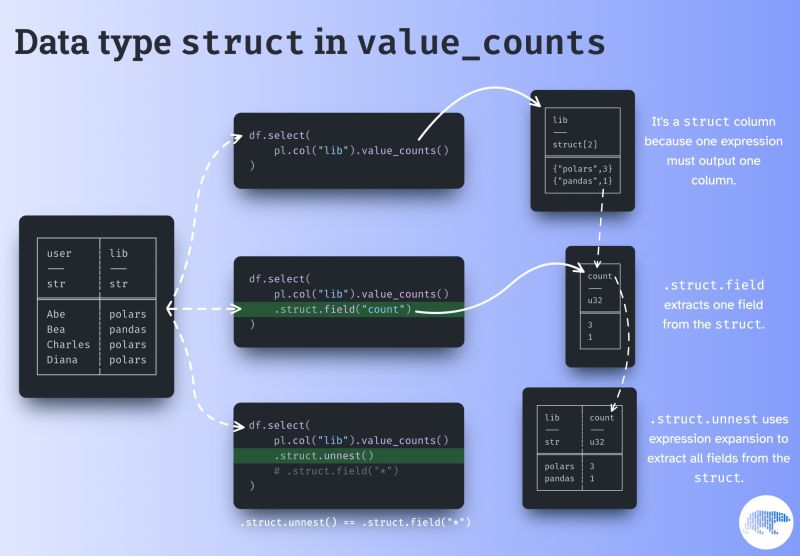

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pl.read_csv('/content/drive/MyDrive/polars/Electric_Vehicle_Population_Data.csv', null_values=['NA'])
df

shape: (210_165, 17)
┌────────────┬───────────┬────────────┬───────┬───┬────────────┬───────────┬───────────┬───────────┐
│ VIN (1-10) ┆ County    ┆ City       ┆ State ┆ … ┆ DOL        ┆ Vehicle   ┆ Electric  ┆ 2020      │
│ ---        ┆ ---       ┆ ---        ┆ ---   ┆   ┆ Vehicle ID ┆ Location  ┆ Utility   ┆ Census    │
│ str        ┆ str       ┆ str        ┆ str   ┆   ┆ ---        ┆ ---       ┆ ---       ┆ Tract     │
│            ┆           ┆            ┆       ┆   ┆ i64        ┆ str       ┆ str       ┆ ---       │
│            ┆           ┆            ┆       ┆   ┆            ┆           ┆           ┆ i64       │
╞════════════╪═══════════╪════════════╪═══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 5UXTA6C0XM ┆ Kitsap    ┆ Seabeck    ┆ WA    ┆ … ┆ 267929112  ┆ POINT (-1 ┆ PUGET     ┆ 530350913 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.872833 ┆ SOUND     ┆ 01        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 4 47.5798 ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ 304…      ┆ INC       ┆           │
│ 5YJ3E1EB1J ┆ Kitsap    ┆ Poulsbo    ┆ WA    ┆ … ┆ 475911439  ┆ POINT (-1 ┆ PUGET     ┆ 530350911 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.636888 ┆ SOUND     ┆ 00        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 4 47.7469 ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ 547…      ┆ INC       ┆           │
│ WP0AD2A73G ┆ Snohomish ┆ Bothell    ┆ WA    ┆ … ┆ 101971278  ┆ POINT (-1 ┆ PUGET     ┆ 530610520 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.206146 ┆ SOUND     ┆ 09        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 47.839957 ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ )         ┆ INC       ┆           │
│ 5YJ3E1EB5J ┆ Kitsap    ┆ Bremerton  ┆ WA    ┆ … ┆ 474363746  ┆ POINT (-1 ┆ PUGET     ┆ 530350802 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.623189 ┆ SOUND     ┆ 00        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 5 47.5930 ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ 874…      ┆ INC       ┆           │
│ 1N4AZ1CP3K ┆ King      ┆ Redmond    ┆ WA    ┆ … ┆ 476346482  ┆ POINT (-1 ┆ PUGET     ┆ 530330323 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.13158  ┆ SOUND     ┆ 23        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 47.67858) ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆           ┆ INC||CITY ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆           ┆ O…        ┆           │
│ …          ┆ …         ┆ …          ┆ …     ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ KNDCM3LD8J ┆ Grant     ┆ Moses Lake ┆ WA    ┆ … ┆ 347733676  ┆ POINT (-1 ┆ PUD NO 2  ┆ 530250109 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 19.295873 ┆ OF GRANT  ┆ 04        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 8 47.1384 ┆ COUNTY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ 772…      ┆           ┆           │
│ JM3KKBHA0R ┆ Kitsap    ┆ Bremerton  ┆ WA    ┆ … ┆ 254263509  ┆ POINT (-1 ┆ PUGET     ┆ 530350914 │
│            ┆           ┆            ┆       ┆   ┆            ┆ 22.696120 ┆ SOUND     ┆ 00        │
│            ┆           ┆            ┆       ┆   ┆            ┆ 3 47.5759 ┆ ENERGY    ┆           │
│            ┆           ┆            ┆       ┆   ┆            ┆ 584…      ┆ INC       ┆           │
│ JTMAB3FV3P ┆ Pierce    ┆ University ┆ WA    ┆ … ┆ 254488797  ┆ POINT (-1 ┆ BONNEVILL ┆ 530530723 │
│            ┆           ┆ Place      ┆       ┆   ┆            ┆ 22.538546 ┆ E POWER   ┆ 07        │
│            ┆           ┆            ┆ 

In [48]:
type(df)

polars.dataframe.frame.DataFrame

In [66]:
df.schema

Schema([('VIN (1-10)', String),
        ('County', String),
        ('City', String),
        ('State', String),
        ('Postal Code', Int64),
        ('Model Year', Int64),
        ('Make', String),
        ('Model', String),
        ('Electric Vehicle Type', String),
        ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
        ('Electric Range', Int64),
        ('Base MSRP', Int64),
        ('Legislative District', Int64),
        ('DOL Vehicle ID', Int64),
        ('Vehicle Location', String),
        ('Electric Utility', String),
        ('2020 Census Tract', Int64)])

In [67]:
lazy = pl.scan_csv('/content/drive/MyDrive/polars/Electric_Vehicle_Population_Data.csv', null_values=['NA'])
print(lazy)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

Csv SCAN [/content/drive/MyDrive/polars/Electric_Vehicle_Population_Data.csv]
PROJECT */17 COLUMNS


In [51]:
lazy

In [69]:
lazy.collect().schema

Schema([('VIN (1-10)', String),
        ('County', String),
        ('City', String),
        ('State', String),
        ('Postal Code', Int64),
        ('Model Year', Int64),
        ('Make', String),
        ('Model', String),
        ('Electric Vehicle Type', String),
        ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
        ('Electric Range', Int64),
        ('Base MSRP', Int64),
        ('Legislative District', Int64),
        ('DOL Vehicle ID', Int64),
        ('Vehicle Location', String),
        ('Electric Utility', String),
        ('2020 Census Tract', Int64)])

In [72]:
(lazy
       .filter((pl.col('Model Year') >= 1990) & (pl.col('Model Year') < 2000))
       .select(['County', 'Electric Range', 'Model']))

In [53]:
(lazy
       .filter((pl.col('year') >= 1990) & (pl.col('year') < 2000))
       .select(['year', 'region', 'model'])).collect()

shape: (12_494, 3)
┌──────┬───────────────────┬────────────────────┐
│ year ┆ region            ┆ model              │
│ ---  ┆ ---               ┆ ---                │
│ i64  ┆ str               ┆ str                │
╞══════╪═══════════════════╪════════════════════╡
│ 1994 ┆ duluth / superior ┆ century            │
│ 1997 ┆ duluth / superior ┆ f-800              │
│ 1998 ┆ duluth / superior ┆ civic              │
│ 1996 ┆ lubbock           ┆ 1996 Corvette      │
│ 1995 ┆ duluth / superior ┆ silverado 3500     │
│ …    ┆ …                 ┆ …                  │
│ 1990 ┆ albuquerque       ┆ 1990 F350          │
│ 1997 ┆ new haven         ┆ cabrio convertible │
│ 1994 ┆ duluth / superior ┆ f-700              │
│ 1994 ┆ duluth / superior ┆ f-150              │
│ 1999 ┆ duluth / superior ┆ town car           │
└──────┴───────────────────┴────────────────────┘

In [73]:
df.head(3)

shape: (3, 17)
┌────────────┬───────────┬─────────┬───────┬───┬────────────┬────────────┬────────────┬────────────┐
│ VIN (1-10) ┆ County    ┆ City    ┆ State ┆ … ┆ DOL        ┆ Vehicle    ┆ Electric   ┆ 2020       │
│ ---        ┆ ---       ┆ ---     ┆ ---   ┆   ┆ Vehicle ID ┆ Location   ┆ Utility    ┆ Census     │
│ str        ┆ str       ┆ str     ┆ str   ┆   ┆ ---        ┆ ---        ┆ ---        ┆ Tract      │
│            ┆           ┆         ┆       ┆   ┆ i64        ┆ str        ┆ str        ┆ ---        │
│            ┆           ┆         ┆       ┆   ┆            ┆            ┆            ┆ i64        │
╞════════════╪═══════════╪═════════╪═══════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 5UXTA6C0XM ┆ Kitsap    ┆ Seabeck ┆ WA    ┆ … ┆ 267929112  ┆ POINT (-12 ┆ PUGET      ┆ 5303509130 │
│            ┆           ┆         ┆       ┆   ┆            ┆ 2.8728334  ┆ SOUND      ┆ 1          │
│            ┆           ┆         ┆       ┆   ┆            ┆ 47.5798304 ┆ ENERGY INC ┆            │
│            ┆           ┆         ┆       ┆   ┆            ┆ …          ┆            ┆            │
│ 5YJ3E1EB1J ┆ Kitsap    ┆ Poulsbo ┆ WA    ┆ … ┆ 475911439  ┆ POINT (-12 ┆ PUGET      ┆ 5303509110 │
│            ┆           ┆         ┆       ┆   ┆            ┆ 2.6368884  ┆ SOUND      ┆ 0          │
│            ┆           ┆         ┆       ┆   ┆            ┆ 47.7469547 ┆ ENERGY INC ┆            │
│            ┆           ┆         ┆       ┆   ┆            ┆ …          ┆            ┆            │
│ WP0AD2A73G ┆ Snohomish ┆ Bothell ┆ WA    ┆ … ┆ 101971278  ┆ POINT (-12 ┆ PUGET      ┆ 5306105200 │
│            ┆           ┆         ┆       ┆   ┆            ┆ 2.206146   ┆ SOUND      ┆ 9          │
│            ┆           ┆         ┆       ┆   ┆            ┆ 47.839957) ┆ ENERGY INC ┆            │
└────────────┴───────────┴─────────┴───────┴───┴────────────┴────────────┴────────────┴────────────┘

In [74]:
print(df.dtypes)

[String, String, String, String, Int64, Int64, String, String, String, String, Int64, Int64, Int64, Int64, String, String, Int64]


In [61]:
df.schema

Schema([('id', Int64),
        ('url', String),
        ('region', String),
        ('region_url', String),
        ('price', Int64),
        ('year', Int64),
        ('manufacturer', String),
        ('model', String),
        ('condition', String),
        ('cylinders', String),
        ('fuel', String),
        ('odometer', Int64),
        ('title_status', String),
        ('transmission', String),
        ('vin', String),
        ('drive', String),
        ('size', String),
        ('type', String),
        ('paint_color', String),
        ('image_url', String),
        ('description', String),
        ('county', String),
        ('state', String),
        ('lat', Float64),
        ('long', Float64)])

In [75]:
cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany', 'drive',
        'VClass', 'fuel', 'barrels08', 'city08',
         'createdOn']

In [64]:
print(df.select('cols'))

ColumnNotFoundError: cols

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'select' <---
DF ["id", "url", "region", "region_url"]; PROJECT */25 COLUMNS; SELECTION: None

```pycon
>>> pl.col.a_column
<Expr ['col("a_column")'] at 0x163A46110>



## Reading CSV Files

```pycon
>>> url = '../../pylib/datasets/data/vehicles.csv.zip'
>>> import zipfile
>>> with zipfile.ZipFile(url) as z:
...     z.extractall('data/')
>>> path = 'data/vehicles.csv'
>>> df = pl.read_csv(path, null_values=['NA'])
```

```pycon
>>> print(df)
shape: (41_144, 83)
│ barrels0   barrelsA   charge12   .   phevCit   phevHwy   phevCom │
│ 8          08         0              y         i64       b       │
│ f64        f64        f64            i64                 i64     │
╞══════════════════════════════════════════════════════════════════╡
│ 15.70      0.00       0.00       .   0         0         0       │
│ 29.96      0.00       0.00       .   0         0         0       │
│ 12.21      0.00       0.00       .   0         0         0       │
│ .          .          .          .   .         .         .       │
│ 15.70      0.00       0.00       .   0         0         0       │
│ 15.70      0.00       0.00       .   0         0         0       │
│ 18.31      0.00       0.00       .   0         0         0       │
```

## Lazy CSV Reading

```pycon
>>> lazy = pl.scan_csv(path, null_values=['NA'])
>>> print(lazy)
naive plan: (run LazyFrame.explain(optimized=True) to see the optimized
     plan)


  Csv SCAN data/vehicles.csv
  PROJECT */83 COLUMNS
```

```pycon
>>> print(lazy
...   .filter((pl.col('year') >= 1990) & (pl.col('year') < 2000))
...   .select(['year', 'make', 'model'])
... )
naive plan: (run LazyFrame.explain(optimized=True) to see the optimized
     plan)

 SELECT [col("year"), col("make"), col("model")] FROM
  FILTER [([(col("year")) >= (1990)]) & ([(col("year")) < (2000)])] FROM


    Csv SCAN data/vehicles.csv
    PROJECT */83 COLUMNS
```

```pycon
>>> print(lazy
...   .filter((pl.col('year') >= 1990) & (pl.col('year') < 2000))
...   .select(['year', 'make', 'model'])
...   .explain()
... )
FAST_PROJECT: [year, make, model]

    Csv SCAN data/vehicles.csv
    PROJECT 3/83 COLUMNS
    SELECTION: [([(col("year")) >= (1990)]) & ([(col("year")) < (2000)])]
```

## Data Type Inference and Manual Overrides

```pycon
>>> print(df.dtypes)
[Float64, Float64, Float64, Float64, Int64, Float64, Int64, Float64,
     Float64, Float64, Float64, Int64, Int64, Float64, Float64, Int64,
     Float64, Int64, Float64, Float64, Float64, Float64, Int64, Float64,
     String, Int64, String, Int64, Int64, Int64, String, String, Int64,
     Int64, Int64, Float64, Int64, Float64, Float64, Float64, Float64,
     Int64, Int64, Int64, Int64, Int64, String, String, String, Boolean,
     Int64, Int64, Int64, Float64, Float64, Float64, Float64, String,
     Float64, Float64, Float64, Float64, String, Int64, Int64, String,
     String, String, String, String, String, String, String, String, String,
     Float64, String, String, String, String, Int64, Int64, Int64]
```

```pycon
>>> print(df.schema)
OrderedDict([('barrels08', Float64), ('barrelsA08', Float64),
     ('charge120', Float64), ('charge240', Float64), ('city08', Int64),
     ('city08U', Float64), ('cityA08', Int64), ('cityA08U', Float64),
     ('cityCD', Float64), ('cityE', Float64), ('cityUF', Float64), ('co2',
     Int64), ('co2A', Int64), ('co2TailpipeAGpm', Float64),
     ('co2TailpipeGpm', Float64), ('comb08', Int64), ('comb08U', Float64),
     ('combA08', Int64), ('combA08U', Float64), ('combE', Float64),
     ('combinedCD', Float64), ('combinedUF', Float64), ('cylinders', Int64),
     ('displ', Float64), ('drive', String), ('engId', Int64), ('eng_dscr',
     String), ('feScore', Int64), ('fuelCost08', Int64), ('fuelCostA08',
     Int64), ('fuelType', String), ('fuelType1', String), ('ghgScore',
     Int64), ('ghgScoreA', Int64), ('highway08', Int64), ('highway08U',
     Float64), ('highwayA08', Int64), ('highwayA08U', Float64),
     ('highwayCD', Float64), ('highwayE', Float64), ('highwayUF', Float64),
     ('hlv', Int64), ('hpv', Int64), ('id', Int64), ('lv2', Int64), ('lv4',
     Int64), ('make', String), ('model', String), ('mpgData', String),
     ('phevBlended', Boolean), ('pv2', Int64), ('pv4', Int64), ('range',
     Int64), ('rangeCity', Float64), ('rangeCityA', Float64), ('rangeHwy',
     Float64), ('rangeHwyA', Float64), ('trany', String), ('UCity',
     Float64), ('UCityA', Float64), ('UHighway', Float64), ('UHighwayA',
     Float64), ('VClass', String), ('year', Int64), ('youSaveSpend', Int64),
     ('guzzler', String), ('trans_dscr', String), ('tCharger', String),
     ('sCharger', String), ('atvType', String), ('fuelType2', String),
     ('rangeA', String), ('evMotor', String), ('mfrCode', String),
     ('c240Dscr', String), ('charge240b', Float64), ('c240bDscr', String),
     ('createdOn', String), ('modifiedOn', String), ('startStop', String),
     ('phevCity', Int64), ('phevHwy', Int64), ('phevComb', Int64)])
```

```pycon
>>> cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany', 'drive',
...         'VClass', 'fuelType', 'barrels08', 'city08', 'highway08',
...         'createdOn']
```

```pycon
>>> print(df.select(cols))
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i64    str         str             i64      i64         n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

```pycon
>>> print(df.select(pl.col(cols)))
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i64    str         str             i64      i64         n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .select(pl.col(pl.Int64))
...   .describe()
... )
shape: (9, 5)
│ statistic    year       cylinders   city08     highway08 │
│ str          f64        f64         f64        f64       │
╞══════════════════════════════════════════════════════════╡
│ count        41144.00   40938.00    41144.00   41144.00  │
│ null_count   0.00       206.00      0.00       0.00      │
│ mean         2001.54    5.72        18.37      24.50     │
│ .            .          .           .          .         │
│ 50%          2002.00    6.00        17.00      24.00     │
│ 75%          2011.00    6.00        20.00      28.00     │
│ max          2020.00    16.00       150.00     124.00    │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...                 pl.col('cylinders').cast(pl.UInt8),
...                 pl.col('highway08').cast(pl.UInt8),
...                 pl.col('city08').cast(pl.UInt8))
... )
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i16    str         str             u8       u8          n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int8))
... )
Traceback (most recent call last)
  ...
ComputeError: conversion from `i64` to `i8` failed in column 'year' for
     41144 out of 41144 values: [1985, 1985, . 1993]
```

## Automatic Type Shrinking

```pycon
>>> print(df
...   .select(pl.col(cols).shrink_dtype())
... )
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i16    str         str             i16      i8          n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

## Float Conversion

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...                 pl.col('cylinders').cast(pl.UInt8),
...                 pl.col('highway08').cast(pl.UInt8),
...                 pl.col('city08').cast(pl.UInt8))
...   .select(pl.col(pl.Float64))
...   .sample(n=10, seed=42)
... )
shape: (10, 2)
│ displ   barrels08 │
│ f64     f64       │
╞═══════════════════╡
│ 1.50    12.68     │
│ 3.40    17.35     │
│ 3.20    17.35     │
│ .       .         │
│ 3.00    17.35     │
│ 4.30    21.97     │
│ 1.50    10.63     │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...                 pl.col('cylinders').cast(pl.UInt8),
...                 pl.col('highway08').cast(pl.UInt8),
...                 pl.col('city08').cast(pl.UInt8),
...                 pl.col('displ').cast(pl.Float32),
...                 pl.col('barrels08').cast(pl.Float32),
...                 )
... )
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i16    str         str             u8       u8          n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

## Extracting Numbers from Strings

```pycon
>>> print(df
...  .select('trany')
... )
shape: (41_144, 1)
│ trany           │
│ str             │
╞═════════════════╡
│ Manual 5-spd    │
│ Manual 5-spd    │
│ Manual 5-spd    │
│ .               │
│ Automatic 4-spd │
│ Manual 5-spd    │
│ Automatic 4-spd │
```

```pycon
>>> print(df
...  .select('trany',
...          pl.col('trany')
...               .str.to_lowercase()
...               .str.contains('automatic')
...               .alias('automatic'))         
... )
shape: (41_144, 2)
│ trany             automatic │
│ str               bool      │
╞═════════════════════════════╡
│ Manual 5-spd      false     │
│ Manual 5-spd      false     │
│ Manual 5-spd      false     │
│ .                 .         │
│ Automatic 4-spd   true      │
│ Manual 5-spd      false     │
│ Automatic 4-spd   true      │
```

```pycon
>>> print(df
...  .with_columns('trany',
...          pl.col('trany')
...               .str.to_lowercase()
...               .str.contains('automatic')
...               .alias('is_automatic'))         
... )
shape: (41_144, 84)
│ barrels0   barrelsA   charge12   .   phevHwy   phevCom   is_auto │
│ 8          08         0              i64       b         matic   │
│ f64        f64        f64                      i64       bool    │
╞══════════════════════════════════════════════════════════════════╡
│ 15.70      0.00       0.00       .   0         0         false   │
│ 29.96      0.00       0.00       .   0         0         false   │
│ 12.21      0.00       0.00       .   0         0         false   │
│ .          .          .          .   .         .         .       │
│ 15.70      0.00       0.00       .   0         0         true    │
│ 15.70      0.00       0.00       .   0         0         false   │
│ 18.31      0.00       0.00       .   0         0         true    │
```

```pycon
>>> print(df
...  .with_columns('trany',
...          is_automatic=pl.col('trany')
...               .str.to_lowercase()
...               .str.contains('automatic'))
... )
shape: (41_144, 84)
│ barrels0   barrelsA   charge12   .   phevHwy   phevCom   is_auto │
│ 8          08         0              i64       b         matic   │
│ f64        f64        f64                      i64       bool    │
╞══════════════════════════════════════════════════════════════════╡
│ 15.70      0.00       0.00       .   0         0         false   │
│ 29.96      0.00       0.00       .   0         0         false   │
│ 12.21      0.00       0.00       .   0         0         false   │
│ .          .          .          .   .         .         .       │
│ 15.70      0.00       0.00       .   0         0         true    │
│ 15.70      0.00       0.00       .   0         0         false   │
│ 18.31      0.00       0.00       .   0         0         true    │
```

```pycon
>>> print(df
...  .group_by('trany')
...  .len()
...  .sort('len', descending=True)          
... )
shape: (38, 2)
│ trany               len   │
│ str                 u32   │
╞═══════════════════════════╡
│ Automatic 4-spd     11047 │
│ Manual 5-spd        8361  │
│ Automatic 3-spd     3151  │
│ .                   .     │
│ Automatic (AM-S9)   3     │
│ Automatic (L4)      2     │
│ Automatic (L3)      2     │
```

```pycon
>>> print(df
...  .select(pl.col('trany')
...            .value_counts(sort=True))         
...  .unnest('trany')
... )
shape: (38, 2)
│ trany               count │
│ str                 u32   │
╞═══════════════════════════╡
│ Automatic 4-spd     11047 │
│ Manual 5-spd        8361  │
│ Automatic 3-spd     3151  │
│ .                   .     │
│ Automatic (AM-S9)   3     │
│ Automatic (L4)      2     │
│ Automatic (L3)      2     │
```

```pycon
>>> print(df
...   .filter(pl.col('trany').is_null())
...   .select('year', 'make', 'model', 'VClass')          
... )          
shape: (11, 4)
│ year   make     model             VClass                      │
│ i64    str      str               str                         │
╞═══════════════════════════════════════════════════════════════╡
│ 2000   Nissan   Altra EV          Midsize Station Wagons      │
│ 2000   Toyota   RAV4 EV           Sport Utility Vehicle - 2WD │
│ 2001   Toyota   RAV4 EV           Sport Utility Vehicle - 2WD │
│ .      .        .                 .                           │
│ 2003   Toyota   RAV4 EV           Sport Utility Vehicle - 2WD │
│ 1984   Ford     F150 Pickup 2WD   Standard Pickup Trucks 2WD  │
│ 1984   GMC      C25 Pickup 2WD    Standard Pickup Trucks 2WD  │
```

```pycon
>>> print(df
...  .select('trany',
...     is_automatic=pl.col('trany')
...               .str.contains('Automatic')
...               .fill_null(True)                 
...               )  
... )
shape: (41_144, 2)
│ trany             is_automatic │
│ str               bool         │
╞════════════════════════════════╡
│ Manual 5-spd      false        │
│ Manual 5-spd      false        │
│ Manual 5-spd      false        │
│ .                 .            │
│ Automatic 4-spd   true         │
│ Manual 5-spd      false        │
│ Automatic 4-spd   true         │
```

```pycon
>>> print(df
...  .select(num_gears=pl.col('trany')
...             .str.extract(r'(\d+)')
...             .cast(pl.UInt8))
... )          
shape: (41_144, 1)
│ num_gears │
│ u8        │
╞═══════════╡
│ 5         │
│ 5         │
│ 5         │
│ .         │
│ 4         │
│ 5         │
│ 4         │
```

```pycon
>>> print(df
...  .select(num_gears=pl.col('trany')
...             .str.extract(r'(\d+)')
...             .cast(pl.UInt8)
...             .unique())
... )          
shape: (10, 1)
│ num_gears │
│ u8        │
╞═══════════╡
│ null      │
│ 1         │
│ 3         │
│ .         │
│ 8         │
│ 9         │
│ 10        │
```

```pycon
>>> print(df
...  .select(num_gears=pl.col('trany')
...             .str.extract(r'(\d+)')
...             .cast(pl.UInt8))
...  .filter(pl.col('num_gears').is_null())          
... )          
shape: (837, 1)
│ num_gears │
│ u8        │
╞═══════════╡
│ null      │
│ null      │
│ null      │
│ .         │
│ null      │
│ null      │
│ null      │
```

```pycon
>>> print(df
...  .with_columns(
...     is_automatic=pl.col('trany')
...               .str.contains('Automatic')
...               .fill_null(True),             
...     num_gears=pl.col('trany')
...             .str.extract(r'(\d+)')
...             .cast(pl.UInt8)
...             .fill_null(6)
...               )
... )
shape: (41_144, 85)
│ barrels0   barrelsA   charge12   .   phevCom   is_auto   num_gea │
│ 8          08         0              b         matic     rs      │
│ f64        f64        f64            i64       bool      u8      │
╞══════════════════════════════════════════════════════════════════╡
│ 15.70      0.00       0.00       .   0         false     5       │
│ 29.96      0.00       0.00       .   0         false     5       │
│ 12.21      0.00       0.00       .   0         false     5       │
│ .          .          .          .   .         .         .       │
│ 15.70      0.00       0.00       .   0         true      4       │
│ 15.70      0.00       0.00       .   0         false     5       │
│ 18.31      0.00       0.00       .   0         true      4       │
```

## String Columns

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...                 pl.col('cylinders').cast(pl.UInt8),
...                 pl.col('highway08').cast(pl.UInt8),
...                 pl.col('city08').cast(pl.UInt8),
...                 pl.col('displ').cast(pl.Float32),
...                 pl.col('barrels08').cast(pl.Float32),
...                 )
...   .select(pl.col(pl.String))
... )
shape: (41_144, 7)
│ make       model      trany      .   VClass    fuelTyp   created │
│ str        str        str            str       e         On      │
│                                                str       str     │
╞══════════════════════════════════════════════════════════════════╡
│ Alfa       Spider     Manual     .   Two       Regular   Tue Jan │
│ Romeo      Veloce     5-spd          Seaters             01 00:0 │
│            2000                                          0:00    │
│                                                          EST     │
│                                                          2013    │
│ Ferrari    Testaros   Manual     .   Two       Regular   Tue Jan │
│            sa         5-spd          Seaters             01 00:0 │
│                                                          0:00    │
│                                                          EST     │
│                                                          2013    │
│ Dodge      Charger    Manual     .   Subcomp   Regular   Tue Jan │
│                       5-spd          act                 01 00:0 │
│                                      Cars                0:00    │
│                                                          EST     │
│                                                          2013    │
│ .          .          .          .   .         .         .       │
│ Subaru     Legacy     Automati   .   Compact   Regular   Tue Jan │
│            AWD        c 4-spd        Cars                01 00:0 │
│                                                          0:00    │
│                                                          EST     │
│                                                          2013    │
│ Subaru     Legacy     Manual     .   Compact   Regular   Tue Jan │
│            AWD        5-spd          Cars                01 00:0 │
│                                                          0:00    │
│                                                          EST     │
│                                                          2013    │
│ Subaru     Legacy     Automati   .   Compact   Premium   Tue Jan │
│            AWD        c 4-spd        Cars                01 00:0 │
│            Turbo                                         0:00    │
│                                                          EST     │
│                                                          2013    │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        )
... )
shape: (41_144, 13)
│ year   make        model       .   city08   highway08   createdO │
│ i16    cat         cat             u8       u8          n        │
│                                                         str      │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider      .   19       25          Tue Jan  │
│        Romeo       Veloce                               01       │
│                    2000                                 00:00:00 │
│                                                         EST 2013 │
│ 1985   Ferrari     Testaross   .   9        14          Tue Jan  │
│                    a                                    01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1985   Dodge       Charger     .   23       33          Tue Jan  │
│                                                         01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ .      .           .           .   .        .           .        │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   18       24          Tue Jan  │
│                    AWD                                  01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
│ 1993   Subaru      Legacy      .   16       21          Tue Jan  │
│                    AWD Turbo                            01       │
│                                                         00:00:00 │
│                                                         EST 2013 │
```

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        is_automatic=pl.col('trany')
...               .str.contains('Automatic')
...               .fill_null(True),
...        num_gears=pl.col('trany')
...              .str.extract(r'(\d+)')
...              .cast(pl.UInt8)
...              .fill_null(6))                      
... )

shape: (41_144, 15)
│ year   make        model      .   createdO   is_autom   num_gear │
│ i16    cat         cat            n          atic       s        │
│                                   str        bool       u8       │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider     .   Tue Jan    false      5        │
│        Romeo       Veloce         01                             │
│                    2000           00:00:00                       │
│                                   EST 2013                       │
│ 1985   Ferrari     Testaros   .   Tue Jan    false      5        │
│                    sa             01                             │
│                                   00:00:00                       │
│                                   EST 2013                       │
│ 1985   Dodge       Charger    .   Tue Jan    false      5        │
│                                   01                             │
│                                   00:00:00                       │
│                                   EST 2013                       │
│ .      .           .          .   .          .          .        │
│ 1993   Subaru      Legacy     .   Tue Jan    true       4        │
│                    AWD            01                             │
│                                   00:00:00                       │
│                                   EST 2013                       │
│ 1993   Subaru      Legacy     .   Tue Jan    false      5        │
│                    AWD            01                             │
│                                   00:00:00                       │
│                                   EST 2013                       │
│ 1993   Subaru      Legacy     .   Tue Jan    true       4        │
│                    AWD            01                             │
│                    Turbo          00:00:00                       │
│                                   EST 2013                       │
```

## Parsing Dates

```pycon
>>> print(df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        is_automatic=pl.col('trany')
...               .str.contains('Automatic')
...               .fill_null(True),
...        num_gears=pl.col('trany')
...              .str.extract(r'(\d+)')
...              .cast(pl.UInt8)
...              .fill_null(6))    
...   .select(pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'))                    
... )

shape: (41_144, 1)
│ createdOn           │
│ datetime[μs]        │
╞═════════════════════╡
│ 2013-01-01 00:00:00 │
│ 2013-01-01 00:00:00 │
│ 2013-01-01 00:00:00 │
│ .                   │
│ 2013-01-01 00:00:00 │
│ 2013-01-01 00:00:00 │
│ 2013-01-01 00:00:00 │
```

```pycon
>>> def tweak_auto(df):
...    cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...           'drive', 'VClass', 'fuelType', 'barrels08', 'city08',
...           'highway08', 'createdOn']
...    return (df
...     .select(pl.col(cols))
...     .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        is_automatic=pl.col('trany')                    
...               .str.contains('Automatic')
...               .fill_null('Automatic'),
...        num_gears=pl.col('trany')
...              .str.extract(r'(\d+)')
...              .cast(pl.UInt8)
...              .fill_null(6))    
...     )
```

```pycon
>>> print(tweak_auto(df))
shape: (41_144, 15)
│ year   make        model      .   createdO   is_autom   num_gear │
│ i16    cat         cat            n          atic       s        │
│                                   datetime   str        u8       │
│                                   [μs]                           │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider     .   2013-01-   false      5        │
│        Romeo       Veloce         01                             │
│                    2000           00:00:00                       │
│ 1985   Ferrari     Testaros   .   2013-01-   false      5        │
│                    sa             01                             │
│                                   00:00:00                       │
│ 1985   Dodge       Charger    .   2013-01-   false      5        │
│                                   01                             │
│                                   00:00:00                       │
│ .      .           .          .   .          .          .        │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   false      5        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                    Turbo          00:00:00                       │
```

```pycon
>>> tweak_auto(df).estimated_size(unit='mb')
2.446714401245117
```

```pycon
>>> df.select(cols).estimated_size(unit='mb')
5.914606094360352
```

## Summary Statistics

```pycon
>>> print(tweak_auto(df).describe())
shape: (9, 16)
│ statistic    year       make    .   createdOn   is_automa   num_gears │
│ str          f64        str         str         tic         f64       │
│                                                 f64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ count        41144.00   41144   .   41144       41144.00    41144.00  │
│ null_count   0.00       0       .   0           0.00        0.00      │
│ mean         2001.54    null    .   2013-08-1   0.69        5.04      │
│                                     3 08:22:0                         │
│                                     7.863115                          │
│ std          11.14      null    .   null        null        1.36      │
│ min          1984.00    null    .   2013-01-0   0.00        1.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 25%          1991.00    null    .   2013-01-0   null        4.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 50%          2002.00    null    .   2013-01-0   null        5.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 75%          2011.00    null    .   2013-01-0   null        6.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ max          2020.00    null    .   2019-06-0   1.00        10.00     │
│                                     4                                 │
│                                     00:00:00                          │
```

```pycon
>>> import polars.selectors as cs
>>> print(tweak_auto(df)
...  .select(cs.numeric())
...  .corr()
...  .pipe(lambda df_: df_.insert_column(0, pl.Series('names', df_.columns)))
... )
shape: (7, 8)
│ names       year   displ   .   city08   highway08   num_gears │
│ str         f64    f64         f64      f64         f64       │
╞═══════════════════════════════════════════════════════════════╡
│ year        1.00   NaN     .   0.18     0.27        0.70      │
│ displ       NaN    NaN     .   NaN      NaN         NaN       │
│ cylinders   NaN    NaN     .   NaN      NaN         NaN       │
│ .           .      .       .   .        .           .         │
│ city08      0.18   NaN     .   1.00     0.94        -0.03     │
│ highway08   0.27   NaN     .   0.94     1.00        0.09      │
│ num_gears   0.70   NaN     .   -0.03    0.09        1.00      │
```

## Being Lazy

```pycon
>>> import polars as pl
>>> path = 'data/vehicles.csv'
>>> lazy = pl.scan_csv(path, null_values=['NA'])

>>> def tweak_auto(df):
...    cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...           'drive', 'VClass', 'fuelType', 'barrels08', 'city08',
...           'highway08', 'createdOn']
...    return (df
...     .select(pl.col(cols))
...     .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        is_automatic=pl.col('trany')                    
...               .str.contains('Automatic')
...               .fill_null(True),
...        num_gears=pl.col('trany')
...              .str.extract(r'(\d+)')
...              .cast(pl.UInt8)
...              .fill_null(6))    
...     )
                      
>>> print(tweak_auto(lazy).collect())
shape: (41_144, 15)
│ year   make        model      .   createdO   is_autom   num_gear │
│ i16    cat         cat            n          atic       s        │
│                                   datetime   bool       u8       │
│                                   [μs]                           │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider     .   2013-01-   false      5        │
│        Romeo       Veloce         01                             │
│                    2000           00:00:00                       │
│ 1985   Ferrari     Testaros   .   2013-01-   false      5        │
│                    sa             01                             │
│                                   00:00:00                       │
│ 1985   Dodge       Charger    .   2013-01-   false      5        │
│                                   01                             │
│                                   00:00:00                       │
│ .      .           .          .   .          .          .        │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   false      5        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                    Turbo          00:00:00                       │
```

## Chapter Functions and Methods

## Summary

## Exercises

# Data Manipulation with Polars Using the Fuel Economy Dataset

## Introduction

## Getting the Data

```pycon
>>> import polars as pl
>>> path = 'data/vehicles.csv'
>>> raw = pl.read_csv(path, null_values=['NA'])

>>> def tweak_auto(df):
...    cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...           'drive', 'VClass', 'fuelType', 'barrels08', 'city08',
...           'highway08', 'createdOn']
...    return (df
...     .select(pl.col(cols))
...     .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive',
...                'fuelType']).cast(pl.Categorical),
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        is_automatic=pl.col('trany')                    
...               .str.contains('Automatic')
...               .fill_null('Automatic'),
...        num_gears=pl.col('trany')
...              .str.extract(r'(\d+)')
...              .cast(pl.UInt8)
...              .fill_null(6))    
...     )

>>> autos = tweak_auto(raw)
```

```pycon
>>> print(autos)
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         u8        │
│                                     μs]         str                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

## Adding Columns

```pycon
>>> print(autos
...   .select(pl.col(['highway08', 'city08']),
...           mpg_ratio=(pl.col('highway08') / pl.col('city08')))
...           
...  )
shape: (41_144, 3)
│ highway08   city08   mpg_ratio │
│ u8          u8       f64       │
╞════════════════════════════════╡
│ 25          19       1.32      │
│ 14          9        1.56      │
│ 33          23       1.43      │
│ .           .        .         │
│ 24          18       1.33      │
│ 24          18       1.33      │
│ 21          16       1.31      │
```

```pycon
>>> print(autos
...   .with_columns(mpg_ratio=pl.col('highway08') / pl.col('city08'))
...  )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   mpg_ratio │
│ i16    cat          cat             tic         u8          f64       │
│                                     str                               │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           1.32      │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           1.56      │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           1.43      │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           1.33      │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           1.33      │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           1.31      │
│                     AWD Turbo                                         │
```

## Simulating the Index

```pycon
>>> print(autos
...  .with_row_index('index')
... )          
shape: (41_144, 16)
│ index   year   make         .   createdOn     is_automati   num_gears │
│ u32     i16    cat              datetime[μs   c             u8        │
│                                 ]             str                     │
╞═══════════════════════════════════════════════════════════════════════╡
│ 0       1985   Alfa Romeo   .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 1       1985   Ferrari      .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 2       1985   Dodge        .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ .       .      .            .   .             .             .         │
│ 41141   1993   Subaru       .   2013-01-01    true          4         │
│                                 00:00:00                              │
│ 41142   1993   Subaru       .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 41143   1993   Subaru       .   2013-01-01    true          4         │
│                                 00:00:00                              │
```

## Removing Columns

```pycon
>>> print(autos
...  .drop('createdOn')
...  .columns
... )
['year', 'make', 'model', 'displ', 'cylinders', 'trany', 'drive',
     'VClass', 'fuelType', 'barrels08', 'city08', 'highway08',
     'is_automatic', 'num_gears']
```

```pycon
>>> final_cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...   'drive', 'VClass', 'fuelType', 'barrels08', 'city08', 'highway08',
...   'is_automatic', 'num_gears']

>>> print(autos
...  .select(final_cols)
... )

shape: (41_144, 14)
│ year   make         model       .   highway08   is_automa   num_gears │
│ i16    cat          cat             u8          tic         u8        │
│                                                 str                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   25          false       5         │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   14          false       5         │
│                     a                                                 │
│ 1985   Dodge        Charger     .   33          false       5         │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   24          true        4         │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   24          false       5         │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   21          true        4         │
│                     AWD Turbo                                         │
```

```pycon
>>> print(autos
...   .select(pl.all()
...            .exclude(['createdOn', 'barrels08'])
...            .name.suffix('_auto'))
... )
shape: (41_144, 13)
│ year_auto   make_auto   model_au   .   highway0   is_autom   num_gear │
│ i16         cat         to             8_auto     atic_aut   s_auto   │
│                         cat            u8         o          u8       │
│                                                   str                 │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985        Alfa        Spider     .   25         false      5        │
│             Romeo       Veloce                                        │
│                         2000                                          │
│ 1985        Ferrari     Testaros   .   14         false      5        │
│                         sa                                            │
│ 1985        Dodge       Charger    .   33         false      5        │
│ .           .           .          .   .          .          .        │
│ 1993        Subaru      Legacy     .   24         true       4        │
│                         AWD                                           │
│ 1993        Subaru      Legacy     .   24         false      5        │
│                         AWD                                           │
│ 1993        Subaru      Legacy     .   21         true       4        │
│                         AWD                                           │
│                         Turbo                                         │
```

## Renaming Columns

```pycon
>>> final_cols = ['year', 'make', 'model', 'city_mpg', 'highway_mpg']
>>> print(autos
...  .with_columns(pl.col('city08').alias('city_mpg'),
...                highway_mpg=pl.col('highway08'))
...  .select(final_cols)
...  )

shape: (41_144, 5)
│ year   make         model                city_mpg   highway_mpg │
│ i16    cat          cat                  u8         u8          │
╞═════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider Veloce 2000   19         25          │
│ 1985   Ferrari      Testarossa           9          14          │
│ 1985   Dodge        Charger              23         33          │
│ .      .            .                    .          .           │
│ 1993   Subaru       Legacy AWD           18         24          │
│ 1993   Subaru       Legacy AWD           18         24          │
│ 1993   Subaru       Legacy AWD Turbo     16         21          │
```

```pycon
>>> print(autos
...  .with_columns(highway_mpg=pl.col('highway08'),
...                pl.col('city08').alias('city_mpg'))
...  .select(final_cols)
...  )
Traceback (most recent call last)
  ...
SyntaxError: positional argument follows keyword argument
     (3173993774.py, line 3)
```

```pycon
>>> final_cols = ['year', 'make', 'model', 'city_mpg', 'highway_mpg']
>>> print(autos
...  .rename({'city08':'city_mpg',
...           'highway08':'highway_mpg'})
...  .select(final_cols)
...  )

shape: (41_144, 5)
│ year   make         model                city_mpg   highway_mpg │
│ i16    cat          cat                  u8         u8          │
╞═════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider Veloce 2000   19         25          │
│ 1985   Ferrari      Testarossa           9          14          │
│ 1985   Dodge        Charger              23         33          │
│ .      .            .                    .          .           │
│ 1993   Subaru       Legacy AWD           18         24          │
│ 1993   Subaru       Legacy AWD           18         24          │
│ 1993   Subaru       Legacy AWD Turbo     16         21          │
```

## Joining DataFrames

```pycon
>>> trucks = pl.DataFrame(
...    {'make': ['Ford', 'Tesla', 'Chevy', 'Custom', 'Ford'],
...     'model': ['F150', 'Cybertruck', 'Silverado', 'HotRod', 'F250'],
...     'year': [2018, 2024, 2019, 1967, 2017],
...     'city_mpg': [19, None, 17, 12, 18],
...    })

>>> print(trucks)
shape: (5, 4)
│ make     model        year   city_mpg │
│ str      str          i64    i64      │
╞═══════════════════════════════════════╡
│ Ford     F150         2018   19       │
│ Tesla    Cybertruck   2024   null     │
│ Chevy    Silverado    2019   17       │
│ Custom   HotRod       1967   12       │
│ Ford     F250         2017   18       │
```

```pycon
>>> manufacturer = pl.DataFrame(
...    {'name': ['Ford', 'Tesla', 'Chevy', 'Toyota'],
...     'country': ['USA', 'USA', 'USA', 'Japan'],
...     'founded': [1903, 2003, 1911, 1937],
...     'employees': [199_000, 48_000, 225_000, 370_000],
...     'vehicles': [80, 3, 45, 30],
...     })

>>> print(manufacturer)
shape: (4, 5)
│ name     country   founded   employees   vehicles │
│ str      str       i64       i64         i64      │
╞═══════════════════════════════════════════════════╡
│ Ford     USA       1903      199000      80       │
│ Tesla    USA       2003      48000       3        │
│ Chevy    USA       1911      225000      45       │
│ Toyota   Japan     1937      370000      30       │
```

```pycon
>>> print(manufacturer.join(trucks, how='left'))
Traceback (most recent call last)
  ...
ValueError: must specify `on` OR `left_on` and `right_on`
```

```pycon
>>> print(manufacturer.join(trucks, how='left', left_on='name',
...                         right_on='make'))
shape: (5, 8)
│ name     country   founded   .   model        year   city_mpg │
│ str      str       i64           str          i64    i64      │
╞═══════════════════════════════════════════════════════════════╡
│ Ford     USA       1903      .   F150         2018   19       │
│ Ford     USA       1903      .   F250         2017   18       │
│ Tesla    USA       2003      .   Cybertruck   2024   null     │
│ Chevy    USA       1911      .   Silverado    2019   17       │
│ Toyota   Japan     1937      .   null         null   null     │
```

## Right Joins

```pycon
>>> print(trucks.join(manufacturer, how='left', right_on='name',
...                   left_on='make'))
shape: (5, 8)
│ make     model        year   .   founded   employees   vehicles │
│ str      str          i64        i64       i64         i64      │
╞═════════════════════════════════════════════════════════════════╡
│ Ford     F150         2018   .   1903      199000      80       │
│ Tesla    Cybertruck   2024   .   2003      48000       3        │
│ Chevy    Silverado    2019   .   1911      225000      45       │
│ Custom   HotRod       1967   .   null      null        null     │
│ Ford     F250         2017   .   1903      199000      80       │
```

## Inner Joins

```pycon
>>> print(manufacturer.join(trucks, left_on='name', right_on='make'))
shape: (4, 8)
│ name    country   founded   .   model        year   city_mpg │
│ str     str       i64           str          i64    i64      │
╞══════════════════════════════════════════════════════════════╡
│ Ford    USA       1903      .   F150         2018   19       │
│ Tesla   USA       2003      .   Cybertruck   2024   null     │
│ Chevy   USA       1911      .   Silverado    2019   17       │
│ Ford    USA       1903      .   F250         2017   18       │
```

## Outer Joins

```pycon
>>> print(manufacturer.join(trucks, how='outer', left_on='name',
...                         right_on='make'))
shape: (6, 9)
│ name     country   founded   .   model        year   city_mpg │
│ str      str       i64           str          i64    i64      │
╞═══════════════════════════════════════════════════════════════╡
│ Ford     USA       1903      .   F150         2018   19       │
│ Tesla    USA       2003      .   Cybertruck   2024   null     │
│ Chevy    USA       1911      .   Silverado    2019   17       │
│ null     null      null      .   HotRod       1967   12       │
│ Ford     USA       1903      .   F250         2017   18       │
│ Toyota   Japan     1937      .   null         null   null     │
```

## Semi Joins

```pycon
>>> print(manufacturer.join(trucks, how='semi', left_on='name',
...                         right_on='make'))
shape: (3, 5)
│ name    country   founded   employees   vehicles │
│ str     str       i64       i64         i64      │
╞══════════════════════════════════════════════════╡
│ Ford    USA       1903      199000      80       │
│ Tesla   USA       2003      48000       3        │
│ Chevy   USA       1911      225000      45       │
```

## Cross Joins

```pycon
>>> sizes = pl.DataFrame({'size': ['small', 'medium', 'large'],})
>>> colors = pl.DataFrame({'color': ['red', 'green', ],})
>>> print(sizes.join(colors, how='cross'))
shape: (6, 2)
│ size     color │
│ str      str   │
╞════════════════╡
│ small    red   │
│ small    green │
│ medium   red   │
│ medium   green │
│ large    red   │
│ large    green │
```

## Anti Joins

```pycon
>>> print(manufacturer.join(trucks, how='anti', left_on='name',
...                         right_on='make'))
shape: (1, 5)
│ name     country   founded   employees   vehicles │
│ str      str       i64       i64         i64      │
╞═══════════════════════════════════════════════════╡
│ Toyota   Japan     1937      370000      30       │
```

```pycon
>>> print(trucks.join(manufacturer, how='anti', right_on='name',
...                   left_on='make'))
shape: (1, 4)
│ make     model    year   city_mpg │
│ str      str      i64    i64      │
╞═══════════════════════════════════╡
│ Custom   HotRod   1967   12       │
```

## Join Validation

```pycon
>>> print(manufacturer.join(trucks, left_on='name', right_on='make',
...                         validate='1:1'))
Traceback (most recent call last)
  ...
ComputeError: the join keys did not fulfil 1:1 validation
```

```pycon
>>> print(manufacturer.join(trucks, left_on='name', right_on='make',
...                         validate='m:1'))
Traceback (most recent call last)
  ...
ComputeError: the join keys did not fulfil m:1 validation
```

```pycon
>>> print(manufacturer.join(trucks, left_on='name', right_on='make',
...                         validate='1:m'))
shape: (4, 8)
│ name    country   founded   .   model        year   city_mpg │
│ str     str       i64           str          i64    i64      │
╞══════════════════════════════════════════════════════════════╡
│ Ford    USA       1903      .   F150         2018   19       │
│ Tesla   USA       2003      .   Cybertruck   2024   null     │
│ Chevy   USA       1911      .   Silverado    2019   17       │
│ Ford    USA       1903      .   F250         2017   18       │
```

```pycon
>>> print(trucks
...   .filter(pl.col('make').is_duplicated())
... )
shape: (2, 4)
│ make   model   year   city_mpg │
│ str    str     i64    i64      │
╞════════════════════════════════╡
│ Ford   F150    2018   19       │
│ Ford   F250    2017   18       │
```

## Speeding up Joins with Sorting

In [54]:
url = 'https://data.openei.org/files/907/'\
   '2016cityandcountylightdutyvehicleinventory.xlsb'
inv_raw = pl.read_excel(url, engine='calamine',
    read_options=dict(header_row=1), sheet_name='City')

ModuleNotFoundError: required package 'fastexcel' not found.
Please install using the command `pip install fastexcel`.

```pycon
>>> print(inv_raw
...   .select(['state_abbr', 'gisjoin', 'city_id', 'city_name',
...            'fuel_type_org', 'fuel_type', 'class', '2000', '2001'])
... )
shape: (307_828, 9)
│ state_ab   gisjoin    city_id   .   class     2000       2001    │
│ br         str        i64           str       str        str     │
│ str                                                              │
╞══════════════════════════════════════════════════════════════════╡
│ AL         G0100012   100124    .   Car                  0.00013 │
│            4                                             5208220 │
│                                                          6598161 │
│                                                          3       │
│ AL         G0100012   100124    .   Car       0.000270           │
│            4                                  41644131           │
│                                               963225             │
│ AL         G0100012   100124    .   Truck     0.001622   0.00189 │
│            4                                  49864791   2915089 │
│                                               77934      2374256 │
│ .          .          .         .   .         .          .       │
│ WY         G5608666   5686665   .   Unknown                      │
│            5                                                     │
│ WY         G5608666   5686665   .   Car                          │
│            5                                                     │
│ WY         G5608666   5686665   .   Unknown                      │
│            5                                                     │
```

In [ ]:
years = [str(i) for i in range(2000, 2019)]

inv_yr = (inv_raw
    .with_columns(
        [pl.col(year).replace('', 0).cast(pl.Float32)
         for year in years])
    .melt(variable_name='year', value_vars=years,
          id_vars=['state_abbr', 'gisjoin', 'city_id', 'city_name',
                   'fuel_type_org', 'fuel_type', 'class',]
    )
    .select('state_abbr', 'city_name', 'fuel_type_org', 'fuel_type', 'class',
            year=pl.col('year').cast(pl.Int16),
            percent=pl.col('value')*100)
)

```pycon
>>> print(inv_yr)
shape: (5_848_732, 7)
│ state_abb   city_name   fuel_type   .   class     year   percent │
│ r           str         _org            str       i16    f32     │
│ str                     str                                      │
╞══════════════════════════════════════════════════════════════════╡
│ AL          Abbeville   BI          .   Car       2000   0.00    │
│ AL          Abbeville   DIES        .   Car       2000   0.03    │
│ AL          Abbeville   DIES        .   Truck     2000   0.16    │
│ .           .           .           .   .         .      .       │
│ WY          Yoder       GAS         .   Unknown   2018   0.00    │
│ WY          Yoder       HYBRID      .   Car       2018   0.00    │
│                         ELECTRIC                                 │
│                         VEHICLE                                  │
│ WY          Yoder       UNK         .   Unknown   2018   0.00    │
```

In [ ]:
# make simple cat
gas_mapping = {
    'Diesel': 'Diesel vehicle',
    'Regular': 'Gasoline vehicle',
    'Premium': 'Gasoline vehicle',
    'Midgrade': 'Gasoline vehicle',
    'Gasoline or E85': 'Flex fuel vehicle',
    'Premium or E85': 'Flex fuel vehicle',
    'Premium Gas or Electricity': 'Plug-in hybrid electric vehicle',
    'Regular Gas or Electricity': 'Plug-in hybrid electric vehicle',
    'Premium and Electricity': 'Hybrid electric vehicle',
    'Regular Gas and Electricity': 'Hybrid electric vehicle',
    'Electricity': 'Electric vehicle',
    'Gasoline or natural gas': 'Other/Unknown',
    'Gasoline or propane': 'Other/Unknown',
    'CNG': 'Other/Unknown',

}
agg_yr = (autos
 .with_columns(VClass=pl.col('VClass').cast(pl.String))
 .with_columns(
    simple_class=pl.when(pl.col('VClass')
                         .str.to_lowercase().str.contains('car'))
                        .then(pl.lit('Car'))
                   .when(pl.col('VClass')
                         .str.to_lowercase().str.contains('truck'))
                        .then(pl.lit('Truck'))
                   .otherwise(pl.lit('Other')),
    fuel_type=pl.col('fuelType').cast(pl.String)
                .replace(gas_mapping, default='Missing'))
 .group_by(['year', 'simple_class', 'fuel_type'])
 .agg(pl.col('city08').mean().alias('mean_mpg'))
 )

```pycon
>>> print(agg_yr)
shape: (361, 4)
│ year   simple_class   fuel_type          mean_mpg │
│ i16    str            str                f64      │
╞═══════════════════════════════════════════════════╡
│ 1995   Other          Gasoline vehicle   15.39    │
│ 1995   Truck          Diesel vehicle     14.67    │
│ 1996   Car            Other/Unknown      15.00    │
│ .      .              .                  .        │
│ 2017   Truck          Gasoline vehicle   16.64    │
│ 2020   Car            Gasoline vehicle   22.84    │
│ 1991   Truck          Gasoline vehicle   13.98    │
```

```pycon
>>> print (agg_yr
...  .join(inv_yr, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
... )
shape: (3_234_418, 8)
│ year   simple_cl   fuel_type   .   city_nam   fuel_typ   percent │
│ i16    ass         str             e          e_org      f32     │
│        str                         str        str                │
╞══════════════════════════════════════════════════════════════════╡
│ 2000   Car         Other/Unk   .   Abbevill   BI         0.00    │
│                    nown            e                             │
│ 2000   Car         Diesel      .   Abbevill   DIES       0.03    │
│                    vehicle         e                             │
│ 2000   Car         Flex fuel   .   Abbevill   FFV        0.07    │
│                    vehicle         e                             │
│ .      .           .           .   .          .          .       │
│ 2018   Car         Gasoline    .   Yoder      GAS        0.00    │
│                    vehicle                                       │
│ 2018   Truck       Gasoline    .   Yoder      GAS        0.00    │
│                    vehicle                                       │
│ 2018   Car         Hybrid      .   Yoder      HYBRID     0.00    │
│                    electric                   ELECTRIC           │
│                    vehicle                    VEHICLE            │
```

In [ ]:
agg_yr_shuf = agg_yr.sample(len(agg_yr), with_replacement=False, seed=42)
inv_yr_shuf = inv_yr.sample(len(inv_yr), with_replacement=False, seed=42)

```pycon
>>> %%timeit
>>> (agg_yr_shuf
...  .join(inv_yr_shuf, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
... )
89.7 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

In [ ]:
# sort by year
agg_yr_sort = agg_yr.sort('year')
inv_yr_sort = inv_yr.sort('year')

```pycon
>>> %%timeit
>>> (agg_yr_sort
...  .join(inv_yr_sort, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
... )
81.9 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

In [ ]:
# sort by year and class
agg_yr_sort2 = agg_yr.sort('year', 'simple_class', 'fuel_type')
inv_yr_sort2 = inv_yr.sort('year', 'class', 'fuel_type')

```pycon
>>> %%timeit
>>> (agg_yr_sort2
...  .join(inv_yr_sort2, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
... )
73.3 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

In [ ]:
with pl.StringCache():
    agg_yr_cat = agg_yr_sort2.with_columns(
        pl.col('simple_class', 'fuel_type').cast(pl.Categorical))
    inv_yr_cat = inv_yr_sort2.with_columns(
        pl.col('class', 'fuel_type').cast(pl.Categorical))

```pycon
>>> %%timeit
>>> (agg_yr_cat
...  .join(inv_yr_cat, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
... )
56.4 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

```pycon
>>> agg_pd = agg_yr_sort2.to_pandas().sort_values(['year', 'simple_class',
...                                                'fuel_type'])
>>> inv_pd = inv_yr_sort2.to_pandas().sort_values(['year', 'class',
...                                                'fuel_type'])
```

```pycon
>>> %%timeit
>>> (agg_pd
...  .merge(inv_pd, left_on=['year', 'simple_class', 'fuel_type'],
...         right_on=['year', 'class', 'fuel_type'])
... )
1.02 s ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```

## Visualizing the Join

```pycon
>>> print(agg_yr
...  .join(inv_yr, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
...  .filter(city_name='Salt Lake City')
...  .pivot(index='year', columns='simple_class', values='mean_mpg',
...         aggregate_function='mean')
... )
shape: (19, 3)
│ year   Car     Truck │
│ i16    f64     f64   │
╞══════════════════════╡
│ 2000   20.47   12.56 │
│ 2001   19.97   12.69 │
│ 2002   20.83   12.62 │
│ .      .       .     │
│ 2016   34.48   17.66 │
│ 2017   43.26   17.58 │
│ 2018   41.72   17.95 │
```

```pycon
>>> (agg_yr
...  .join(inv_yr, left_on=['year', 'simple_class', 'fuel_type'],
...        right_on=['year', 'class', 'fuel_type'])
...  .filter(city_name='Salt Lake City')
...  .pivot(index='year', columns='simple_class', values='mean_mpg',
...         aggregate_function='mean')
...  .plot.line(x='year', y=['Car', 'Truck'],
...             title='Salt Lake City Vehicle Mileage')
... )





:NdOverlay   [Variable]
   :Curve   [year]   (value)
```

## Adding Rows

```pycon
>>> print(autos
...  .tail(10)
...  .vstack(autos.head(10))
... )
shape: (20, 15)
│ year   make     model     .   createdOn    is_automa   num_gears │
│ i16    cat      cat           datetime[μ   tic         u8        │
│                               s]           str                   │
╞══════════════════════════════════════════════════════════════════╡
│ 1993   Saab     900       .   2013-01-01   false       5         │
│                               00:00:00                           │
│ 1993   Saturn   SL        .   2013-01-01   true        4         │
│                               00:00:00                           │
│ 1993   Saturn   SL        .   2013-01-01   true        4         │
│                               00:00:00                           │
│ .      .        .         .   .            .           .         │
│ 1993   Toyota   Corolla   .   2013-01-01   true        3         │
│                               00:00:00                           │
│ 1993   Toyota   Corolla   .   2013-01-01   false       5         │
│                               00:00:00                           │
│ 1993   Toyota   Corolla   .   2013-01-01   true        4         │
│                               00:00:00                           │
```

## Reshaping and Pivoting Data

```pycon
>>> top_n = (autos
...  .group_by('make')
...  .agg(pl.col('city08').count())
...  .sort('city08')
...  .tail(5)
... )

>>> print(top_n)
shape: (5, 2)
│ make        city08 │
│ cat         u32    │
╞════════════════════╡
│ Toyota      2071   │
│ GMC         2494   │
│ Dodge       2583   │
│ Ford        3371   │
│ Chevrolet   4003   │
```

```pycon
>>> print(autos
...  .filter(pl.col('make').is_in(top_n['make']))     
...  .pivot(index='year', columns='make', values='city08',
...         aggregate_function='median')
... )
shape: (37, 6)
│ year   Dodge   Toyota   Chevrolet   Ford    GMC   │
│ i16    f64     f64      f64         f64     f64   │
╞═══════════════════════════════════════════════════╡
│ 1985   17.00   22.00    15.00       15.00   15.00 │
│ 1993   14.00   16.00    15.00       15.00   14.00 │
│ 1994   14.50   17.00    15.00       15.00   14.00 │
│ .      .       .        .           .       .     │
│ 2018   16.00   22.00    19.50       19.00   16.00 │
│ 2019   16.00   22.00    18.00       19.00   15.00 │
│ 2020   null    29.00    29.00       21.00   null  │
```

```pycon
>>> pivoted = (autos
...  .filter(pl.col('make').is_in(top_n['make']))     
...  .pivot(index='year', columns='make', values='city08',
...         aggregate_function='median')
...  .sort('year')
... )

>>> print(pivoted)
shape: (37, 6)
│ year   Dodge   Toyota   Chevrolet   Ford    GMC   │
│ i16    f64     f64      f64         f64     f64   │
╞═══════════════════════════════════════════════════╡
│ 1984   18.00   22.00    16.00       14.50   15.00 │
│ 1985   17.00   22.00    15.00       15.00   15.00 │
│ 1986   14.50   19.00    15.00       16.00   15.00 │
│ .      .       .        .           .       .     │
│ 2018   16.00   22.00    19.50       19.00   16.00 │
│ 2019   16.00   22.00    18.00       19.00   15.00 │
│ 2020   null    29.00    29.00       21.00   null  │
```

```pycon
>>> pivoted = (autos
...  .filter(pl.col('make').is_in(top_n['make']))
...  .sort('year')
...  .set_sorted('year')
...  .pivot(index='year', columns='make', values='city08',
...         aggregate_function='median')
... )

>>> print(pivoted)
shape: (37, 6)
│ year   Chevrolet   Ford    Toyota   Dodge   GMC   │
│ i16    f64         f64     f64      f64     f64   │
╞═══════════════════════════════════════════════════╡
│ 1984   16.00       14.50   22.00    18.00   15.00 │
│ 1985   15.00       15.00   22.00    17.00   15.00 │
│ 1986   15.00       16.00   19.00    14.50   15.00 │
│ .      .           .       .        .       .     │
│ 2018   19.50       19.00   22.00    16.00   16.00 │
│ 2019   18.00       19.00   22.00    16.00   15.00 │
│ 2020   29.00       21.00   29.00    null    null  │
```

```pycon
>>> pivoted = (autos
...  .filter(pl.col('make').is_in(top_n['make']))
...  .sort('year')
...  .pivot(index='year', columns='make', values='city08',
...         aggregate_function='median', maintain_order=True)
... )

>>> print(pivoted)
shape: (37, 6)
│ year   Chevrolet   Ford    Toyota   Dodge   GMC   │
│ i16    f64         f64     f64      f64     f64   │
╞═══════════════════════════════════════════════════╡
│ 1984   16.00       14.50   22.00    18.00   15.00 │
│ 1985   15.00       15.00   22.00    17.00   15.00 │
│ 1986   15.00       16.00   19.00    14.50   15.00 │
│ .      .           .       .        .       .     │
│ 2018   19.50       19.00   22.00    16.00   16.00 │
│ 2019   18.00       19.00   22.00    16.00   15.00 │
│ 2020   29.00       21.00   29.00    null    null  │
```

## Melting Data

```pycon
>>> print(pivoted)
shape: (37, 6)
│ year   Chevrolet   Ford    Toyota   Dodge   GMC   │
│ i16    f64         f64     f64      f64     f64   │
╞═══════════════════════════════════════════════════╡
│ 1984   16.00       14.50   22.00    18.00   15.00 │
│ 1985   15.00       15.00   22.00    17.00   15.00 │
│ 1986   15.00       16.00   19.00    14.50   15.00 │
│ .      .           .       .        .       .     │
│ 2018   19.50       19.00   22.00    16.00   16.00 │
│ 2019   18.00       19.00   22.00    16.00   15.00 │
│ 2020   29.00       21.00   29.00    null    null  │
```

```pycon
>>> print(pivoted
...  .melt(id_vars='year', value_vars=['Chevrolet', 'Ford', 'GMC',
...                                    'Toyota', 'Dodge'])
... )
shape: (185, 3)
│ year   variable    value │
│ i16    str         f64   │
╞══════════════════════════╡
│ 1984   Chevrolet   16.00 │
│ 1985   Chevrolet   15.00 │
│ 1986   Chevrolet   15.00 │
│ .      .           .     │
│ 2018   Dodge       16.00 │
│ 2019   Dodge       16.00 │
│ 2020   Dodge       null  │
```

```pycon
>>> print(pivoted
...  .melt(id_vars='year', value_vars=['Chevrolet', 'Ford', 'GMC',
...                                    'Toyota', 'Dodge'],
...        value_name='median_city_mpg', variable_name='make')
... )
shape: (185, 3)
│ year   make        median_city_mpg │
│ i16    str         f64             │
╞════════════════════════════════════╡
│ 1984   Chevrolet   16.00           │
│ 1985   Chevrolet   15.00           │
│ 1986   Chevrolet   15.00           │
│ .      .           .               │
│ 2018   Dodge       16.00           │
│ 2019   Dodge       16.00           │
│ 2020   Dodge       null            │
```

## Finding Duplicates

```pycon
>>> print(autos
...  .select(pl.col('highway08').is_duplicated())
... )

shape: (41_144, 1)
│ highway08 │
│ bool      │
╞═══════════╡
│ true      │
│ true      │
│ true      │
│ .         │
│ true      │
│ true      │
│ true      │
```

```pycon
>>> print(autos
...  .filter(pl.col('highway08').is_duplicated())
... )

shape: (41_137, 15)
│ year   make        model      .   createdO   is_autom   num_gear │
│ i16    cat         cat            n          atic       s        │
│                                   datetime   str        u8       │
│                                   [μs]                           │
╞══════════════════════════════════════════════════════════════════╡
│ 1985   Alfa        Spider     .   2013-01-   false      5        │
│        Romeo       Veloce         01                             │
│                    2000           00:00:00                       │
│ 1985   Ferrari     Testaros   .   2013-01-   false      5        │
│                    sa             01                             │
│                                   00:00:00                       │
│ 1985   Dodge       Charger    .   2013-01-   false      5        │
│                                   01                             │
│                                   00:00:00                       │
│ .      .           .          .   .          .          .        │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   false      5        │
│                    AWD            01                             │
│                                   00:00:00                       │
│ 1993   Subaru      Legacy     .   2013-01-   true       4        │
│                    AWD            01                             │
│                    Turbo          00:00:00                       │
```

```pycon
>>> print(autos
...  .select(pl.struct(pl.col('year'), pl.col('model')))
... )
shape: (41_144, 1)
│ year                        │
│ struct[2]                   │
╞═════════════════════════════╡
│ {1985,"Spider Veloce 2000"} │
│ {1985,"Testarossa"}         │
│ {1985,"Charger"}            │
│ .                           │
│ {1993,"Legacy AWD"}         │
│ {1993,"Legacy AWD"}         │
│ {1993,"Legacy AWD Turbo"}   │
```

```pycon
>>> print(autos
...  .select(pl.struct(pl.col('year'), pl.col('model')).is_duplicated())
... )
shape: (41_144, 1)
│ year  │
│ bool  │
╞═══════╡
│ false │
│ false │
│ true  │
│ .     │
│ true  │
│ true  │
│ true  │
```

```pycon
>>> print(autos
...  .filter(pl.struct(pl.col('year'), pl.col('model')).is_duplicated())
...  .sort('year', 'model')
... )
shape: (32_294, 15)
│ year   make    model       .   createdOn   is_automa   num_gears │
│ i16    cat     cat             datetime[   tic         u8        │
│                                μs]         str                   │
╞══════════════════════════════════════════════════════════════════╡
│ 1984   Alfa    Spider      .   2013-01-0   false       5         │
│        Romeo   Veloce          1                                 │
│                2000            00:00:00                          │
│ 1984   Alfa    Spider      .   2013-01-0   false       5         │
│        Romeo   Veloce          1                                 │
│                2000            00:00:00                          │
│ 1984   Dodge   Charger     .   2013-01-0   false       4         │
│                                1                                 │
│                                00:00:00                          │
│ .      .       .           .   .           .           .         │
│ 2020   BMW     M2 Compet   .   2019-04-0   true        7         │
│                ition           2                                 │
│                Coupe           00:00:00                          │
│ 2020   Jeep    Gladiator   .   2019-04-0   true        8         │
│                Pickup          2                                 │
│                4WD             00:00:00                          │
│ 2020   Jeep    Gladiator   .   2019-04-0   false       6         │
│                Pickup          2                                 │
│                4WD             00:00:00                          │
```

## Finding Missing Values

```pycon
>>> missing_df = pl.DataFrame({'val': [-1.1, 0, 2.3, None, 5.7, 7]})
>>> print(missing_df)
shape: (6, 1)
│ val   │
│ f64   │
╞═══════╡
│ -1.10 │
│ 0.00  │
│ 2.30  │
│ null  │
│ 5.70  │
│ 7.00  │
```

```pycon
>>> print(missing_df
...  .with_columns(val2=pl.col('val')/pl.col('val'))
... )
shape: (6, 2)
│ val     val2 │
│ f64     f64  │
╞══════════════╡
│ -1.10   1.00 │
│ 0.00    NaN  │
│ 2.30    1.00 │
│ null    null │
│ 5.70    1.00 │
│ 7.00    1.00 │
```

```pycon
>>> print(missing_df
...  .with_columns(val2=pl.col('val')/pl.col('val'))
...  .with_columns(is_null2=pl.col('val2').is_null(),
...                is_nan2=pl.col('val2').is_nan(),
...                is_finite2=pl.col('val2').is_finite(),
...                interpolate=pl.col('val2').interpolate()
...   )   
... )
shape: (6, 6)
│ val     val2   is_null2   is_nan2   is_finite2   interpolate │
│ f64     f64    bool       bool      bool         f64         │
╞══════════════════════════════════════════════════════════════╡
│ -1.10   1.00   false      false     true         1.00        │
│ 0.00    NaN    false      true      false        NaN         │
│ 2.30    1.00   false      false     true         1.00        │
│ null    null   true       null      null         1.00        │
│ 5.70    1.00   false      false     true         1.00        │
│ 7.00    1.00   false      false     true         1.00        │
```

```pycon
>>> print(missing_df
...  .with_columns(
...                forward=pl.col('val').fill_null(strategy='forward'),
...                backward=pl.col('val').fill_null(strategy='backward'),
...                min=pl.col('val').fill_null(strategy='min'),
...                max=pl.col('val').fill_null(strategy='max')
...   )
... )
shape: (6, 5)
│ val     forward   backward   min     max   │
│ f64     f64       f64        f64     f64   │
╞════════════════════════════════════════════╡
│ -1.10   -1.10     -1.10      -1.10   -1.10 │
│ 0.00    0.00      0.00       0.00    0.00  │
│ 2.30    2.30      2.30       2.30    2.30  │
│ null    2.30      5.70       -1.10   7.00  │
│ 5.70    5.70      5.70       5.70    5.70  │
│ 7.00    7.00      7.00       7.00    7.00  │
```

```pycon
>>> print(missing_df
...  .with_columns(
...                mean=pl.col('val').fill_null(pl.col('val').mean()),
...                interpolate=pl.col('val').interpolate(),
...                nearest=pl.col('val').interpolate('nearest')
...                )
... )
shape: (6, 4)
│ val     mean    interpolate   nearest │
│ f64     f64     f64           f64     │
╞═══════════════════════════════════════╡
│ -1.10   -1.10   -1.10         -1.10   │
│ 0.00    0.00    0.00          0.00    │
│ 2.30    2.30    2.30          2.30    │
│ null    2.78    4.00          5.70    │
│ 5.70    5.70    5.70          5.70    │
│ 7.00    7.00    7.00          7.00    │
```

```pycon
>>> (missing_df
...  .with_columns(val2=pl.col('val')/pl.col('val'))
...  .write_csv('missing.csv')
... )
```

```
%pfile missing.csv
val,val2
-1.1,1.0
0.0,NaN
2.3,1.0
,
5.7,1.0
7.0,1.0
```

```pycon
>>> print(pl.read_csv('missing.csv'))
shape: (6, 2)
│ val     val2 │
│ f64     f64  │
╞══════════════╡
│ -1.10   1.00 │
│ 0.00    NaN  │
│ 2.30    1.00 │
│ null    null │
│ 5.70    1.00 │
│ 7.00    1.00 │
```

```pycon
>>> print(missing_df
...  .with_columns(val2=pl.col('val')/pl.col('val'))
...  .to_pandas())
   val  val2
0 -1.1   1.0
1  0.0   NaN
2  2.3   1.0
3  NaN   NaN
4  5.7   1.0
5  7.0   1.0
```

## Third-Party Libraries and Missing Values

```pycon
>>> X = (missing_df
...  .with_columns(val2=pl.col('val')/pl.col('val')))

>>> print(X)
shape: (6, 2)
│ val     val2 │
│ f64     f64  │
╞══════════════╡
│ -1.10   1.00 │
│ 0.00    NaN  │
│ 2.30    1.00 │
│ null    null │
│ 5.70    1.00 │
│ 7.00    1.00 │
```

```pycon
>>> y = pl.Series(range(6))
>>> print(y)
shape: (6,)
Series: '' [i64]
[
	0
	1
	2
	3
	4
	5
]
```

```pycon
>>> import xgboost as xgb
>>> reg = xgb.XGBRegressor()
>>> reg.fit(X, y)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None,
     early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
     feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None,
     max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan,
     monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
```

```pycon
>>> print(reg.predict(X))
[1.1198493e-03 1.0000179e+00 1.9999869e+00 3.0000448e+00 3.9999456e+00
 4.9988852e+00]
```

```pycon
>>> import numpy as np
>>> np.sin(X)
array([[-0.89120736,  0.84147098],
       [ 0.        ,         nan],
       [ 0.74570521,  0.84147098],
       [        nan,         nan],
       [-0.55068554,  0.84147098],
       [ 0.6569866 ,  0.84147098]])
```

## Additional Column Selectors and Missing Values

```pycon
>>> import polars.selectors as cs
```

```pycon
>>> print(autos
... .select(cs.numeric().is_null().sum())
... )
shape: (1, 7)
│ year   displ   cylinders   .   city08   highway08   num_gears │
│ u32    u32     u32             u32      u32         u32       │
╞═══════════════════════════════════════════════════════════════╡
│ 0      204     206         .   0        0           0         │
```

```pycon
>>> no_dates_or_bools = (cs.all() - cs.date() - cs.boolean())
>>> print(no_dates_or_bools)
SELECTOR
```

```pycon
>>> print(cs.expand_selector(autos, no_dates_or_bools))
('year', 'make', 'model', 'displ', 'cylinders', 'trany', 'drive',
     'VClass', 'fuelType', 'barrels08', 'city08', 'highway08', 'createdOn',
     'is_automatic', 'num_gears')
```

```pycon
>>> print(autos
... .select(pl.col('displ').mean().over(['year', 'make']))
... )
shape: (41_144, 1)
│ displ │
│ f32   │
╞═══════╡
│ 2.25  │
│ 3.57  │
│ 3.33  │
│ .     │
│ 1.95  │
│ 1.95  │
│ 1.95  │
```

```pycon
>>> print(autos
... .with_columns(
...    pl.col('displ').mean().over(['year', 'make']).alias('mean_displ'))
... .filter(pl.col('displ').is_null())
... .select(['year', 'make', 'displ', 'mean_displ'])
... )
shape: (204, 4)
│ year   make     displ   mean_displ │
│ i16    cat      f32     f32        │
╞════════════════════════════════════╡
│ 2000   Nissan   null    2.84       │
│ 2000   Toyota   null    2.64       │
│ 2001   Toyota   null    2.74       │
│ .      .        .       .          │
│ 2019   Tesla    null    null       │
│ 2019   Tesla    null    null       │
│ 2019   Tesla    null    null       │
```

```pycon
>>> mean_displ = (pl.col('displ')
...               .mean().over(['year', 'make'])
...               .fill_null(0)
...               .alias('mean_displ')
... )
>>> print(autos
... .with_columns(mean_displ)
... .filter(pl.col('displ').is_null())
... .select(['year', 'make', 'displ', 'mean_displ'])
... )
shape: (204, 4)
│ year   make     displ   mean_displ │
│ i16    cat      f32     f32        │
╞════════════════════════════════════╡
│ 2000   Nissan   null    2.84       │
│ 2000   Toyota   null    2.64       │
│ 2001   Toyota   null    2.74       │
│ .      .        .       .          │
│ 2019   Tesla    null    0.00       │
│ 2019   Tesla    null    0.00       │
│ 2019   Tesla    null    0.00       │
```

```pycon
>>> print(autos
... .with_columns(pl.col('displ').fill_null(mean_displ))
... .select(['year', 'make', 'model', 'displ'])
... )
shape: (41_144, 4)
│ year   make         model                displ │
│ i16    cat          cat                  f32   │
╞════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider Veloce 2000   2.00  │
│ 1985   Ferrari      Testarossa           4.90  │
│ 1985   Dodge        Charger              2.20  │
│ .      .            .                    .     │
│ 1993   Subaru       Legacy AWD           2.20  │
│ 1993   Subaru       Legacy AWD           2.20  │
│ 1993   Subaru       Legacy AWD Turbo     2.20  │
```

## Map and Apply

```pycon
>>> def debug(thing):
...   print(type(thing))
...   return thing

>>> print(autos
...  .select(pl.col('make').map_batches(debug))
... )
<class 'polars.series.series.Series'>
shape: (41_144, 1)
│ make       │
│ cat        │
╞════════════╡
│ Alfa Romeo │
│ Ferrari    │
│ Dodge      │
│ .          │
│ Subaru     │
│ Subaru     │
│ Subaru     │
```

```pycon
>>> import numpy as np
>>> def standardize(arr_pl):
...     arr = arr_pl.to_numpy()
...     return (arr - np.mean(arr)) / np.std(arr)

>>> print(autos
...  .select(city08_standardized=pl.col('city08').map_batches(standardize))
... )
shape: (41_144, 1)
│ city08_standardized │
│ f64                 │
╞═════════════════════╡
│ 0.08                │
│ -1.19               │
│ 0.59                │
│ .                   │
│ -0.05               │
│ -0.05               │
│ -0.30               │
```

```pycon
>>> def standardize_pl(col):
...   return (col - col.mean()) / col.std()

>>> print(autos
...  .select(city08_standardized=standardize_pl(pl.col('city08')))
... )
shape: (41_144, 1)
│ city08_standardized │
│ f64                 │
╞═════════════════════╡
│ 0.08                │
│ -1.19               │
│ 0.59                │
│ .                   │
│ -0.05               │
│ -0.05               │
│ -0.30               │
```

## Chapter Functions and Methods

## Summary

## Exercises

# String Manipulation

## Twitter Data

```pycon
>>> url = 'https://github.com/mattharrison/datasets/raw/' \
...   'master/data/__mharrison__2020-2021.csv'
>>> import polars as pl
>>> raw = pl.read_csv(url)
>>> print(raw)
shape: (5_791, 40)
│ Tweet id    Tweet       Tweet      .   promoted   promoted   promoted │
│ i64         permalink   text           dial       media      media    │
│             str         str            phone      views      engageme │
│                                        str        str        nts      │
│                                                              str      │
╞═══════════════════════════════════════════════════════════════════════╡
│ 121258051   https://t   Sounds     .   null       null       null     │
│ 790578073   witter.co   like a                                        │
│ 7           m/__mharr   great                                         │
│             ison_.      topic!                                        │
│                         https.                                        │
│ 121258249   https://t   @FogleBi   .   null       null       null     │
│ 482803609   witter.co   rd Looks                                      │
│ 7           m/__mharr   like                                          │
│             ison_.      SLC. I                                        │
│                         can.                                          │
│ 121261373   https://t   @afilina   .   null       null       null     │
│ 569869004   witter.co   That's                                        │
│ 9           m/__mharr   really                                        │
│             ison_.      amount                                        │
│                         an.                                           │
│ .           .           .          .   .          .          .        │
│ 147589144   https://t   @posco     .   null       null       null     │
│ 124302540   witter.co   Visiting                                      │
│ 8           m/__mharr   Hawaii                                        │
│             ison_.      for the                                       │
│                         h.                                            │
│ 147645381   https://t   @johndsa   .   null       null       null     │
│ 975187865   witter.co   unders                                        │
│ 6           m/__mharr   My son                                        │
│             ison_.      just                                          │
│                         built.                                        │
│ 147702472   https://t   @tunguz    .   null       null       null     │
│ 205115801   witter.co   Xgboost                                       │
│ 8           m/__mharr                                                 │
│             ison_.                                                    │
```

```pycon
>>> def tweak_twit(df):
...     return (df
...        .select(['Tweet id', 'Tweet permalink', 'Tweet text', 'time',
...                 'impressions', 'engagements', 'engagement rate',
...                 'retweets', 'replies', 'likes', 'user profile clicks'])
...     )

>>> twit = tweak_twit(raw)
>>> print(twit)
shape: (5_791, 11)
│ Tweet id     Tweet        Tweet       .   replies   likes   user      │
│ i64          permalink    text            f64       f64     profile   │
│              str          str                               clicks    │
│                                                             f64       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1212580517   https://tw   Sounds      .   0.00      3.00    3.00      │
│ 905780737    itter.com/   like a                                      │
│              __mharriso   great                                       │
│              n_.          topic!                                      │
│                           https.                                      │
│ 1212582494   https://tw   @FogleBir   .   0.00      1.00    1.00      │
│ 828036097    itter.com/   d Looks                                     │
│              __mharriso   like SLC.                                   │
│              n_.          I can.                                      │
│ 1212613735   https://tw   @afilina    .   0.00      1.00    2.00      │
│ 698690049    itter.com/   That's                                      │
│              __mharriso   really                                      │
│              n_.          amount                                      │
│                           an.                                         │
│ .            .            .           .   .         .       .         │
│ 1475891441   https://tw   @posco      .   0.00      4.00    4.00      │
│ 243025408    itter.com/   Visiting                                    │
│              __mharriso   Hawaii                                      │
│              n_.          for the                                     │
│                           h.                                          │
│ 1476453819   https://tw   @johndsau   .   0.00      2.00    4.00      │
│ 751878656    itter.com/   nders My                                    │
│              __mharriso   son just                                    │
│              n_.          built.                                      │
│ 1477024722   https://tw   @tunguz     .   3.00      23.00   8.00      │
│ 051158018    itter.com/   Xgboost                                     │
│              __mharriso                                               │
│              n_.                                                      │
```

## Validating the Data

```pycon
>>> col = pl.col('Tweet permalink')
>>> print([m for m in dir(col.str)
...     if not m.startswith('_')])
['concat', 'contains', 'contains_any', 'count_match', 'count_matches',
     'decode', 'encode', 'ends_with', 'explode', 'extract', 'extract_all',
     'extract_groups', 'find', 'json_decode', 'json_extract',
     'json_path_match', 'len_bytes', 'len_chars', 'lengths', 'ljust',
     'lstrip', 'n_chars', 'pad_end', 'pad_start', 'parse_int', 'replace',
     'replace_all', 'replace_many', 'reverse', 'rjust', 'rstrip', 'slice',
     'split', 'split_exact', 'splitn', 'starts_with', 'strip',
     'strip_chars', 'strip_chars_end', 'strip_chars_start', 'strip_prefix',
     'strip_suffix', 'strptime', 'to_date', 'to_datetime', 'to_decimal',
     'to_integer', 'to_lowercase', 'to_time', 'to_titlecase',
     'to_uppercase', 'zfill']
```

```pycon
>>> print(sorted([m for m in
...       set(dir(col.str)) & set(dir(''))
...       if not m.startswith('_')]))           
['encode', 'find', 'ljust', 'lstrip', 'replace', 'rjust', 'rstrip',
     'split', 'strip', 'zfill']
```

```pycon
>>> print(sorted([m for m in
...       set(dir(col.str)) - set(dir(''))
...       if not m.startswith('_')]))           
['concat', 'contains', 'contains_any', 'count_match', 'count_matches',
     'decode', 'ends_with', 'explode', 'extract', 'extract_all',
     'extract_groups', 'json_decode', 'json_extract', 'json_path_match',
     'len_bytes', 'len_chars', 'lengths', 'n_chars', 'pad_end', 'pad_start',
     'parse_int', 'replace_all', 'replace_many', 'reverse', 'slice',
     'split_exact', 'splitn', 'starts_with', 'strip_chars',
     'strip_chars_end', 'strip_chars_start', 'strip_prefix', 'strip_suffix',
     'strptime', 'to_date', 'to_datetime', 'to_decimal', 'to_integer',
     'to_lowercase', 'to_time', 'to_titlecase', 'to_uppercase']
```

```pycon
>>> 'https://metasnake.com'.startswith('https://twitter.com')
False
```

```pycon
>>> print(twit
...  .filter(~col.str.starts_with('https://twitter.com/'))
... )
shape: (0, 11)
│ Tweet id   Tweet       Tweet text   .   replies   likes   user    │
│ i64        permalink   str              f64       f64     profile │
│            str                                            clicks  │
│                                                           f64     │
╞═══════════════════════════════════════════════════════════════════╡
```

## Extracting the Username

```pycon
>>> print('https://metasnake.com/effective-polars'.split('/'))
['https:', '', 'metasnake.com', 'effective-polars']
```

```pycon
>>> print(twit
...  .select(col.str.split('/'))
... )
shape: (5_791, 1)
│ Tweet permalink                   │
│ list[str]                         │
╞═══════════════════════════════════╡
│ ["https:", "", . "12125805179057. │
│ ["https:", "", . "12125824948280. │
│ ["https:", "", . "12126137356986. │
│ .                                 │
│ ["https:", "", . "14758914412430. │
│ ["https:", "", . "14764538197518. │
│ ["https:", "", . "14770247220511. │
```

```pycon
>>> print([m for m in dir(col.list)
...     if not m.startswith('_')])
['all', 'any', 'arg_max', 'arg_min', 'concat', 'contains',
     'count_match', 'count_matches', 'diff', 'drop_nulls', 'eval',
     'explode', 'first', 'gather', 'gather_every', 'get', 'head', 'join',
     'last', 'len', 'lengths', 'max', 'mean', 'median', 'min', 'n_unique',
     'reverse', 'sample', 'set_difference', 'set_intersection',
     'set_symmetric_difference', 'set_union', 'shift', 'slice', 'sort',
     'std', 'sum', 'tail', 'take', 'to_array', 'to_struct', 'unique', 'var']
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.len())
... )
shape: (5_791, 1)
│ Tweet permalink │
│ u32             │
╞═════════════════╡
│ 6               │
│ 6               │
│ 6               │
│ .               │
│ 6               │
│ 6               │
│ 6               │
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.to_struct())
... )
shape: (5_791, 1)
│ Tweet permalink                   │
│ struct[6]                         │
╞═══════════════════════════════════╡
│ {"https:","","twitter.com","__mh. │
│ {"https:","","twitter.com","__mh. │
│ {"https:","","twitter.com","__mh. │
│ .                                 │
│ {"https:","","twitter.com","__mh. │
│ {"https:","","twitter.com","__mh. │
│ {"https:","","twitter.com","__mh. │
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.to_struct())
...  .unnest('Tweet permalink')
... )
shape: (5_791, 6)
│ field_0   field_1   field_2       field_3       field_4   field_5     │
│ str       str       str           str           str       str         │
╞═══════════════════════════════════════════════════════════════════════╡
│ https:              twitter.com   __mharrison   status    12125805179 │
│                                   __                      05780737    │
│ https:              twitter.com   __mharrison   status    12125824948 │
│                                   __                      28036097    │
│ https:              twitter.com   __mharrison   status    12126137356 │
│                                   __                      98690049    │
│ .         .         .             .             .         .           │
│ https:              twitter.com   __mharrison   status    14758914412 │
│                                   __                      43025408    │
│ https:              twitter.com   __mharrison   status    14764538197 │
│                                   __                      51878656    │
│ https:              twitter.com   __mharrison   status    14770247220 │
│                                   __                      51158018    │
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.to_struct())
...  .unnest('Tweet permalink')
...  .to_struct()          
... )
shape: (5_791,)
Series: '' [struct[6]]
[
	{"https:","","twitter.com","__mharrison__","status","1212580517905780737
    "}
	{"https:","","twitter.com","__mharrison__","status","1212582494828036097
    "}
	{"https:","","twitter.com","__mharrison__","status","1212613735698690049
    "}
	.
	{"https:","","twitter.com","__mharrison__","status","1475891441243025408
    "}
	{"https:","","twitter.com","__mharrison__","status","1476453819751878656
    "}
	{"https:","","twitter.com","__mharrison__","status","1477024722051158018
    "}
]
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.join('/')
...  )
... )
shape: (5_791, 1)
│ Tweet permalink                   │
│ str                               │
╞═══════════════════════════════════╡
│ https://twitter.com/__mharrison_. │
│ https://twitter.com/__mharrison_. │
│ https://twitter.com/__mharrison_. │
│ .                                 │
│ https://twitter.com/__mharrison_. │
│ https://twitter.com/__mharrison_. │
│ https://twitter.com/__mharrison_. │
```

```pycon
>>> print(twit
...  .select(col.str.split('/')
...     .list.to_struct())
...  .select(pl.all().map_elements(lambda elem: list(elem)))          
... )
shape: (5_791, 1)
│ Tweet permalink                   │
│ list[str]                         │
╞═══════════════════════════════════╡
│ ["field_0", "field_1", . "field_. │
│ ["field_0", "field_1", . "field_. │
│ ["field_0", "field_1", . "field_. │
│ .                                 │
│ ["field_0", "field_1", . "field_. │
│ ["field_0", "field_1", . "field_. │
│ ["field_0", "field_1", . "field_. │
```

```pycon
>>> print(twit
...  .with_columns(username=col.str.split('/')
...     .list.get(3))
... )
shape: (5_791, 12)
│ Tweet id    Tweet       Tweet       .   likes   user        username  │
│ i64         permalink   text            f64     profile     str       │
│             str         str                     clicks                │
│                                                 f64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 121258051   https://t   Sounds      .   3.00    3.00        __mharris │
│ 790578073   witter.co   like a                              on__      │
│ 7           m/__mharr   great                                         │
│             ison_.      topic!                                        │
│                         https.                                        │
│ 121258249   https://t   @FogleBir   .   1.00    1.00        __mharris │
│ 482803609   witter.co   d Looks                             on__      │
│ 7           m/__mharr   like SLC.                                     │
│             ison_.      I can.                                        │
│ 121261373   https://t   @afilina    .   1.00    2.00        __mharris │
│ 569869004   witter.co   That's                              on__      │
│ 9           m/__mharr   really                                        │
│             ison_.      amount                                        │
│                         an.                                           │
│ .           .           .           .   .       .           .         │
│ 147589144   https://t   @posco      .   4.00    4.00        __mharris │
│ 124302540   witter.co   Visiting                            on__      │
│ 8           m/__mharr   Hawaii                                        │
│             ison_.      for the                                       │
│                         h.                                            │
│ 147645381   https://t   @johndsau   .   2.00    4.00        __mharris │
│ 975187865   witter.co   nders My                            on__      │
│ 6           m/__mharr   son just                                      │
│             ison_.      built.                                        │
│ 147702472   https://t   @tunguz     .   23.00   8.00        __mharris │
│ 205115801   witter.co   Xgboost                             on__      │
│ 8           m/__mharr                                                 │
│             ison_.                                                    │
```

```pycon
>>> print(twit
...  .with_columns(username=col.str.split('/')
...     .list[3])
... )
shape: (5_791, 12)
│ Tweet id    Tweet       Tweet       .   likes   user        username  │
│ i64         permalink   text            f64     profile     str       │
│             str         str                     clicks                │
│                                                 f64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 121258051   https://t   Sounds      .   3.00    3.00        __mharris │
│ 790578073   witter.co   like a                              on__      │
│ 7           m/__mharr   great                                         │
│             ison_.      topic!                                        │
│                         https.                                        │
│ 121258249   https://t   @FogleBir   .   1.00    1.00        __mharris │
│ 482803609   witter.co   d Looks                             on__      │
│ 7           m/__mharr   like SLC.                                     │
│             ison_.      I can.                                        │
│ 121261373   https://t   @afilina    .   1.00    2.00        __mharris │
│ 569869004   witter.co   That's                              on__      │
│ 9           m/__mharr   really                                        │
│             ison_.      amount                                        │
│                         an.                                           │
│ .           .           .           .   .       .           .         │
│ 147589144   https://t   @posco      .   4.00    4.00        __mharris │
│ 124302540   witter.co   Visiting                            on__      │
│ 8           m/__mharr   Hawaii                                        │
│             ison_.      for the                                       │
│                         h.                                            │
│ 147645381   https://t   @johndsau   .   2.00    4.00        __mharris │
│ 975187865   witter.co   nders My                            on__      │
│ 6           m/__mharr   son just                                      │
│             ison_.      built.                                        │
│ 147702472   https://t   @tunguz     .   23.00   8.00        __mharris │
│ 205115801   witter.co   Xgboost                             on__      │
│ 8           m/__mharr                                                 │
│             ison_.                                                    │
```

## Extract the Username with a Regular Expression

```pycon
>>> regex = r'^https:\/\/twitter\.com\/([a-zA-Z0-9_]+)\/status\/(\d+)$'
>>> print(twit
...  .select(user=col.str.extract(regex, group_index=1))
... )
shape: (5_791, 1)
│ user          │
│ str           │
╞═══════════════╡
│ __mharrison__ │
│ __mharrison__ │
│ __mharrison__ │
│ .             │
│ __mharrison__ │
│ __mharrison__ │
│ __mharrison__ │
```

## Counting Words and Mentions

```pycon
>>> tweet_col = pl.col('Tweet text')
>>> print(twit
...  .select(tweet_col.str.split(' '))
... )
shape: (5_791, 1)
│ Tweet text                        │
│ list[str]                         │
╞═══════════════════════════════════╡
│ ["Sounds", "like", . "topic!"]    │
│ ["@FogleBird", "Looks", . "I"]    │
│ ["@afilina", "That's", . "and"]   │
│ .                                 │
│ ["@posco", "Visiting", . "the"]   │
│ ["@johndsaunders", "My", . "buil. │
│ ["@tunguz", "Xgboost"]            │
```

```pycon
>>> print(twit
...  .select(tweet_col.str.split(' ').list.len())
... )
shape: (5_791, 1)
│ Tweet text │
│ u32        │
╞════════════╡
│ 6          │
│ 9          │
│ 33         │
│ .          │
│ 35         │
│ 6          │
│ 2          │
```

```pycon
>>> print(twit
...  .with_columns(word_count=tweet_col.str.split(' ').list.len())
... )
shape: (5_791, 12)
│ Tweet id    Tweet       Tweet       .   likes   user        word_coun │
│ i64         permalink   text            f64     profile     t         │
│             str         str                     clicks      u32       │
│                                                 f64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 121258051   https://t   Sounds      .   3.00    3.00        6         │
│ 790578073   witter.co   like a                                        │
│ 7           m/__mharr   great                                         │
│             ison_.      topic!                                        │
│                         https.                                        │
│ 121258249   https://t   @FogleBir   .   1.00    1.00        9         │
│ 482803609   witter.co   d Looks                                       │
│ 7           m/__mharr   like SLC.                                     │
│             ison_.      I can.                                        │
│ 121261373   https://t   @afilina    .   1.00    2.00        33        │
│ 569869004   witter.co   That's                                        │
│ 9           m/__mharr   really                                        │
│             ison_.      amount                                        │
│                         an.                                           │
│ .           .           .           .   .       .           .         │
│ 147589144   https://t   @posco      .   4.00    4.00        35        │
│ 124302540   witter.co   Visiting                                      │
│ 8           m/__mharr   Hawaii                                        │
│             ison_.      for the                                       │
│                         h.                                            │
│ 147645381   https://t   @johndsau   .   2.00    4.00        6         │
│ 975187865   witter.co   nders My                                      │
│ 6           m/__mharr   son just                                      │
│             ison_.      built.                                        │
│ 147702472   https://t   @tunguz     .   23.00   8.00        2         │
│ 205115801   witter.co   Xgboost                                       │
│ 8           m/__mharr                                                 │
│             ison_.                                                    │
```

```pycon
>>> print(twit
...  .select(tweet_col.str.split(' ').list.eval(
...     pl.element().str.starts_with('@')))
... )
shape: (5_791, 1)
│ Tweet text              │
│ list[bool]              │
╞═════════════════════════╡
│ [false, false, . false] │
│ [true, false, . false]  │
│ [true, false, . false]  │
│ .                       │
│ [true, false, . false]  │
│ [true, false, . false]  │
│ [true, false]           │
```

```pycon
>>> print(twit
...  .select(tweet_col.str.split(' ').str.starts_with('@'))
... )
Traceback (most recent call last)
  ...
InvalidOperationError: cannot cast List type (inner: 'String', to:
     'String')
```

```pycon
>>> print(twit
...  .select(tweet_col.str.split(' ')
...          .list.eval(pl.element().str.starts_with('@'))
...          .list.sum())
... )
shape: (5_791, 1)
│ Tweet text │
│ u32        │
╞════════════╡
│ 0          │
│ 1          │
│ 1          │
│ .          │
│ 1          │
│ 1          │
│ 1          │
```

```pycon
>>> print(twit
...  .select(tweet_col.str.split(' ')
...          .list.eval(pl.element()
...                     .str.starts_with('@')
...                     .list.len()))
... )
Traceback (most recent call last)
  ...
SchemaError: invalid series dtype: expected `List`, got `bool`
```

```pycon
>>> print(twit
...  .with_columns(word_count=tweet_col.str.split(' ').list.len(),
...      num_mentions=tweet_col.str.split(' ')
...                    .list.eval(pl.element().str.starts_with('@'))
...                    .list.sum())
... )
shape: (5_791, 13)
│ Tweet id    Tweet       Tweet      .   user       word_cou   num_ment │
│ i64         permalink   text           profile    nt         ions     │
│             str         str            clicks     u32        u32      │
│                                        f64                            │
╞═══════════════════════════════════════════════════════════════════════╡
│ 121258051   https://t   Sounds     .   3.00       6          0        │
│ 790578073   witter.co   like a                                        │
│ 7           m/__mharr   great                                         │
│             ison_.      topic!                                        │
│                         https.                                        │
│ 121258249   https://t   @FogleBi   .   1.00       9          1        │
│ 482803609   witter.co   rd Looks                                      │
│ 7           m/__mharr   like                                          │
│             ison_.      SLC. I                                        │
│                         can.                                          │
│ 121261373   https://t   @afilina   .   2.00       33         1        │
│ 569869004   witter.co   That's                                        │
│ 9           m/__mharr   really                                        │
│             ison_.      amount                                        │
│                         an.                                           │
│ .           .           .          .   .          .          .        │
│ 147589144   https://t   @posco     .   4.00       35         1        │
│ 124302540   witter.co   Visiting                                      │
│ 8           m/__mharr   Hawaii                                        │
│             ison_.      for the                                       │
│                         h.                                            │
│ 147645381   https://t   @johndsa   .   4.00       6          1        │
│ 975187865   witter.co   unders                                        │
│ 6           m/__mharr   My son                                        │
│             ison_.      just                                          │
│                         built.                                        │
│ 147702472   https://t   @tunguz    .   8.00       2          1        │
│ 205115801   witter.co   Xgboost                                       │
│ 8           m/__mharr                                                 │
│             ison_.                                                    │
```

## Checking for Emojis

```pycon
>>> non_ascii = r'[^\x00-\x7F]'
>>> tweet_col = pl.col('Tweet text')
>>> print(twit
...  .select(tweet_col, has_emoji=tweet_col.str.contains(non_ascii))
... )
shape: (5_791, 2)
│ Tweet text                          has_emoji │
│ str                                 bool      │
╞═══════════════════════════════════════════════╡
│ Sounds like a great topic! https.   false     │
│ @FogleBird Looks like SLC. I can.   true      │
│ @afilina That's really amount an.   true      │
│ .                                   .         │
│ @posco Visiting Hawaii for the h.   true      │
│ @johndsaunders My son just built.   false     │
│ @tunguz Xgboost                     false     │
```

```pycon
>>> print(twit
...  .select('engagements',
...      tweet_len=tweet_col.str.split(' ').list.len(),
...      has_emoji=tweet_col.str.contains(non_ascii))
...  .corr()
... )
shape: (3, 3)
│ engagements   tweet_len   has_emoji │
│ f64           f64         f64       │
╞═════════════════════════════════════╡
│ 1.00          0.06        0.04      │
│ 0.06          1.00        0.05      │
│ 0.04          0.05        1.00      │
```

```pycon
>>> import numpy as np
>>> def jitter(col, amount=.5):
...     return col + np.random.uniform(-amount, amount, len(col))   

>>> (twit
...  .select('engagements',
...      has_emoji=tweet_col.str.contains(non_ascii).cast(pl.Int8))
...  .pipe(lambda df: df.with_columns(jitter(df['has_emoji'], amount=.4)))
...  .plot.scatter(x='engagements', y='has_emoji', alpha=.1)
... )





:Scatter   [engagements]   (has_emoji)
```

## Plotting Trends

```pycon
>>> print(twit
...  .select('time', 'engagements', tweet_col,
...      reply=tweet_col.str.starts_with('@'))
... )
shape: (5_791, 4)
│ time             engagements   Tweet text                       reply │
│ str              f64           str                              bool  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2020-01-02       7.00          Sounds like a great topic!       false │
│ 03:44:00+00:00                 https.                                 │
│ 2020-01-02       3.00          @FogleBird Looks like SLC. I     true  │
│ 03:52:00+00:00                 can.                                   │
│ 2020-01-02       6.00          @afilina That's really amount    true  │
│ 05:56:00+00:00                 an.                                    │
│ .                .             .                                .     │
│ 2021-12-28       12.00         @posco Visiting Hawaii for the   true  │
│ 18:08:00+00:00                 h.                                     │
│ 2021-12-30       8.00          @johndsaunders My son just       true  │
│ 07:23:00+00:00                 built.                                 │
│ 2021-12-31       63.00         @tunguz Xgboost                  true  │
│ 21:11:00+00:00                                                        │
```

```pycon
>>> print(twit
...  .select(pl.col('time').str.to_datetime('%Y-%m-%d %H:%M:%S%z'),
...          'engagements',
...          reply=tweet_col.str.starts_with('@'))
...  .pivot(index='time', columns='reply', values='engagements',
...         aggregate_function='sum')
...  .rename({'false': 'original', 'true': 'reply'})
... )
shape: (5_413, 3)
│ time                      original   reply │
│ datetime[μs, UTC]         f64        f64   │
╞════════════════════════════════════════════╡
│ 2020-01-02 03:44:00 UTC   7.00       null  │
│ 2020-01-02 03:52:00 UTC   null       3.00  │
│ 2020-01-02 05:56:00 UTC   null       6.00  │
│ .                         .          .     │
│ 2021-12-28 18:08:00 UTC   null       12.00 │
│ 2021-12-30 07:23:00 UTC   null       8.00  │
│ 2021-12-31 21:11:00 UTC   null       63.00 │
```

In [ ]:
$ pip install 'polars[plot]'

```pycon
>>> (twit
...  .select(pl.col('time').str.to_datetime('%Y-%m-%d %H:%M:%S%z'),
...          'engagements',
...          reply=tweet_col.str.starts_with('@'))
...  .pivot(index='time', columns='reply', values='engagements',
...         aggregate_function='sum')
...  .rename({'false': 'original', 'true': 'reply'})
...  .plot(kind='line', x='time', y=['original', 'reply'])          
... )

:NdOverlay   [Variable]
   :Curve   [time]   (value)
```

```pycon
>>> (twit
...  .select(pl.col('time').str.to_datetime('%Y-%m-%d %H:%M:%S%z'),
...          'engagements',
...          reply=tweet_col.str.starts_with('@'))
...  .pivot(index='time', columns='reply', values='engagements',
...         aggregate_function='sum')
...  .set_sorted('time')
...  .group_by_dynamic('time', every='1w')
...  .agg(pl.col('true', 'false').mean())
...  .rename({'false': 'original', 'true': 'reply'})
...  .plot(kind='line', x='time', y=['original', 'reply'],
...       title='Engagements by reply type')
... )

:NdOverlay   [Variable]
   :Curve   [time]   (value)
```

## Chapter Functions and Methods

## Summary

## Exercises

# Aggregation with Polars

## Introduction

## Loading the Data

## Aggregations

```pycon
>>> col = pl.col('make')
>>> print(sorted(att for att in dir(col) if not att.startswith('_')))
['abs', 'add', 'agg_groups', 'alias', 'all', 'and_', 'any', 'append',
     'apply', 'approx_n_unique', 'arccos', 'arccosh', 'arcsin', 'arcsinh',
     'arctan', 'arctanh', 'arg_max', 'arg_min', 'arg_sort', 'arg_true',
     'arg_unique', 'arr', 'backward_fill', 'bin', 'bottom_k', 'cast', 'cat',
     'cbrt', 'ceil', 'clip', 'clip_max', 'clip_min', 'cos', 'cosh', 'cot',
     'count', 'cum_count', 'cum_max', 'cum_min', 'cum_prod', 'cum_sum',
     'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'cumulative_eval',
     'cut', 'degrees', 'deserialize', 'diff', 'dot', 'drop_nans',
     'drop_nulls', 'dt', 'entropy', 'eq', 'eq_missing', 'ewm_mean',
     'ewm_std', 'ewm_var', 'exclude', 'exp', 'explode', 'extend_constant',
     'fill_nan', 'fill_null', 'filter', 'first', 'flatten', 'floor',
     'floordiv', 'forward_fill', 'from_json', 'gather', 'gather_every',
     'ge', 'get', 'gt', 'hash', 'head', 'hist', 'implode', 'inspect',
     'interpolate', 'is_between', 'is_duplicated', 'is_finite', 'is_first',
     'is_first_distinct', 'is_in', 'is_infinite', 'is_last',
     'is_last_distinct', 'is_nan', 'is_not', 'is_not_nan', 'is_not_null',
     'is_null', 'is_unique', 'keep_name', 'kurtosis', 'last', 'le', 'len',
     'limit', 'list', 'log', 'log10', 'log1p', 'lower_bound', 'lt', 'map',
     'map_alias', 'map_batches', 'map_dict', 'map_elements', 'max', 'mean',
     'median', 'meta', 'min', 'mod', 'mode', 'mul', 'n_unique', 'name',
     'nan_max', 'nan_min', 'ne', 'ne_missing', 'neg', 'not_', 'null_count',
     'or_', 'over', 'pct_change', 'peak_max', 'peak_min', 'pipe', 'pow',
     'prefix', 'product', 'qcut', 'quantile', 'radians', 'rank', 'rechunk',
     'register_plugin', 'reinterpret', 'repeat_by', 'replace', 'reshape',
     'reverse', 'rle', 'rle_id', 'rolling', 'rolling_apply', 'rolling_map',
     'rolling_max', 'rolling_mean', 'rolling_median', 'rolling_min',
     'rolling_quantile', 'rolling_skew', 'rolling_std', 'rolling_sum',
     'rolling_var', 'round', 'round_sig_figs', 'sample', 'search_sorted',
     'set_sorted', 'shift', 'shift_and_fill', 'shrink_dtype', 'shuffle',
     'sign', 'sin', 'sinh', 'skew', 'slice', 'sort', 'sort_by', 'sqrt',
     'std', 'str', 'struct', 'sub', 'suffix', 'sum', 'tail', 'take',
     'take_every', 'tan', 'tanh', 'to_physical', 'top_k', 'truediv',
     'unique', 'unique_counts', 'upper_bound', 'value_counts', 'var',
     'where', 'xor']
```

```pycon
>>> city = pl.col('city08')
>>> print(autos
...  .select(mean_city=city.mean(),
...          std_city=city.std(),
...          var_city=city.var(),
...          q99_city=city.quantile(.99)
...          )
... )
shape: (1, 4)
│ mean_city   std_city   var_city   q99_city │
│ f64         f64        f64        f64      │
╞════════════════════════════════════════════╡
│ 18.37       7.91       62.50      40.00    │
```

```pycon
>>> print(autos
... .with_columns(mean_city=city.mean())
... )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   mean_city │
│ i16    cat          cat             tic         i8          f64       │
│                                     bool                              │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           18.37     │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           18.37     │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           18.37     │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           18.37     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           18.37     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           18.37     │
│                     AWD Turbo                                         │
```

## Lists

```pycon
>>> tests = pl.DataFrame({'name':['Tom', 'Sally', 'Jose'],
...                       'test1':[99, 98, 95],
...                       'test2':[92, None, 99],
...                       'test3':[91, 93, 95],
...                       'test4':[94, 92, 99]})

>>> print(tests)
shape: (3, 5)
│ name    test1   test2   test3   test4 │
│ str     i64     i64     i64     i64   │
╞═══════════════════════════════════════╡
│ Tom     99      92      91      94    │
│ Sally   98      null    93      92    │
│ Jose    95      99      95      99    │
```

```pycon
>>> import polars.selectors as cs
>>> print(tests
... .select(scores=pl.concat_list(cs.matches(r'test\d+')))
... .with_columns(sorted_scores=pl.col('scores').list.sort())
... .with_columns(slice_scores=pl.col('sorted_scores').list.slice(2,4))
... .with_columns(sum_scores=pl.col('slice_scores').list.sum())
... )
shape: (3, 4)
│ scores             sorted_scores      slice_scores   sum_scores │
│ list[i64]          list[i64]          list[i64]      i64        │
╞═════════════════════════════════════════════════════════════════╡
│ [99, 92, . 94]     [91, 92, . 99]     [94, 99]       193        │
│ [98, null, . 92]   [null, 92, . 98]   [93, 98]       191        │
│ [95, 99, . 99]     [95, 95, . 99]     [99, 99]       198        │
```

```pycon
>>> print(tests.select(pl.all().exclude('name')))
shape: (3, 4)
│ test1   test2   test3   test4 │
│ i64     i64     i64     i64   │
╞═══════════════════════════════╡
│ 99      92      91      94    │
│ 98      null    93      92    │
│ 95      99      95      99    │
```

```pycon
>>> (tests.select(pl.all() - pl.col('name')))
Traceback (most recent call last)
  ...
ComputeError: arithmetic on string and numeric not allowed, try an
     explicit cast first
```

```pycon
>>> print(tests.select(cs.all() - pl.col('name')))
shape: (3, 4)
│ test1   test2   test3   test4 │
│ i64     i64     i64     i64   │
╞═══════════════════════════════╡
│ 99      92      91      94    │
│ 98      null    93      92    │
│ 95      99      95      99    │
```

```pycon
>>> print(tests.select(cs.starts_with('test')))
shape: (3, 4)
│ test1   test2   test3   test4 │
│ i64     i64     i64     i64   │
╞═══════════════════════════════╡
│ 99      92      91      94    │
│ 98      null    93      92    │
│ 95      99      95      99    │
```

```pycon
>>> print(tests
... .select(scores=pl.concat_list(cs.matches(r'test\d+')))
... .with_columns(max=pl.col('scores').list.max())          
... )
shape: (3, 2)
│ scores             max │
│ list[i64]          i64 │
╞════════════════════════╡
│ [99, 92, . 94]     99  │
│ [98, null, . 92]   98  │
│ [95, 99, . 99]     99  │
```

## GroupBy Operations

```pycon
>>> print(autos
...  .group_by('make')
... )
<polars.dataframe.group_by.GroupBy object at 0x13ba9b910>
```

```pycon
>>> print(autos
...  .group_by('make')
...  .agg(mean_city=pl.col('city08').mean())
... )
shape: (136, 2)
│ make                  mean_city │
│ cat                   f64       │
╞═════════════════════════════════╡
│ JBA Motorcars, Inc.   15.00     │
│ Ruf Automobile Gmbh   11.00     │
│ Ferrari               11.32     │
│ .                     .         │
│ Mcevoy Motors         18.00     │
│ Vector                7.25      │
│ VPG                   12.20     │
```

```pycon
>>> print(autos
...  .group_by('make', maintain_order=True)
...  .agg(mean_city=pl.col('city08').mean())
... )
shape: (136, 2)
│ make               mean_city │
│ cat                f64       │
╞══════════════════════════════╡
│ Alfa Romeo         18.31     │
│ Ferrari            11.32     │
│ Dodge              15.46     │
│ .                  .         │
│ Goldacre           16.00     │
│ Isis Imports Ltd   16.00     │
│ PAS Inc - GMC      14.00     │
```

```pycon
>>> print(autos
...  .group_by('make')
...  .agg(mean_city=pl.col('city08').mean())
...  .sort('make')
... )
shape: (136, 2)
│ make               mean_city │
│ cat                f64       │
╞══════════════════════════════╡
│ Alfa Romeo         18.31     │
│ Ferrari            11.32     │
│ Dodge              15.46     │
│ .                  .         │
│ Goldacre           16.00     │
│ Isis Imports Ltd   16.00     │
│ PAS Inc - GMC      14.00     │
```

```pycon
>>> print(autos
...  .with_columns(pl.col('make').cast(pl.Categorical('lexical')))
...  .group_by('make')
...  .agg(mean_city=pl.col('city08').mean())
...  .sort('make')
... )
shape: (136, 2)
│ make                    mean_city │
│ cat                     f64       │
╞═══════════════════════════════════╡
│ AM General              15.17     │
│ ASC Incorporated        14.00     │
│ Acura                   19.23     │
│ .                       .         │
│ Wallace Environmental   12.44     │
│ Yugo                    23.00     │
│ smart                   68.42     │
```

## Multiple Aggregations

```pycon
>>> print (autos
...  .with_columns(pl.col('make').cast(pl.Categorical('lexical')))
...  .group_by('make')
...  .agg(mean_city=pl.col('city08').mean(),
...       mean_highway=pl.col('highway08').mean(),
...       median_city=pl.col('city08').median(),
...       median_highway=pl.col('highway08').median()
...   )
...  .sort('make')
... )
shape: (136, 5)
│ make            mean_city   mean_highway   median_city   median_highw │
│ cat             f64         f64            f64           ay           │
│                                                          f64          │
╞═══════════════════════════════════════════════════════════════════════╡
│ AM General      15.17       15.00          14.50         15.00        │
│ ASC             14.00       21.00          14.00         21.00        │
│ Incorporated                                                          │
│ Acura           19.23       26.23          19.00         27.00        │
│ .               .           .              .             .            │
│ Wallace         12.44       16.00          11.00         15.00        │
│ Environmental                                                         │
│ Yugo            23.00       28.25          23.00         28.50        │
│ smart           68.42       60.97          34.00         41.00        │
```

## Grouping By Multiple Columns

```pycon
>>> print(autos
...  .with_columns(pl.col('make').cast(pl.Categorical('lexical')))
...  .group_by(['make', 'year'])
...  .agg(mean_city08=pl.col('city08').mean())
...  .sort(['make', 'year'])
...  )
shape: (1_749, 3)
│ make               year   mean_city08 │
│ cat                i16    f64         │
╞═══════════════════════════════════════╡
│ AM General         1984   15.50       │
│ AM General         1985   14.50       │
│ ASC Incorporated   1987   14.00       │
│ .                  .      .           │
│ smart              2017   60.67       │
│ smart              2018   118.00      │
│ smart              2019   118.00      │
```

## Pivoting with Multiple Aggregations

```pycon
>>> top3 = (autos
...  .group_by('make')
...  .len()
...  .sort(pl.col('len'), descending=True)
...  .head(3)
...  )

>>> print(top3)
shape: (3, 2)
│ make        len  │
│ cat         u32  │
╞══════════════════╡
│ Chevrolet   4003 │
│ Ford        3371 │
│ Dodge       2583 │
```

```pycon
>>> print(autos
...  .filter(pl.col('make').is_in(top3['make']))
...  .group_by(['year', 'make'])
...  .agg(min_city08=pl.col('city08').min(),
...       max_city08=pl.col('city08').max())
...  .sort(['year', 'make'])
... )
shape: (110, 4)
│ year   make        min_city08   max_city08 │
│ i16    cat         u8           u8         │
╞════════════════════════════════════════════╡
│ 1984   Dodge       8            31         │
│ 1984   Chevrolet   10           33         │
│ 1984   Ford        9            35         │
│ .      .           .            .          │
│ 2019   Ford        11           43         │
│ 2020   Chevrolet   22           30         │
│ 2020   Ford        20           24         │
```

```pycon
>>> print(autos
...  .filter(pl.col('make').is_in(top3['make']))
...  .group_by(['year', 'make'])
...  .agg(min_city08=pl.col('city08').min(),
...       max_city08=pl.col('city08').max())
...  .sort(['year', 'make'])
...  .pivot(index='year', columns='make',
...         values=['min_city08', 'max_city08'])
... )
shape: (37, 7)
│ year   min_city08   min_city0   .   max_city0   max_city0   max_city0 │
│ i16    _make_Dodg   8_make_Ch       8_make_Do   8_make_Ch   8_make_Fo │
│        e            evrolet         dge         evrolet     rd        │
│        u8           u8              u8          u8          u8        │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1984   8            10          .   31          33          35        │
│ 1985   8            9           .   31          39          36        │
│ 1986   9            9           .   31          44          34        │
│ .      .            .           .   .           .           .         │
│ 2018   13           13          .   19          128         118       │
│ 2019   13           12          .   19          128         43        │
│ 2020   null         22          .   null        30          24        │
```

```pycon
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(figsize=(10, 6))
>>> (autos
...  .filter(pl.col('make').is_in(top3['make']))
...  .group_by(['year', 'make'])
...  .agg(min_city08=pl.col('city08').min(),
...       max_city08=pl.col('city08').max())
...  .sort(['year', 'make'])
...  .pivot(index='year', columns='make',
...         values=['min_city08', 'max_city08'])
...  .select(['year', 'min_city08_make_Dodge', 'max_city08_make_Dodge',
...           'min_city08_make_Ford', 'max_city08_make_Ford',
...           'max_city08_make_Chevrolet', 'min_city08_make_Chevrolet'])
...  .to_pandas()
...  .set_index('year')
...  .plot(ax=ax, color=['#55c667', '#2f8738', '#2c4279', '#141f38',
...                      '#d4e116', '#afba12'])
... )

<Figure size 1000x600 with 1 Axes>
```

In [ ]:

>>> res = (autos
...  .filter(pl.col('make').is_in(top3['make']))
...  .group_by(['year', 'make'])
...  .agg(min_city08=pl.col('city08').min(),
...       max_city08=pl.col('city08').max())
...  .sort(['year', 'make'])
...  .pivot(index='year', columns='make',
...         values=['min_city08', 'max_city08'])
...  .select(['year', 'min_city08_make_Dodge', 'max_city08_make_Dodge',
...           'min_city08_make_Ford', 'max_city08_make_Ford',
...           'max_city08_make_Chevrolet', 'min_city08_make_Chevrolet'])
...  .plot(x='year', color=['#55c667', '#2f8738', '#2c4279', '#141f38',
...                      '#d4e116', '#afba12'])
... )

In [ ]:
import hvplot
# saving requires selenium or phantomjs
hvplot.save(res, 'img/hvplot1.png')

## Aggregating to the Original Rows

```pycon
>>> print(autos
...  .with_columns(mean_city08=pl.col('city08')
...                .mean()
...                .over('make'))
... )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   mean_city │
│ i16    cat          cat             tic         i8          08        │
│                                     bool                    f64       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           18.31     │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           11.32     │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           15.46     │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           20.32     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           20.32     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           20.32     │
│                     AWD Turbo                                         │
```

```pycon
>>> print(autos
...  .group_by('make')
...  .agg(mean_city08=pl.col('city08').mean())
...  .filter(pl.col('make').cast(pl.String)
...             .is_in(['Alfa Romeo', 'Ferrari', 'Dodge']))
... )
shape: (3, 2)
│ make         mean_city08 │
│ cat          f64         │
╞══════════════════════════╡
│ Dodge        15.46       │
│ Ferrari      11.32       │
│ Alfa Romeo   18.31       │
```

## Grouping to Lists

```pycon
>>> print(autos
...  .group_by('make')
...  .agg(pl.all())
... )
shape: (136, 15)
│ make        year        model      .   createdO   is_autom   num_gear │
│ cat         list[i16]   list[cat       n          atic       s        │
│                         ]              list[dat   list[boo   list[i8] │
│                                        etime[μs   l]                  │
│                                        ]]                             │
╞═══════════════════════════════════════════════════════════════════════╡
│ Alfa        [1985,      ["Spider   .   [2013-01   [false,    [5, 5, . │
│ Romeo       1994, .     Veloce         -01 00:0   false, .   5]       │
│             1993]       2000",         0:00,      false]              │
│                         "Spider"       2013-01-                       │
│                         ,.             01.                            │
│ Ferrari     [1985,      ["Testar   .   [2013-01   [false,    [5, 5, . │
│             1994, .     ossa",         -01 00:0   false, .   5]       │
│             1993]       "Ferrari       0:00,      true]               │
│                         348            2013-01-                       │
│                         TB/T.          01.                            │
│ Dodge       [1985,      ["Charge   .   [2013-01   [false,    [5, 3, . │
│             1985, .     r", "B15       -01 00:0   true, .    3]       │
│             1985]       0/B250         0:00,      true]               │
│                         Wagon          2013-01-                       │
│                         2WD.           01.                            │
│ .           .           .          .   .          .          .        │
│ Goldacre    [1991]      ["Goldac   .   [2013-01   [false]    [5]      │
│                         re Limit       -01 00:0                       │
│                         ed"]           0:00]                          │
│ Isis        [1992]      ["Morgan   .   [2013-01   [false]    [5]      │
│ Imports                 Plus 8"]       -01 00:0                       │
│ Ltd                                    0:00]                          │
│ PAS Inc -   [1992,      ["Pas-Sy   .   [2013-01   [true,     [4, 4]   │
│ GMC         1992]       clone",        -01 00:0   true]               │
│                         "Pas-typ       0:00,                          │
│                         hoon"]         2013-01-                       │
│                                        01.                            │
```

```pycon
>>> print(autos
...  .select('make', 'model', 'cylinders')                 
...  .group_by('make')
...  .agg(pl.all().unique().drop_nulls().len().name.suffix('_len'))          
... )
shape: (136, 3)
│ make               model_len   cylinders_len │
│ cat                u32         u32           │
╞══════════════════════════════════════════════╡
│ Alfa Romeo         12          3             │
│ Ferrari            64          2             │
│ Dodge              116         4             │
│ .                  .           .             │
│ Goldacre           1           1             │
│ Isis Imports Ltd   1           1             │
│ PAS Inc - GMC      2           1             │
```

```pycon
>>> print(autos
...  .with_columns(pl.col('model', 'cylinders')      
...     .unique().drop_nulls().len()
...     .over('make')
...     .name.suffix('_len'))     
... )
shape: (41_144, 17)
│ year   make         model       .   num_gears   model_len   cylinders │
│ i16    cat          cat             i8          u32         _len      │
│                                                             u32       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   5           12          3         │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   5           64          2         │
│                     a                                                 │
│ 1985   Dodge        Charger     .   5           116         4         │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   4           71          3         │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   5           71          3         │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   4           71          3         │
│                     AWD Turbo                                         │
```

```pycon
>>> print(autos
...  .select((cs.all() - pl.col('make'))
...             .unique().drop_nulls().len()
...             .over('make')
...             .name.suffix('_len'))
... )
shape: (41_144, 14)
│ year_len   model_len   displ_len   .   createdO   is_autom   num_gear │
│ u32        u32         u32             n_len      atic_len   s_len    │
│                                        u32        u32        u32      │
╞═══════════════════════════════════════════════════════════════════════╡
│ 18         12          6           .   11         2          5        │
│ 35         64          16          .   21         2          4        │
│ 36         116         30          .   38         2          6        │
│ .          .           .           .   .          .          .        │
│ 37         71          11          .   39         2          6        │
│ 37         71          11          .   39         2          6        │
│ 37         71          11          .   39         2          6        │
```

## Chapter Methods and Functions

## Summary

## Exercises

# Data Filtering and Selection

## Introduction

## Getting the Data

## Filtering with Expressions

```pycon
>>> print(autos
...   .filter(pl.col('city08') > 40)
... )
shape: (375, 15)
│ year   make     model       .   createdOn     is_automati   num_gears │
│ i16    cat      cat             datetime[μs   c             i8        │
│                                 ]             bool                    │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1994   Geo      Metro XFI   .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 2000   Honda    Insight     .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 2000   Nissan   Altra EV    .   2013-01-01    null          null      │
│                                 00:00:00                              │
│ .      .        .           .   .             .             .         │
│ 1991   Geo      Metro XFI   .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 1992   Geo      Metro XFI   .   2013-01-01    false         5         │
│                                 00:00:00                              │
│ 1993   Geo      Metro XFI   .   2013-01-01    false         5         │
│                                 00:00:00                              │
```

```pycon
>>> print(autos
...   .filter(pl.col('city08') > 40)
...   .filter(pl.col('make') == 'Toyota')
... )
shape: (67, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2000   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2001   Toyota   Prius         .   2013-01-01   true         null      │
│                                   00:00:00                            │
│ 2001   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2020   Toyota   Corolla       .   2019-02-06   true         null      │
│                 Hybrid            00:00:00                            │
│ 2019   Toyota   RAV4 Hybrid   .   2019-03-26   true         6         │
│                 AWD               00:00:00                            │
│ 2020   Toyota   Prius Prime   .   2019-06-04   true         null      │
│                                   00:00:00                            │
```

```pycon
>>> print(autos
...   .filter(pl.col('city08') > 40,
...           pl.col('make') == 'Toyota')
... )
shape: (67, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2000   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2001   Toyota   Prius         .   2013-01-01   true         null      │
│                                   00:00:00                            │
│ 2001   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2020   Toyota   Corolla       .   2019-02-06   true         null      │
│                 Hybrid            00:00:00                            │
│ 2019   Toyota   RAV4 Hybrid   .   2019-03-26   true         6         │
│                 AWD               00:00:00                            │
│ 2020   Toyota   Prius Prime   .   2019-06-04   true         null      │
│                                   00:00:00                            │
```

```pycon
>>> print(autos
...   .filter((pl.col('make') == 'Toyota') & (pl.col('city08') > 40))
... )
shape: (67, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2000   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2001   Toyota   Prius         .   2013-01-01   true         null      │
│                                   00:00:00                            │
│ 2001   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2020   Toyota   Corolla       .   2019-02-06   true         null      │
│                 Hybrid            00:00:00                            │
│ 2019   Toyota   RAV4 Hybrid   .   2019-03-26   true         6         │
│                 AWD               00:00:00                            │
│ 2020   Toyota   Prius Prime   .   2019-06-04   true         null      │
│                                   00:00:00                            │
```

```pycon
>>> print(autos
...   .filter(pl.col('make') == 'Toyota' & pl.col('city08') > 40)
... )
Traceback (most recent call last)
  ...
TypeError: the truth value of an Expr is ambiguous

You probably got here by using a Python standard library function
     instead of the native expressions API.
Here are some things you might want to try:
- instead of `pl.col('a') and pl.col('b')`, use `pl.col('a') &
     pl.col('b')`
- instead of `pl.col('a') in [y, z]`, use `pl.col('a').is_in([y, z])`
- instead of `max(pl.col('a'), pl.col('b'))`, use
     `pl.max_horizontal(pl.col('a'), pl.col('b'))`
```

## Filtering with Keywords

```pycon
>>> print(autos
...  .filter(make='Ford')
... )
shape: (3_371, 15)
│ year   make   model        .   createdOn      is_automati   num_gears │
│ i16    cat    cat              datetime[μs]   c             i8        │
│                                               bool                    │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1993   Ford   Taurus       .   2013-01-01     true          4         │
│                                00:00:00                               │
│ 1993   Ford   Taurus SHO   .   2013-01-01     false         5         │
│                                00:00:00                               │
│ 1993   Ford   Taurus       .   2013-01-01     true          4         │
│                                00:00:00                               │
│ .      .      .            .   .              .             .         │
│ 1993   Ford   Tempo        .   2013-01-01     false         5         │
│                                00:00:00                               │
│ 1993   Ford   Tempo        .   2013-01-01     true          3         │
│                                00:00:00                               │
│ 1993   Ford   Tempo        .   2013-01-01     false         5         │
│                                00:00:00                               │
```

## Filtering with Dates

```pycon
>>> from datetime import datetime
>>> mar2018 = datetime(2018, 3, 1)
>>> print(autos
...  .filter(pl.col('createdOn') >= mar2018)
...  .sort('createdOn')
... )
shape: (1_577, 15)
│ year   make      model        .   createdOn    is_automat   num_gears │
│ i16    cat       cat              datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2019   Genesis   G70 AWD      .   2018-03-02   true         8         │
│                                   00:00:00                            │
│ 2019   Genesis   G70 RWD      .   2018-03-02   true         8         │
│                                   00:00:00                            │
│ 2019   Genesis   G70 AWD      .   2018-03-02   true         8         │
│                                   00:00:00                            │
│ .      .         .            .   .            .            .         │
│ 2020   Ford      Explorer     .   2019-06-04   true         10        │
│                  AWD              00:00:00                            │
│ 2020   Lincoln   Aviator      .   2019-06-04   true         10        │
│                  AWD              00:00:00                            │
│ 2020   Toyota    Prius        .   2019-06-04   true         null      │
│                  Prime            00:00:00                            │
```

```pycon
>>> print(autos
...  .filter(pl.col('city08').is_between(40, 50))
...  .sort('city08')
...  .select(['year', 'make', 'model', 'VClass', 'city08'])
... )
shape: (185, 5)
│ year   make        model               VClass            city08 │
│ i16    cat         cat                 cat               u8     │
╞═════════════════════════════════════════════════════════════════╡
│ 1985   Honda       Civic CRX HF        Two Seaters       40     │
│ 2003   Honda       Civic Hybrid        Compact Cars      40     │
│ 2006   Honda       Civic Hybrid        Compact Cars      40     │
│ .      .           .                   .                 .      │
│ 2019   Chevrolet   Malibu Hybrid       Midsize Cars      49     │
│ 1999   Ford        Ranger Pickup 2WD   Standard Pickup   50     │
│                                        Trucks 2WD               │
│ 2015   Toyota      Prius               Midsize Cars      50     │
```

```pycon
>>> from datetime import timedelta
>>> mar2013 = mar2018 - timedelta(days=5*365)
>>> print(autos
... .filter(pl.col('createdOn').is_between(mar2013, mar2018))
... .sort('createdOn')
... )
shape: (5_350, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2014   Lexus    GS 350        .   2013-10-29   true         8         │
│                                   00:00:00                            │
│ 2014   Nissan   Frontier      .   2013-10-29   true         5         │
│                 2WD               00:00:00                            │
│ 2014   Nissan   Frontier      .   2013-10-29   false        5         │
│                 2WD               00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2018   Land     Range Rover   .   2018-02-26   true         8         │
│        Rover    LWB SVA           00:00:00                            │
│ 2018   Land     Range Rover   .   2018-02-26   true         8         │
│        Rover    Sport             00:00:00                            │
│ 2018   Land     Range Rover   .   2018-02-26   true         8         │
│        Rover    Sport SVR         00:00:00                            │
```

## Advanced Filtering Techniques

```pycon
>>> def standardize(col):
...   return (col - col.mean()) / col.std()

>>> print(autos
...   .filter(standardize(pl.col('city08')) > 3)
...   .select(['year', 'make', 'model', 'VClass', 'city08'])
... )
shape: (334, 5)
│ year   make     model       VClass                   city08 │
│ i16    cat      cat         cat                      u8     │
╞═════════════════════════════════════════════════════════════╡
│ 1994   Geo      Metro XFI   Subcompact Cars          43     │
│ 2000   Honda    Insight     Two Seaters              49     │
│ 2000   Nissan   Altra EV    Midsize Station Wagons   81     │
│ .      .        .           .                        .      │
│ 1991   Geo      Metro XFI   Subcompact Cars          43     │
│ 1992   Geo      Metro XFI   Subcompact Cars          43     │
│ 1993   Geo      Metro XFI   Subcompact Cars          43     │
```

```pycon
>>> print(autos
...   .filter(standardize(pl.col('city08')).over(['year', 'make']) > 3)
...   .select(['year', 'make', 'model', 'VClass', 'city08'])
... )
shape: (624, 5)
│ year   make            model        VClass            city08 │
│ i16    cat             cat          cat               u8     │
╞══════════════════════════════════════════════════════════════╡
│ 1985   Ferrari         Testarossa   Two Seaters       9      │
│ 1993   CX Automotive   XM v6        Midsize Cars      13     │
│ 1993   CX Automotive   XM v6a       Midsize Cars      13     │
│ .      .               .            .                 .      │
│ 1993   Plymouth        Colt         Subcompact Cars   28     │
│ 1993   Lexus           ES 300       Compact Cars      16     │
│ 1993   Lexus           ES 300       Compact Cars      16     │
```

## More Filtering with Window Expressions

```pycon
>>> print(autos
...  .with_columns(
...      model_age=(pl.col('year').max() - pl.col('year').min())
...                 .over('model'))
... )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   model_age │
│ i16    cat          cat             tic         i8          i16       │
│                                     bool                              │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           1         │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           8         │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           35        │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           27        │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           27        │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           2         │
│                     AWD Turbo                                         │
```

```pycon
>>> print(autos
...  .with_columns(
...     model_age=(pl.col('year').max() - pl.col('year').min())
...                .over('model'))
...  .filter(pl.col('model_age') > 10)
... )
shape: (16_337, 16)
│ year   make     model        .   is_automatic   num_gears   model_age │
│ i16    cat      cat              bool           i8          i16       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Dodge    Charger      .   false          5           35        │
│ 1993   Toyota   Corolla      .   true           3           36        │
│ 1993   Toyota   Corolla      .   false          5           36        │
│ .      .        .            .   .              .           .         │
│ 1993   Saturn   SL           .   false          5           11        │
│ 1993   Subaru   Legacy AWD   .   true           4           27        │
│ 1993   Subaru   Legacy AWD   .   false          5           27        │
```

## Manipulating Data with Conditional Expressions

```pycon
>>> print(autos
... .group_by('fuelType')
... .len()
... )
shape: (14, 2)
│ fuelType                      len │
│ cat                           u32 │
╞═══════════════════════════════════╡
│ Premium or E85                127 │
│ Gasoline or propane           8   │
│ Regular Gas and Electricity   41  │
│ .                             .   │
│ CNG                           60  │
│ Premium Gas or Electricity    36  │
│ Midgrade                      106 │
```

```pycon
>>> print(autos
...  .select(pl.col('fuelType').value_counts(sort=True))
... )     
shape: (14, 1)
│ fuelType                         │
│ struct[2]                        │
╞══════════════════════════════════╡
│ {"Regular",26447}                │
│ {"Premium",11542}                │
│ {"Gasoline or E85",1317}         │
│ .                                │
│ {"Gasoline or natural gas",20}   │
│ {"Gasoline or propane",8}        │
│ {"Regular Gas or Electricity",4} │
```

```pycon
>>> print(autos
...  .select(pl.col('fuelType').value_counts(sort=True))
...  .unnest('fuelType')          
... )     
shape: (14, 2)
│ fuelType                     count │
│ cat                          u32   │
╞════════════════════════════════════╡
│ Regular                      26447 │
│ Premium                      11542 │
│ Gasoline or E85              1317  │
│ .                            .     │
│ Gasoline or natural gas      20    │
│ Gasoline or propane          8     │
│ Regular Gas or Electricity   4     │
```

```pycon
>>> print(autos
...  .select(pl.col('fuelType')
...          .value_counts(sort=True)
...          .struct[0])
... )     
shape: (14, 1)
│ fuelType                   │
│ cat                        │
╞════════════════════════════╡
│ Regular                    │
│ Premium                    │
│ Gasoline or E85            │
│ .                          │
│ Gasoline or natural gas    │
│ Gasoline or propane        │
│ Regular Gas or Electricity │
```

In [ ]:
if 'Diesel' in fuel_type:
    fuel_type_simple = 'Diesel'
elif 'CNG' in fuel_type:
    fuel_type_simple = 'CNG'
elif 'Electricity' in fuel_type:
    fuel_type_simple = 'Electric'
else:
    fuel_type_simple = 'Gasoline'

In [ ]:
(pl.when(COND_EXPR)
   .then(EXPR)
 .when(COND_EXPR2)
   .then(EXPR2)
 ... # more when's
 .otherwise(EXPRN) # optional

```pycon
>>> fuel_str = pl.col('fuelType').cast(pl.String)
>>> simple = (pl.when(fuel_str.str.contains('Diesel')).then(pl.lit('Diesel'))
...   .when(fuel_str.str.contains('CNG')).then(pl.lit('CNG'))
...   .when(fuel_str.str.contains('Electricity')).then(pl.lit('Electric'))
...   .otherwise(pl.lit('Gasoline')))

>>> print(autos
... .with_columns(simple.alias('fuelTypeSimple'))
... )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   fuelTypeS │
│ i16    cat          cat             tic         i8          imple     │
│                                     bool                    str       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           Gasoline  │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           Gasoline  │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           Gasoline  │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           Gasoline  │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           Gasoline  │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           Gasoline  │
│                     AWD Turbo                                         │
```

In [ ]:
(pl.when(fuel_str.str.contains('Diesel')).then(pl.lit('Diesel'))

In [ ]:
 (pl.when(fuel_str.str.contains('Diesel')).then('Diesel')

In [ ]:
 (pl.when(fuel_str.str.contains('Diesel')).then(pl.col('Diesel'))

```pycon
>>> fuel_str = pl.col('fuelType').cast(pl.String)
>>> simple = (pl.when(fuel_str.str.contains('Diesel')).then(pl.lit('Diesel'))
...   .when(fuel_str.str.contains('CNG')).then(pl.lit('CNG'))
...   .when(fuel_str.str.contains('Electricity')).then(pl.lit('Electric'))
...   .otherwise(pl.lit('Gasoline')))

>>> print(autos
... .with_columns(fuelTypeSimple=simple)
... .filter(pl.col('fuelTypeSimple') == 'CNG')
... )
shape: (60, 16)
│ year   make         model       .   is_automa   num_gears   fuelTypeS │
│ i16    cat          cat             tic         i8          imple     │
│                                     bool                    str       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1996   Ford         Crown       .   true        4           CNG       │
│                     Victoria                                          │
│                     CNG                                               │
│ 1997   Ford         Crown       .   true        4           CNG       │
│                     Victoria                                          │
│                     CNG                                               │
│ 1998   Honda        Civic CNG   .   true        4           CNG       │
│ .      .            .           .   .           .           .         │
│ 2014   Honda        Civic       .   true        5           CNG       │
│                     Natural                                           │
│                     Gas                                               │
│ 2014   Mobility     MV-1 CNG    .   true        4           CNG       │
│        Ventures                                                       │
│        LLC                                                            │
│ 2015   Honda        Civic       .   true        5           CNG       │
│                     Natural                                           │
│                     Gas                                               │
```

```pycon
>>> fuel_str = pl.col('fuelType').cast(pl.String)
>>> simple = (pl.when(fuel_str.str.contains('Diesel')).then(pl.lit('Diesel'))
...   .when(fuel_str.str.contains('CNG')).then(pl.lit('CNG'))
...   .when(fuel_str.str.contains('Electricity')).then(pl.lit('Electric'))
...   .otherwise(pl.lit('Gasoline')))

>>> print(autos
... .filter(simple == 'CNG')
... )
shape: (60, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1996   Ford         Crown       .   2013-01-0   true        4         │
│                     Victoria        1                                 │
│                     CNG             00:00:00                          │
│ 1997   Ford         Crown       .   2013-01-0   true        4         │
│                     Victoria        1                                 │
│                     CNG             00:00:00                          │
│ 1998   Honda        Civic CNG   .   2013-01-0   true        4         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2014   Honda        Civic       .   2014-02-1   true        5         │
│                     Natural         7                                 │
│                     Gas             00:00:00                          │
│ 2014   Mobility     MV-1 CNG    .   2014-09-1   true        4         │
│        Ventures                     0                                 │
│        LLC                          00:00:00                          │
│ 2015   Honda        Civic       .   2014-11-0   true        5         │
│                     Natural         6                                 │
│                     Gas             00:00:00                          │
```

```pycon
>>> top_n = (pl.col('make')
...      .value_counts(sort=True)
...      .struct[0]
...      .head(10)
... )

>>> top_expr = (pl.when(pl.col('make').is_in(top_n))
...     .then(pl.col('make'))
...     .otherwise(pl.lit('Other'))
... )
            
>>> print(autos
...  .with_columns(simple_make=top_expr)
... )
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   simple_ma │
│ i16    cat          cat             tic         i8          ke        │
│                                     bool                    cat       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           Other     │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           Other     │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           Dodge     │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           Other     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           Other     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           Other     │
│                     AWD Turbo                                         │
```

```pycon
>>> def limit(col_name, n=10, default='other'):
...     col = pl.col(col_name)    
...     top_n = (col
...      .value_counts(sort=True)
...      .struct[0]
...      .head(n)
...     )          
...     return (pl.when(col.is_in(top_n))
...      .then(col)
...      .otherwise(pl.lit(default))
...     )
            
>>> print(autos
...  .with_columns(simple_make=limit('make'))
... )    
shape: (41_144, 16)
│ year   make         model       .   is_automa   num_gears   simple_ma │
│ i16    cat          cat             tic         i8          ke        │
│                                     bool                    cat       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   false       5           other     │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   false       5           other     │
│                     a                                                 │
│ 1985   Dodge        Charger     .   false       5           Dodge     │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   true        4           other     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   false       5           other     │
│                     AWD                                               │
│ 1993   Subaru       Legacy      .   true        4           other     │
│                     AWD Turbo                                         │
```

```pycon
>>> with pl.StringCache():
...     autos2 = tweak_auto(raw)
...     print(autos2
...      .select(simple_make=limit('make', 20, 'other')))
shape: (41_144, 1)
│ simple_make │
│ cat         │
╞═════════════╡
│ other       │
│ other       │
│ Dodge       │
│ .           │
│ Subaru      │
│ Subaru      │
│ Subaru      │
```

## Handling Missing Data

```pycon
>>> print(autos
...  .select(pl.col('*').is_null())
... )
shape: (41_144, 15)
│ year    make    model   .   createdOn   is_automatic   num_gears │
│ bool    bool    bool        bool        bool           bool      │
╞══════════════════════════════════════════════════════════════════╡
│ false   false   false   .   false       false          false     │
│ false   false   false   .   false       false          false     │
│ false   false   false   .   false       false          false     │
│ .       .       .       .   .           .              .         │
│ false   false   false   .   false       false          false     │
│ false   false   false   .   false       false          false     │
│ false   false   false   .   false       false          false     │
```

```
>>> int(True)
1
```

```pycon
>>> print(autos
...  .select(pl.all().is_null().sum())
... )
shape: (1, 15)
│ year   make   model   .   createdOn   is_automatic   num_gears │
│ u32    u32    u32         u32         u32            u32       │
╞════════════════════════════════════════════════════════════════╡
│ 0      0      0       .   0           11             837       │
```

```pycon
>>> print(autos
...  .select(pl.all().null_count())
... )
shape: (1, 15)
│ year   make   model   .   createdOn   is_automatic   num_gears │
│ u32    u32    u32         u32         u32            u32       │
╞════════════════════════════════════════════════════════════════╡
│ 0      0      0       .   0           11             837       │
```

```pycon
>>> print(autos
...  .null_count()
... )
shape: (1, 15)
│ year   make   model   .   createdOn   is_automatic   num_gears │
│ u32    u32    u32         u32         u32            u32       │
╞════════════════════════════════════════════════════════════════╡
│ 0      0      0       .   0           11             837       │
```

```pycon
>>> print(autos
... .describe()
... )
shape: (9, 16)
│ statistic    year       make    .   createdOn   is_automa   num_gears │
│ str          f64        str         str         tic         f64       │
│                                                 f64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ count        41144.00   41144   .   41144       41133.00    40307.00  │
│ null_count   0.00       0       .   0           11.00       837.00    │
│ mean         2001.54    null    .   2013-08-1   0.69        5.02      │
│                                     3 08:22:0                         │
│                                     7.863115                          │
│ std          11.14      null    .   null        null        1.36      │
│ min          1984.00    null    .   2013-01-0   0.00        1.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 25%          1991.00    null    .   2013-01-0   null        4.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 50%          2002.00    null    .   2013-01-0   null        5.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 75%          2011.00    null    .   2013-01-0   null        6.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ max          2020.00    null    .   2019-06-0   1.00        10.00     │
│                                     4                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
...  .select(pl.all().is_null().mean() * 100)
... )
shape: (1, 15)
│ year   make   model   .   createdOn   is_automatic   num_gears │
│ f64    f64    f64         f64         f64            f64       │
╞════════════════════════════════════════════════════════════════╡
│ 0.00   0.00   0.00    .   0.00        0.03           2.03      │
```

```pycon
>>> print(autos
...  .select(pl.all().is_null().cast(pl.Int32).mean() * 100)
...  .pipe(lambda df_: df_.select([col.name
...            for col in df_.select(pl.col(pl.Float64)> 0)
...            if col.all()]))
... )
shape: (1, 6)
│ displ   cylinders   trany   drive   is_automatic   num_gears │
│ f64     f64         f64     f64     f64            f64       │
╞══════════════════════════════════════════════════════════════╡
│ 0.50    0.50        0.03    2.89    0.03           2.03      │
```

```pycon
>>> import polars.selectors as cs
>>> print(autos
...  .select(cs.numeric().is_nan().cast(pl.Int32).mean() * 100)
...  .pipe(lambda df_: df_.select([col.name
...            for col in df_.select(pl.col(pl.Float64)> 0)
...            if col.all()]))
... )
shape: (0, 0)
┌┐
╞╡
└┘
```

## Dropping Rows with Missing Values

```pycon
>>> from sklearn import decomposition
>>> import polars.selectors as cs
>>> pca = decomposition.PCA()
>>> pca.fit(autos.select(cs.numeric()))
Traceback (most recent call last)
  ...
ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For
     supervised learning, you might want to consider
     sklearn.ensemble.HistGradien...
```

```pycon
>>> print(autos
...  .drop_nulls()
... )
shape: (38_934, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
...  .drop_nulls(subset=(['cylinders', 'displ']))
... )
shape: (40_938, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
...  .drop_nulls(subset=cs.numeric())
... )
shape: (40_115, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

```pycon
>>> pca = decomposition.PCA()
>>> pca.fit(autos.select(cs.numeric()).drop_nulls())
PCA()
```

```pycon
>>> (autos
... .filter(pl.col('num_gears', 'is_automatic').is_null())
... )
Traceback (most recent call last)
  ...
ComputeError: The predicate passed to 'LazyFrame.filter' expanded to
     multiple expressions:

	col("num_gears").is_null(),
	col("is_automatic").is_null(),
This is ambiguous. Try to combine the predicates with the 'all' or `any'
     expression.

Error originated just after this operation:
DF ["year", "make", "model", "displ"]; PROJECT */15 COLUMNS; SELECTION:
     "None"
```

```pycon
>>> print(autos
... .filter(pl.col('num_gears').is_null() &
...         pl.col('is_automatic').is_null())
... )
shape: (11, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2000   Nissan   Altra EV      .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2000   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2001   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2003   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 1984   Ford     F150 Pickup   .   2013-01-01   null         null      │
│                 2WD               00:00:00                            │
│ 1984   GMC      C25 Pickup    .   2013-01-01   null         null      │
│                 2WD               00:00:00                            │
```

```pycon
>>> print(autos
...  .filter(pl.all_horizontal(
...      pl.col('num_gears', 'is_automatic').is_null()))
... )
shape: (11, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2000   Nissan   Altra EV      .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2000   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 2001   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2003   Toyota   RAV4 EV       .   2013-01-01   null         null      │
│                                   00:00:00                            │
│ 1984   Ford     F150 Pickup   .   2013-01-01   null         null      │
│                 2WD               00:00:00                            │
│ 1984   GMC      C25 Pickup    .   2013-01-01   null         null      │
│                 2WD               00:00:00                            │
```

```pycon
>>> print(autos
...  .filter(~pl.all_horizontal(
...      pl.col('num_gears', 'is_automatic').is_null()))
... )
shape: (41_133, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

## Filling in Missing Values

```pycon
>>> print(autos
...  .with_columns(pl.col('cylinders').fill_null(0))
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
... .select(cyl_mean=pl.col('cylinders').mean(),
...         cyl_fill0_mean=pl.col('cylinders').fill_null(0).mean())
... )

shape: (1, 2)
│ cyl_mean   cyl_fill0_mean │
│ f64        f64            │
╞═══════════════════════════╡
│ 5.72       5.69           │
```

## Filling in Time Series Missing Values

```pycon
>>> import numpy as np
>>> snow = pl.DataFrame({'depth': [0, 0, np.nan, 9.1, 11.3, None, 7.8,
...                                15, 20]})
>>> print(snow)
shape: (9, 1)
│ depth │
│ f64   │
╞═══════╡
│ 0.00  │
│ 0.00  │
│ NaN   │
│ .     │
│ 7.80  │
│ 15.00 │
│ 20.00 │
```

```pycon
>>> print(snow
...  .with_columns(pl.col('depth'),
...    depth_ffill=pl.col('depth').fill_null(strategy='forward'),
...    depth_bfill=pl.col('depth').fill_null(strategy='backward'),
...    depth_interp=pl.col('depth').interpolate(),
...    depth_0fill=pl.col('depth').fill_null(0),                                     
...    depth_mean=pl.col('depth').fill_null(strategy='mean'),
...  )
... )


shape: (9, 6)
│ depth   depth_ffil   depth_bfil   depth_inte   depth_0fil   depth_mea │
│ f64     l            l            rp           l            n         │
│         f64          f64          f64          f64          f64       │
╞═══════════════════════════════════════════════════════════════════════╡
│ 0.00    0.00         0.00         0.00         0.00         0.00      │
│ 0.00    0.00         0.00         0.00         0.00         0.00      │
│ NaN     NaN          NaN          NaN          NaN          NaN       │
│ .       .            .            .            .            .         │
│ 7.80    7.80         7.80         7.80         7.80         7.80      │
│ 15.00   15.00        15.00        15.00        15.00        15.00     │
│ 20.00   20.00        20.00        20.00        20.00        20.00     │
```

```pycon
>>> print(snow
...  .describe()
... )
shape: (9, 2)
│ statistic    depth │
│ str          f64   │
╞════════════════════╡
│ count        8.00  │
│ null_count   1.00  │
│ mean         NaN   │
│ .            .     │
│ 50%          11.30 │
│ 75%          15.00 │
│ max          20.00 │
```

```pycon
>>> print(snow
...  .with_columns('depth',
...    fill_nan=pl.col('depth').fill_nan(None),
...    depth_ffill=pl.col('depth').fill_null(strategy='forward'),
...    depth_bfill=pl.col('depth').fill_null(strategy='backward'),
...    depth_interp=pl.col('depth').interpolate(),
...    depth_mean=pl.col('depth').fill_null(strategy='mean')
...  )
... )
shape: (9, 6)
│ depth   fill_nan   depth_ffill   depth_bfil   depth_inte   depth_mean │
│ f64     f64        f64           l            rp           f64        │
│                                  f64          f64                     │
╞═══════════════════════════════════════════════════════════════════════╡
│ 0.00    0.00       0.00          0.00         0.00         0.00       │
│ 0.00    0.00       0.00          0.00         0.00         0.00       │
│ NaN     null       NaN           NaN          NaN          NaN        │
│ .       .          .             .            .            .          │
│ 7.80    7.80       7.80          7.80         7.80         7.80       │
│ 15.00   15.00      15.00         15.00        15.00        15.00      │
│ 20.00   20.00      20.00         20.00        20.00        20.00      │
```

```pycon
>>> print(snow
...  .with_columns('depth',
...    fill_nan=pl.col('depth').fill_nan(None),
...    depth_ffill=pl.col('fill_nan').fill_null(strategy='forward'),
...    depth_bfill=pl.col('fill_nan').fill_null(strategy='backward'),
...    depth_interp=pl.col('fill_nan').interpolate(),
...    depth_mean=pl.col('fill_nan').fill_null(strategy='mean')
...  )
... )
Traceback (most recent call last)
  ...
ColumnNotFoundError: fill_nan

Error originated just after this operation:
DF ["depth"]; PROJECT */1 COLUMNS; SELECTION: "None"
```

```pycon
>>> imp_pl = (snow
...  .with_columns(fill_nan=pl.col('depth').fill_nan(None))
...  .with_columns(
...    depth_ffill=pl.col('fill_nan').fill_null(strategy='forward'),
...    depth_bfill=pl.col('fill_nan').fill_null(strategy='backward'),
...    depth_interp=pl.col('fill_nan').interpolate(),
...    depth_mean=pl.col('fill_nan').fill_null(strategy='mean')
...  )
... )
>>> print(imp_pl)
shape: (9, 6)
│ depth   fill_nan   depth_ffill   depth_bfil   depth_inte   depth_mean │
│ f64     f64        f64           l            rp           f64        │
│                                  f64          f64                     │
╞═══════════════════════════════════════════════════════════════════════╡
│ 0.00    0.00       0.00          0.00         0.00         0.00       │
│ 0.00    0.00       0.00          0.00         0.00         0.00       │
│ NaN     null       0.00          9.10         4.55         9.03       │
│ .       .          .             .            .            .          │
│ 7.80    7.80       7.80          7.80         7.80         7.80       │
│ 15.00   15.00      15.00         15.00        15.00        15.00      │
│ 20.00   20.00      20.00         20.00        20.00        20.00      │
```

```pycon
>>> import hvplot
>>> hvplot.extension('matplotlib')
>>>     
>>> shift = .8
>>> plot=(imp_pl
...  .select(Original=pl.col('depth'),
...          Forward_fill=pl.col('depth_ffill')+shift,
...          Backward_fill=pl.col('depth_bfill')+shift * 2,
...          Interpolate=pl.col('depth_interp')+shift * 3,
...          Mean_fill=pl.col('depth_mean')+shift * 4,
...         )
...  .plot(title='Missing Values Demo', width=1000, height=500)
... )
```

## Chapter Methods and Functions

## Summary

## Exercises

# Sorting and Ordering in Polars

## Introduction

## Loading the Fuel Economy Dataset

## Sorting by a Single Column

```pycon
>>> names = ['Al', 'Bob', 'Charlie', 'Dan', 'Edith', 'Frank']
```

```pycon
>>> sorted(names)
['Al', 'Bob', 'Charlie', 'Dan', 'Edith', 'Frank']
```

```pycon
>>> sorted(names, key=len)
['Al', 'Bob', 'Dan', 'Edith', 'Frank', 'Charlie']
```

```pycon
>>> print(autos
...  .with_columns(pl.col('make').cast(pl.String))
...  .sort(by=pl.col('make').str.len_chars())
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    str          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1993   BMW          740i        .   2013-01-0   true        5         │
│                                     1                                 │
│                                     00:00:00                          │
│ 1993   BMW          740il       .   2013-01-0   true        5         │
│                                     1                                 │
│                                     00:00:00                          │
│ 1993   BMW          750il       .   2013-01-0   true        4         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1984   Superior     Funeral     .   2013-01-0   true        3         │
│        Coaches      Coach           1                                 │
│        Div E.p.     2WD             00:00:00                          │
│        Dutton                                                         │
│ 1989   Environmen   ERD 1       .   2013-01-0   true        4         │
│        tal Rsch                     1                                 │
│        and Devp                     00:00:00                          │
│        Corp                                                           │
│ 1984   S and S      Funeral     .   2013-01-0   true        3         │
│        Coach        Coach           1                                 │
│        Company      2WD             00:00:00                          │
│        E.p. Dutt.                                                     │
```

```pycon
>>> print(autos
...  .sort('year')
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1984   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1984   Bertone      X1/9        .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ 1984   Chevrolet    Corvette    .   2013-01-0   true        4         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2020   Ford         Explorer    .   2019-06-0   true        10        │
│                     AWD             4                                 │
│                                     00:00:00                          │
│ 2020   Lincoln      Aviator     .   2019-06-0   true        10        │
│                     AWD             4                                 │
│                                     00:00:00                          │
│ 2020   Toyota       Prius       .   2019-06-0   true        null      │
│                     Prime           4                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
... .sort((pl.col('city08') + pl.col('highway08'))/2)
... )
shape: (41_144, 15)
│ year   make    model         .   createdOn     is_automat   num_gears │
│ i16    cat     cat               datetime[μs   ic           i8        │
│                                  ]             bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2018   Tesla   Model 3       .   2018-01-11    true         1         │
│                Long Range        00:00:00                             │
│ 2019   Tesla   Model 3       .   2019-01-29    true         1         │
│                Long Range        00:00:00                             │
│ 2019   Tesla   Model 3       .   2019-05-02    true         1         │
│                Standard          00:00:00                             │
│                Range                                                  │
│ .      .       .             .   .             .            .         │
│ 2016   BMW     i3 BEV        .   2016-01-05    true         1         │
│                                  00:00:00                             │
│ 2017   BMW     i3 BEV (60    .   2016-08-10    true         1         │
│                Amp-hour          00:00:00                             │
│                battery)                                               │
│ 2017   Tesla   Model 3       .   2017-11-28    true         1         │
│                Long Range        00:00:00                             │
```

```pycon
>>> print(autos
... .sort(pl.col('VClass'))
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1994   Acura        NSX         .   2013-01-0   true        4         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2020   Hyundai      Santa Fe    .   2019-06-0   true        8         │
│                     FWD             4                                 │
│                                     00:00:00                          │
│ 2020   Lexus        NX 300      .   2019-06-0   true        6         │
│                                     4                                 │
│                                     00:00:00                          │
│ 2020   Mitsubishi   Outlander   .   2019-06-0   true        6         │
│                     2WD             4                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
... .with_columns(make_avg=pl.col('city08').mean().over(pl.col('make')))
... )
shape: (41_144, 16)
│ year   make         model        .   is_automa   num_gears   make_avg │
│ i16    cat          cat              tic         i8          f64      │
│                                      bool                             │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider       .   false       5           18.31    │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testarossa   .   false       5           11.32    │
│ 1985   Dodge        Charger      .   false       5           15.46    │
│ .      .            .            .   .           .           .        │
│ 1993   Subaru       Legacy AWD   .   true        4           20.32    │
│ 1993   Subaru       Legacy AWD   .   false       5           20.32    │
│ 1993   Subaru       Legacy AWD   .   true        4           20.32    │
│                     Turbo                                             │
```

```pycon
>>> print(autos
... .sort(pl.col('city08').mean().over(pl.col('make')))
... )
shape: (41_144, 15)
│ year   make     model         .   createdOn    is_automat   num_gears │
│ i16    cat      cat               datetime[μ   ic           i8        │
│                                   s]           bool                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1996   Vector   Avtech SC /   .   2013-01-01   false        5         │
│                 M12               00:00:00                            │
│ 1997   Vector   Avtech SC /   .   2013-01-01   false        5         │
│                 M12               00:00:00                            │
│ 1992   Vector   W8            .   2013-01-01   true         3         │
│                                   00:00:00                            │
│ .      .        .             .   .            .            .         │
│ 2019   Tesla    Model S       .   2019-05-02   true         1         │
│                 Long Range        00:00:00                            │
│ 2019   Tesla    Model S       .   2019-05-02   true         1         │
│                 Performance       00:00:00                            │
│                 (19"                                                  │
│                 Wheels)                                               │
│ 2019   Tesla    Model S       .   2019-05-02   true         1         │
│                 Performance       00:00:00                            │
│                 (21"                                                  │
│                 Wheels)                                               │
```

## Sorting by Multiple Columns

```pycon
>>> print(autos
...  .sort(['year', 'make'])
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1984   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1984   Alfa Romeo   GT V6 2.5   .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ 1984   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2020   Genesis      G80 RWD     .   2019-06-0   true        8         │
│                                     4                                 │
│                                     00:00:00                          │
│ 2020   Genesis      G80 AWD     .   2019-06-0   true        8         │
│                                     4                                 │
│                                     00:00:00                          │
│ 2020   Genesis      G80 RWD     .   2019-06-0   true        8         │
│                                     4                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
...  .sort(['year', 'make', 'model'])
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1984   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1984   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1984   Alfa Romeo   GT V6 2.5   .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2020   Genesis      G70 RWD     .   2019-04-1   true        8         │
│                                     6                                 │
│                                     00:00:00                          │
│ 2020   Genesis      G70 RWD     .   2019-04-1   false       6         │
│                                     6                                 │
│                                     00:00:00                          │
│ 2020   Genesis      G70 RWD     .   2019-05-0   true        8         │
│                                     2                                 │
│                                     00:00:00                          │
```

```pycon
>>> print(autos
...  .sort(['year', 'make', 'model'],
...        descending=[True, False, False])
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2020   Subaru       Ascent      .   2019-05-1   true        8         │
│                                     6                                 │
│                                     00:00:00                          │
│ 2020   Subaru       Ascent      .   2019-05-1   true        8         │
│                     Limited/T       6                                 │
│                     ouring          00:00:00                          │
│ 2020   Toyota       Corolla     .   2019-02-0   true        10        │
│                                     6                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1984   Import       1fas 410    .   2013-01-0   false       4         │
│        Foreign                      1                                 │
│        Auto Sales                   00:00:00                          │
│        Inc                                                            │
│ 1984   S and S      Funeral     .   2013-01-0   true        3         │
│        Coach        Coach           1                                 │
│        Company      2WD             00:00:00                          │
│        E.p. Dutt.                                                     │
│ 1984   Superior     Funeral     .   2013-01-0   true        3         │
│        Coaches      Coach           1                                 │
│        Div E.p.     2WD             00:00:00                          │
│        Dutton                                                         │
```

```pycon
>>> print(autos
...  .with_columns(pl.col('make').cast(pl.Categorical('lexical')),
...                pl.col('model').cast(pl.Categorical('lexical')))
...  .sort(['year', 'make', 'model'],
...        descending=[True, False, False])
... )
shape: (41_144, 15)
│ year   make    model     .   createdOn       is_automatic   num_gears │
│ i16    cat     cat           datetime[μs]    bool           i8        │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2020   Acura   RDX AWD   .   2019-05-02      true           10        │
│                              00:00:00                                 │
│ 2020   Acura   RDX AWD   .   2019-05-02      true           10        │
│                A-SPEC        00:00:00                                 │
│ 2020   Acura   RDX FWD   .   2019-05-02      true           10        │
│                              00:00:00                                 │
│ .      .       .         .   .               .              .         │
│ 1984   Volvo   760 GLE   .   2013-01-01      false          5         │
│                              00:00:00                                 │
│ 1984   Volvo   760 GLE   .   2013-01-01      true           4         │
│                              00:00:00                                 │
│ 1984   Volvo   760 GLE   .   2013-01-01      true           4         │
│                              00:00:00                                 │
```

## Specifying Custom Ordering for Categorical Columns

```pycon
>>> print(autos
...  .with_columns(month=pl.col('createdOn').dt.strftime('%B'))
...  .sort('month')
... )
shape: (41_144, 16)
│ year   make       model        .   is_automat   num_gears   month     │
│ i16    cat        cat              ic           i8          str       │
│                                    bool                               │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2014   Porsche    Panamera S   .   true         8           April     │
│                   E-Hybrid                                            │
│ 2014   MINI       Cooper       .   true         6           April     │
│                   (3-doors)                                           │
│ 2014   MINI       Cooper       .   false        6           April     │
│                   (3-doors)                                           │
│ .      .          .            .   .            .           .         │
│ 2019   Ford       Explorer     .   true         6           September │
│                   AWD                                                 │
│ 2019   Jeep       Grand        .   true         8           September │
│                   Cherokee                                            │
│                   SRT 4WD                                             │
│ 2019   Chrysler   Pacifica     .   true         null        September │
│                   Hybrid                                              │
```

```pycon
>>> month_order = ['January', 'February', 'March', 'April', 'May', 'June',
...                'July', 'August', 'September', 'October', 'November',
...                'December']
>>> with pl.StringCache():
...     pl.Series(month_order).cast(pl.Categorical)
...     print(autos
...        .with_columns(month=pl.col('createdOn').dt.strftime('%B')
...                 .cast(pl.Categorical))
...        .sort('month')
...     )
shape: (41_144, 16)
│ year   make         model        .   is_automa   num_gears   month    │
│ i16    cat          cat              tic         i8          cat      │
│                                      bool                             │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider       .   false       5           January  │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testarossa   .   false       5           January  │
│ 1985   Dodge        Charger      .   false       5           January  │
│ .      .            .            .   .           .           .        │
│ 2019   Lincoln      Navigator    .   true        10          December │
│                     4WD                                               │
│ 2019   Fiat         500e         .   true        1           December │
│ 2019   Hyundai      Sonata       .   true        6           December │
│                     Plug-in                                           │
│                     Hybrid                                            │
```

```pycon
>>> month_order = ['January', 'February', 'March', 'April', 'May', 'June',
...                'July', 'August', 'September', 'October', 'November',
...                'December']
>>> @pl.StringCache()
... def create_month_order():
...     s = pl.Series(month_order).cast(pl.Categorical)
...     return (autos
...        .with_columns(month=pl.col('createdOn').dt.strftime('%B')
...                     .cast(pl.Categorical))
...     )

>>> print(create_month_order().sort('month'))
shape: (41_144, 16)
│ year   make         model        .   is_automa   num_gears   month    │
│ i16    cat          cat              tic         i8          cat      │
│                                      bool                             │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider       .   false       5           January  │
│                     Veloce                                            │
│                     2000                                              │
│ 1985   Ferrari      Testarossa   .   false       5           January  │
│ 1985   Dodge        Charger      .   false       5           January  │
│ .      .            .            .   .           .           .        │
│ 2019   Lincoln      Navigator    .   true        10          December │
│                     4WD                                               │
│ 2019   Fiat         500e         .   true        1           December │
│ 2019   Hyundai      Sonata       .   true        6           December │
│                     Plug-in                                           │
│                     Hybrid                                            │
```

```pycon
>>> import polars as pl
>>> path = 'data/vehicles.csv'
>>> raw = pl.read_csv(path, null_values=['NA'])

>>> @pl.StringCache()
... def tweak_auto(df):
...   cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...           'drive', 'VClass', 'fuelType', 'barrels08', 'city08',
...           'highway08', 'createdOn']
...   return (df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col('make').cast(pl.Categorical('lexical')),                    
...        pl.col(['model', 'VClass', 'drive', 'fuelType'])
...               .cast(pl.Categorical),
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        is_automatic=pl.col('trany').str.contains('Auto'),
...        num_gears=pl.col('trany').str.extract(r'(\d+)').cast(pl.Int8)
...        )
...    )


>>> autos = tweak_auto(raw)
```

```pycon
>>> print(tweak_auto(raw)
...  .sort('make'))
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   AM General   Post        .   2013-01-0   true        3         │
│                     Office          1                                 │
│                     DJ5 2WD         00:00:00                          │
│ 1985   AM General   Post        .   2013-01-0   true        3         │
│                     Office          1                                 │
│                     DJ8 2WD         00:00:00                          │
│ 1984   AM General   FJ8c Post   .   2013-01-0   true        3         │
│                     Office          1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2018   smart        fortwo      .   2017-12-0   true        1         │
│                     electric        5                                 │
│                     drive con       00:00:00                          │
│                     vertibl.                                          │
│ 2019   smart        EQ fortwo   .   2019-01-2   true        1         │
│                     (coupe)         9                                 │
│                                     00:00:00                          │
│ 2019   smart        EQ fortwo   .   2019-01-2   true        1         │
│                     (converti       9                                 │
│                     ble)            00:00:00                          │
```

## Enums and Ordering

```pycon
>>> import io
>>> data = '''Name,Birthday
... Brianna Smith,2000-02-16
... Alex Johnson,2001-01-15
... Carlos Gomez,2002-03-17
... Diana Clarke,2003-04-18
... Ethan Hunt,2002-05-19
... Fiona Gray,2005-06-20
... George King,2006-07-21
... Hannah Scott,2007-08-22
... Ian Miles,2008-09-23
... Julia Banks,2009-10-24'''

>>> students = pl.read_csv(io.StringIO(data))
>>> print(students)
shape: (10, 2)
│ Name            Birthday   │
│ str             str        │
╞════════════════════════════╡
│ Brianna Smith   2000-02-16 │
│ Alex Johnson    2001-01-15 │
│ Carlos Gomez    2002-03-17 │
│ .               .          │
│ Hannah Scott    2007-08-22 │
│ Ian Miles       2008-09-23 │
│ Julia Banks     2009-10-24 │
```

```pycon
>>> bday = pl.col('Birthday')
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B'))
...   .sort('month')
... )     
shape: (10, 3)
│ Name            Birthday              month     │
│ str             datetime[μs]          str       │
╞═════════════════════════════════════════════════╡
│ Diana Clarke    2003-04-18 00:00:00   April     │
│ Hannah Scott    2007-08-22 00:00:00   August    │
│ Brianna Smith   2000-02-16 00:00:00   February  │
│ .               .                     .         │
│ Ethan Hunt      2002-05-19 00:00:00   May       │
│ Julia Banks     2009-10-24 00:00:00   October   │
│ Ian Miles       2008-09-23 00:00:00   September │
```

```pycon
>>> month_type = pl.Enum(['January', 'February', 'March', 'April', 'May',
...    'June', 'July', 'August', 'September', 'October', 'November',
...    'December'])
```

```pycon
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B').cast(month_type))
...   .sort('month')
... )
shape: (10, 3)
│ Name            Birthday              month     │
│ str             datetime[μs]          enum      │
╞═════════════════════════════════════════════════╡
│ Alex Johnson    2001-01-15 00:00:00   January   │
│ Brianna Smith   2000-02-16 00:00:00   February  │
│ Carlos Gomez    2002-03-17 00:00:00   March     │
│ .               .                     .         │
│ Hannah Scott    2007-08-22 00:00:00   August    │
│ Ian Miles       2008-09-23 00:00:00   September │
│ Julia Banks     2009-10-24 00:00:00   October   │
```

```pycon
>>> holiday_data = '''Month,Holiday
... January,New Year's Day
... February,Valentine's Day
... March,St. Patrick's Day
... April,April Fools' Day
... May,Memorial Day
... June,Juneteenth
... July,Independence Day
... August,Labor Day
... September,Patriot Day
... October,Halloween
... November,Thanksgiving
... December,Christmas Day'''

>>> holidays = pl.read_csv(io.StringIO(holiday_data))
>>> print(holidays)
shape: (12, 2)
│ Month      Holiday           │
│ str        str               │
╞══════════════════════════════╡
│ January    New Year's Day    │
│ February   Valentine's Day   │
│ March      St. Patrick's Day │
│ .          .                 │
│ October    Halloween         │
│ November   Thanksgiving      │
│ December   Christmas Day     │
```

```pycon
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B'))
...   .join(holidays, left_on='month', right_on='Month')
...   .sort('month'))
shape: (10, 4)
│ Name            Birthday              month       Holiday          │
│ str             datetime[μs]          str         str              │
╞════════════════════════════════════════════════════════════════════╡
│ Diana Clarke    2003-04-18 00:00:00   April       April Fools' Day │
│ Hannah Scott    2007-08-22 00:00:00   August      Labor Day        │
│ Brianna Smith   2000-02-16 00:00:00   February    Valentine's Day  │
│ .               .                     .           .                │
│ Ethan Hunt      2002-05-19 00:00:00   May         Memorial Day     │
│ Julia Banks     2009-10-24 00:00:00   October     Halloween        │
│ Ian Miles       2008-09-23 00:00:00   September   Patriot Day      │
```

```pycon
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B').cast(pl.Categorical))
...   .join(holidays, left_on='month', right_on='Month')
...   .sort('month'))
Traceback (most recent call last)
  ...
ComputeError: datatypes of join keys don't match - `month`: cat on left
     does not match `Month`: str on right
```

```pycon
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B').cast(pl.Categorical))
...   .join(holidays.with_columns(pl.col('Month').cast(pl.Categorical)),
...      left_on='month', right_on='Month')
...   .sort('month'))
shape: (10, 4)
│ Name            Birthday              month       Holiday           │
│ str             datetime[μs]          cat         str               │
╞═════════════════════════════════════════════════════════════════════╡
│ Brianna Smith   2000-02-16 00:00:00   February    Valentine's Day   │
│ Alex Johnson    2001-01-15 00:00:00   January     New Year's Day    │
│ Carlos Gomez    2002-03-17 00:00:00   March       St. Patrick's Day │
│ .               .                     .           .                 │
│ Hannah Scott    2007-08-22 00:00:00   August      Labor Day         │
│ Ian Miles       2008-09-23 00:00:00   September   Patriot Day       │
│ Julia Banks     2009-10-24 00:00:00   October     Halloween         │
```

```pycon
>>> print(students
...   .with_columns(bday.str.to_datetime('%Y-%m-%d'))
...   .with_columns(month=bday.dt.strftime('%B').cast(month_type))
...   .join(holidays.with_columns(pl.col('Month').cast(month_type)),
...      left_on='month', right_on='Month')
...   .sort('month'))
shape: (10, 4)
│ Name            Birthday              month       Holiday           │
│ str             datetime[μs]          enum        str               │
╞═════════════════════════════════════════════════════════════════════╡
│ Alex Johnson    2001-01-15 00:00:00   January     New Year's Day    │
│ Brianna Smith   2000-02-16 00:00:00   February    Valentine's Day   │
│ Carlos Gomez    2002-03-17 00:00:00   March       St. Patrick's Day │
│ .               .                     .           .                 │
│ Hannah Scott    2007-08-22 00:00:00   August      Labor Day         │
│ Ian Miles       2008-09-23 00:00:00   September   Patriot Day       │
│ Julia Banks     2009-10-24 00:00:00   October     Halloween         │
```

## Group Ordering and maintain_order

```pycon
>>> print(autos
...  .group_by(pl.col('make'))
...  .len()
... )
shape: (136, 2)
│ make                          len │
│ cat                           u32 │
╞═══════════════════════════════════╡
│ Federal Coach                 14  │
│ Qvale                         1   │
│ Scion                         84  │
│ .                             .   │
│ Panther Car Company Limited   4   │
│ Fisker                        1   │
│ Genesis                       43  │
```

```pycon
>>> print(autos
...  .group_by(pl.col('make'), maintain_order=True)
...  .len()
... )
shape: (136, 2)
│ make               len  │
│ cat                u32  │
╞═════════════════════════╡
│ Alfa Romeo         62   │
│ Ferrari            229  │
│ Dodge              2583 │
│ .                  .    │
│ Goldacre           1    │
│ Isis Imports Ltd   1    │
│ PAS Inc - GMC      2    │
```

```pycon
>>> print(autos
...  .group_by(pl.col('make'))
...  .len()
...  .sort('make')          
... )
shape: (136, 2)
│ make                    len │
│ cat                     u32 │
╞═════════════════════════════╡
│ AM General              6   │
│ ASC Incorporated        1   │
│ Acura                   347 │
│ .                       .   │
│ Wallace Environmental   32  │
│ Yugo                    8   │
│ smart                   38  │
```

## Stable Sorting

```pycon
>>> students = pl.DataFrame({
...    'name': ['Alice', 'Bob', 'Charlie', 'Dana', 'Eve'],
...    'age': [25, 20, 25, 21, 24],
...   'grade': [88, 92, 95, 88, 60],
... })

>>> print(students)
shape: (5, 3)
│ name      age   grade │
│ str       i64   i64   │
╞═══════════════════════╡
│ Alice     25    88    │
│ Bob       20    92    │
│ Charlie   25    95    │
│ Dana      21    88    │
│ Eve       24    60    │
```

```pycon
>>> print(students
...     .sort('age')
... )
shape: (5, 3)
│ name      age   grade │
│ str       i64   i64   │
╞═══════════════════════╡
│ Bob       20    92    │
│ Dana      21    88    │
│ Eve       24    60    │
│ Alice     25    88    │
│ Charlie   25    95    │
```

```pycon
>>> print(students
...     .sort('grade')
... )
shape: (5, 3)
│ name      age   grade │
│ str       i64   i64   │
╞═══════════════════════╡
│ Eve       24    60    │
│ Alice     25    88    │
│ Dana      21    88    │
│ Bob       20    92    │
│ Charlie   25    95    │
```

## Sorting and Filtering

```pycon
>>> %%timeit
>>> (autos.filter(pl.col('year') == 1994))
329 µs ± 3.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
```

```pycon
>>> autos_year_sorted = autos.sort('year')
```

```pycon
>>> %%timeit
>>> (autos_year_sorted.filter(pl.col('year') == 1994))
60.9 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
```

```pycon
>>> cat_make = autos
>>> string_make = autos.with_columns(make=pl.col('make').cast(pl.String))
>>> sorted_make = (autos
...   .with_columns(make=pl.col('make').cast(pl.String))
...   .sort('make'))
```

```pycon
>>> %%timeit
>>> cat_make.filter(pl.col('make') == 'Ford')
84.2 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops
     each)
```

```pycon
>>> %%timeit
>>> string_make.filter(pl.col('make') == 'Ford')
135 µs ± 2.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
```

```pycon
>>> %%timeit
>>> sorted_make.filter(pl.col('make') == 'Ford')
109 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
```

## Chapter Methods and Functions

## Summary

## Exercises

# Time Series Analysis

## Introduction

## Loading the Dataset

```pycon
>>> import urllib.request

>>> def download_and_modify_url(url, local_filename):
...     urllib.request.urlretrieve(url, local_filename)
...     with open(local_filename, 'r') as file:
...         lines = file.readlines()
...
...     with open(local_filename, 'w') as file:
...         for i, line in enumerate(lines):
...             if i <34 or i == 35:
...                 continue
...             file.write(line)

>>> url = 'https://github.com/mattharrison/datasets/raw/master'\
...     '/data/dirtydevil.txt'
>>> local_filename = 'data/devilclean.txt'
>>> download_and_modify_url(url, local_filename)
```

```pycon
>>> import polars as pl

>>> def tweak_river(df_):
...     return (df_
...         .select('agency_cd', 'site_no', 'tz_cd',
...                 pl.col('datetime').str.to_datetime(),
...                 cfs=pl.col('144166_00060'),
...                 gage_height=pl.col('144167_00065').cast(pl.Float64)
...                 )
...             )

>>> raw = pl.read_csv('data/devilclean.txt', separator='\t')
>>> dd = tweak_river(raw)
>>> print(dd)
shape: (539_305, 6)
│ agency_cd   site_no   tz_cd   datetime       cfs     gage_height │
│ str         i64       str     datetime[μs]   f64     f64         │
╞══════════════════════════════════════════════════════════════════╡
│ USGS        9333500   MDT     2001-05-07     71.00   null        │
│                               01:00:00                           │
│ USGS        9333500   MDT     2001-05-07     71.00   null        │
│                               01:15:00                           │
│ USGS        9333500   MDT     2001-05-07     71.00   null        │
│                               01:30:00                           │
│ .           .         .       .              .       .           │
│ USGS        9333500   MDT     2020-09-28     9.20    6.15        │
│                               09:00:00                           │
│ USGS        9333500   MDT     2020-09-28     9.20    6.15        │
│                               09:15:00                           │
│ USGS        9333500   MDT     2020-09-28     9.20    6.15        │
│                               09:30:00                           │
```

## Converting to Dates

```pycon
>>> print(pl.read_csv('data/devilclean.txt', separator='\t',
...                   try_parse_dates=True))
shape: (539_305, 8)
│ agency_cd   site_no   datetime    .   144166_00   144167_0   144167_0 │
│ str         i64       datetime[       060_cd      0065       0065_cd  │
│                       μs]             str         str        str      │
╞═══════════════════════════════════════════════════════════════════════╡
│ USGS        9333500   2001-05-0   .   A:[91]      null       null     │
│                       7                                               │
│                       01:00:00                                        │
│ USGS        9333500   2001-05-0   .   A:[91]      null       null     │
│                       7                                               │
│                       01:15:00                                        │
│ USGS        9333500   2001-05-0   .   A:[91]      null       null     │
│                       7                                               │
│                       01:30:00                                        │
│ .           .         .           .   .           .          .        │
│ USGS        9333500   2020-09-2   .   P           6.15       P        │
│                       8                                               │
│                       09:00:00                                        │
│ USGS        9333500   2020-09-2   .   P           6.15       P        │
│                       8                                               │
│                       09:15:00                                        │
│ USGS        9333500   2020-09-2   .   P           6.15       P        │
│                       8                                               │
│                       09:30:00                                        │
```

```pycon
>>> format = '%Y-%m-%d %H:%M'
>>> print(raw
... .select(original=pl.col('datetime'),
...         to_datetime=pl.col('datetime').str.to_datetime(format),
...         to_date=pl.col('datetime').str.to_date(format),
...         strptime=pl.col('datetime').str.strptime(pl.Datetime, format),
...         # line below fails
...         #cast=pl.col('datetime').cast(pl.Datetime)
...         )
... )
shape: (539_305, 4)
│ original           to_datetime    to_date      strptime            │
│ str                datetime[μs]   date         datetime[μs]        │
╞════════════════════════════════════════════════════════════════════╡
│ 2001-05-07 01:00   2001-05-07     2001-05-07   2001-05-07 01:00:00 │
│                    01:00:00                                        │
│ 2001-05-07 01:15   2001-05-07     2001-05-07   2001-05-07 01:15:00 │
│                    01:15:00                                        │
│ 2001-05-07 01:30   2001-05-07     2001-05-07   2001-05-07 01:30:00 │
│                    01:30:00                                        │
│ .                  .              .            .                   │
│ 2020-09-28 09:00   2020-09-28     2020-09-28   2020-09-28 09:00:00 │
│                    09:00:00                                        │
│ 2020-09-28 09:15   2020-09-28     2020-09-28   2020-09-28 09:15:00 │
│                    09:15:00                                        │
│ 2020-09-28 09:30   2020-09-28     2020-09-28   2020-09-28 09:30:00 │
│                    09:30:00                                        │
```

## Combining Columns to Create Dates

```pycon
>>> print(raw
...  .select(to_datetime=pl.col('datetime').str.to_datetime(format))
...  .with_columns(month=pl.col('to_datetime').dt.strftime('%m'),
...                year=pl.col('to_datetime').dt.strftime('%Y'))
... )
shape: (539_305, 3)
│ to_datetime           month   year │
│ datetime[μs]          str     str  │
╞════════════════════════════════════╡
│ 2001-05-07 01:00:00   05      2001 │
│ 2001-05-07 01:15:00   05      2001 │
│ 2001-05-07 01:30:00   05      2001 │
│ .                     .       .    │
│ 2020-09-28 09:00:00   09      2020 │
│ 2020-09-28 09:15:00   09      2020 │
│ 2020-09-28 09:30:00   09      2020 │
```

```pycon
>>> print(raw
...  .select(to_datetime=pl.col('datetime').str.to_datetime(format))
...  .with_columns(month=pl.col('to_datetime').dt.strftime('%m'),
...                year=pl.col('to_datetime').dt.strftime('%Y'))
...  .select(pl.date(pl.col('year'), pl.col('month'), 1))                   
... )
shape: (539_305, 1)
│ date       │
│ date       │
╞════════════╡
│ 2001-05-01 │
│ 2001-05-01 │
│ 2001-05-01 │
│ .          │
│ 2020-09-01 │
│ 2020-09-01 │
│ 2020-09-01 │
```

## Changing Timezones

```pycon
>>> print(tweak_river(raw)
... ['datetime']
... .dtype.time_zone
)
None
```

```pycon
>>> import pytz
>>> pytz.all_timezones[:5]
['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']
```

```pycon
>>> format = '%Y-%m-%d %H:%M'
>>> print(raw
... .select(original=pl.col('datetime'),
...         naive=pl.col('datetime').str.to_datetime(format),
...         utc=pl.col('datetime').str.to_datetime(format)
...             .dt.replace_time_zone('UTC'),
...         Denver=pl.col('datetime').str.to_datetime(format)
...             .dt.replace_time_zone('UTC')
...             .dt.convert_time_zone('America/Denver'),
...         Denver2=(pl.col('datetime') + ' ' + (pl.col('tz_cd')
...             .str.replace('MST', '-0700').str.replace('MDT', '-0600')))
...             .str.to_datetime('%Y-%m-%d %H:%M %z')
...             .dt.convert_time_zone('America/Denver'),
...         Denver3=(pl.col('datetime').str.to_datetime(format,
...                  time_zone='America/Denver', ambiguous='earliest'))
...         )
... )

shape: (539_305, 6)
│ original    naive       utc         Denver      Denver2     Denver3   │
│ str         datetime[   datetime[   datetime[   datetime[   datetime[ │
│             μs]         μs, UTC]    μs, Ameri   μs, Ameri   μs, Ameri │
│                                     ca/Denver   ca/Denver   ca/Denver │
│                                     ]           ]           ]         │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0 │
│ 7 01:00     7           7           6           7           7         │
│             01:00:00    01:00:00    19:00:00    01:00:00    01:00:00  │
│                         UTC         MDT         MDT         MDT       │
│ 2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0 │
│ 7 01:15     7           7           6           7           7         │
│             01:15:00    01:15:00    19:15:00    01:15:00    01:15:00  │
│                         UTC         MDT         MDT         MDT       │
│ 2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0   2001-05-0 │
│ 7 01:30     7           7           6           7           7         │
│             01:30:00    01:30:00    19:30:00    01:30:00    01:30:00  │
│                         UTC         MDT         MDT         MDT       │
│ .           .           .           .           .           .         │
│ 2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2 │
│ 8 09:00     8           8           8           8           8         │
│             09:00:00    09:00:00    03:00:00    09:00:00    09:00:00  │
│                         UTC         MDT         MDT         MDT       │
│ 2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2 │
│ 8 09:15     8           8           8           8           8         │
│             09:15:00    09:15:00    03:15:00    09:15:00    09:15:00  │
│                         UTC         MDT         MDT         MDT       │
│ 2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2   2020-09-2 │
│ 8 09:30     8           8           8           8           8         │
│             09:30:00    09:30:00    03:30:00    09:30:00    09:30:00  │
│                         UTC         MDT         MDT         MDT       │
```

```pycon
>>> format = '%Y-%m-%d %H:%M'
>>> print(raw
... .select(
...         Denver2=(pl.col('datetime') + ' ' + (pl.col('tz_cd')
...             .str.replace('MST', '-0700').str.replace('MDT', '-0600')))
...             .str.to_datetime('%Y-%m-%d %H:%M %z')
...             .dt.convert_time_zone('America/Denver'),            
...         Denver3=(pl.col('datetime').str.to_datetime(format,
...                  time_zone='America/Denver', ambiguous='latest'))
...         )
... .filter(pl.col('Denver3') != pl.col('Denver2'))
... )

shape: (56, 2)
│ Denver2                        Denver3                      │
│ datetime[μs, America/Denver]   datetime[μs, America/Denver] │
╞═════════════════════════════════════════════════════════════╡
│ 2003-10-26 01:00:00 MDT        2003-10-26 01:00:00 MST      │
│ 2003-10-26 01:15:00 MDT        2003-10-26 01:15:00 MST      │
│ 2003-10-26 01:30:00 MDT        2003-10-26 01:30:00 MST      │
│ .                              .                            │
│ 2019-11-03 01:15:00 MDT        2019-11-03 01:15:00 MST      │
│ 2019-11-03 01:30:00 MDT        2019-11-03 01:30:00 MST      │
│ 2019-11-03 01:45:00 MDT        2019-11-03 01:45:00 MST      │
```

In [ ]:
import polars as pl

def tweak_river(df_, cfs_col, gage_height_col):
    return (df_
        .select(
            'agency_cd', 'site_no',
            cfs=pl.col(cfs_col),
            gage_height=pl.col(gage_height_col).cast(pl.Float64),
            datetime=(pl.col('datetime') + ' ' + (pl.col('tz_cd')
                .str.replace('MST', '-0700').str.replace('MDT', '-0600')))
                .str.to_datetime('%Y-%m-%d %H:%M %z')
                .dt.convert_time_zone('America/Denver')
            )
        )

dd = tweak_river(raw, cfs_col='144166_00060',
                gage_height_col='144167_00065')

## Time Aggregations

```pycon
>>> print(dd
...  .with_columns(year=pl.col('datetime').dt.year())
...  .group_by('year')
...  .agg(pl.col(pl.Float64).mean())
...  )
shape: (20, 3)
│ year   cfs      gage_height │
│ i32    f64      f64         │
╞═════════════════════════════╡
│ 2008   80.60    3.58        │
│ 2014   71.79    5.52        │
│ 2010   81.93    3.14        │
│ .      .        .           │
│ 2009   53.67    3.15        │
│ 2007   95.31    3.64        │
│ 2006   413.24   null        │
```

```pycon
>>> print(dd
...  .with_columns(year=pl.col('datetime').dt.year())
...  .group_by('year', maintain_order=True)
...  .agg(pl.col(pl.Float64).mean())
...  )
shape: (20, 3)
│ year   cfs      gage_height │
│ i32    f64      f64         │
╞═════════════════════════════╡
│ 2001   74.30    NaN         │
│ 2002   116.21   NaN         │
│ 2003   86.96    NaN         │
│ .      .        .           │
│ 2018   71.07    6.42        │
│ 2019   92.89    6.67        │
│ 2020   58.43    6.47        │
```

```pycon
>>> (dd
...  .group_by_dynamic(index_column='datetime', every='1y')
...  .agg(pl.col(pl.Float64).mean())
...  )
Traceback (most recent call last)
  ...
InvalidOperationError: argument in operation 'group_by_dynamic' is not
     explicitly sorted

- If your data is ALREADY sorted, set the sorted flag with:
     '.set_sorted()'.
- If your data is NOT sorted, sort the 'expr/series/column' first.
```

```pycon
>>> print(dd
...  .sort('datetime')  
...  .group_by_dynamic(index_column='datetime', every='1y')
...  .agg(pl.col(pl.Float64).mean())
...  )
shape: (20, 3)
│ datetime                       cfs      gage_height │
│ datetime[μs, America/Denver]   f64      f64         │
╞═════════════════════════════════════════════════════╡
│ 2001-01-01 00:00:00 MST        74.30    null        │
│ 2002-01-01 00:00:00 MST        116.21   null        │
│ 2003-01-01 00:00:00 MST        86.96    null        │
│ .                              .        .           │
│ 2018-01-01 00:00:00 MST        71.07    6.42        │
│ 2019-01-01 00:00:00 MST        92.89    6.67        │
│ 2020-01-01 00:00:00 MST        58.43    6.47        │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='1y')
...  .agg(pl.col(pl.Float64).mean())
... )
shape: (20, 3)
│ datetime                       cfs      gage_height │
│ datetime[μs, America/Denver]   f64      f64         │
╞═════════════════════════════════════════════════════╡
│ 2001-01-01 00:00:00 MST        74.30    null        │
│ 2002-01-01 00:00:00 MST        116.21   null        │
│ 2003-01-01 00:00:00 MST        86.96    null        │
│ .                              .        .           │
│ 2018-01-01 00:00:00 MST        71.07    6.42        │
│ 2019-01-01 00:00:00 MST        92.89    6.67        │
│ 2020-01-01 00:00:00 MST        58.43    6.47        │
```

## Time Intervals

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='2mo')
...  .agg(pl.col(pl.Float64).mean())
... )
shape: (117, 3)
│ datetime                       cfs      gage_height │
│ datetime[μs, America/Denver]   f64      f64         │
╞═════════════════════════════════════════════════════╡
│ 2001-05-01 00:00:00 MDT        42.00    null        │
│ 2001-07-01 00:00:00 MDT        165.86   null        │
│ 2001-09-01 00:00:00 MDT        43.78    null        │
│ .                              .        .           │
│ 2020-05-01 00:00:00 MDT        16.79    6.38        │
│ 2020-07-01 00:00:00 MDT        14.58    5.91        │
│ 2020-09-01 00:00:00 MDT        4.90     5.84        │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='3h4m5s')
...  .agg(pl.col(pl.Float64).mean())
... )
shape: (44_796, 3)
│ datetime                       cfs     gage_height │
│ datetime[μs, America/Denver]   f64     f64         │
╞════════════════════════════════════════════════════╡
│ 2001-05-06 23:03:20 MDT        70.60   null        │
│ 2001-05-07 02:07:25 MDT        67.92   null        │
│ 2001-05-07 05:11:30 MDT        64.46   null        │
│ .                              .       .           │
│ 2020-09-28 02:25:20 MDT        9.67    6.16        │
│ 2020-09-28 05:29:25 MDT        9.51    6.16        │
│ 2020-09-28 08:33:30 MDT        9.20    6.15        │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='7d', period='5d',
...                    start_by='monday', check_sorted=False)
...  .agg(pl.col(pl.Float64).mean(),
...      cfs_range=(pl.col('cfs').max() - pl.col('cfs').min()))
... )
shape: (877, 4)
│ datetime                       cfs     gage_height   cfs_range │
│ datetime[μs, America/Denver]   f64     f64           f64       │
╞════════════════════════════════════════════════════════════════╡
│ 2001-05-07 00:00:00 MDT        62.19   null          29.00     │
│ 2001-05-14 00:00:00 MDT        50.53   null          20.00     │
│ 2001-05-21 00:00:00 MDT        43.37   null          17.00     │
│ .                              .       .             .         │
│ 2020-09-14 00:00:00 MDT        5.81    6.03          2.94      │
│ 2020-09-21 00:00:00 MDT        8.32    6.12          6.13      │
│ 2020-09-28 00:00:00 MDT        9.56    6.16          1.00      │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='7d', period='2d',
...                    start_by='saturday', check_sorted=False)
...  .agg(pl.col(pl.Float64).mean(),
...      cfs_range=(pl.col('cfs').max() - pl.col('cfs').min()))
... )
shape: (837, 4)
│ datetime                       cfs     gage_height   cfs_range │
│ datetime[μs, America/Denver]   f64     f64           f64       │
╞════════════════════════════════════════════════════════════════╡
│ 2001-05-12 00:00:00 MDT        52.48   null          15.00     │
│ 2001-05-19 00:00:00 MDT        49.18   null          18.00     │
│ 2001-05-26 00:00:00 MDT        42.14   null          12.00     │
│ .                              .       .             .         │
│ 2020-09-12 00:00:00 MDT        5.93    6.00          3.83      │
│ 2020-09-19 00:00:00 MDT        6.30    6.05          3.48      │
│ 2020-09-26 00:00:00 MDT        10.63   6.19          5.87      │
```

```pycon
>>> print(dd
...  .with_columns(year=pl.col('datetime').dt.year())
...  .with_columns(year_mean_cfs=pl.col('cfs').mean().over('year'))
...  .with_columns(pct_of_avg=(pl.col('cfs') / pl.col('year_mean_cfs'))
...                   .mul(100).round(2))
... )
shape: (539_305, 8)
│ agency_cd   site_no   cfs     .   year   year_mean_cfs   pct_of_avg │
│ str         i64       f64         i32    f64             f64        │
╞═════════════════════════════════════════════════════════════════════╡
│ USGS        9333500   71.00   .   2001   74.30           95.55      │
│ USGS        9333500   71.00   .   2001   74.30           95.55      │
│ USGS        9333500   71.00   .   2001   74.30           95.55      │
│ .           .         .       .   .      .               .          │
│ USGS        9333500   9.20    .   2020   58.43           15.75      │
│ USGS        9333500   9.20    .   2020   58.43           15.75      │
│ USGS        9333500   9.20    .   2020   58.43           15.75      │
```

```pycon
>>> print(dd
...  .with_columns(year=pl.col('datetime').dt.year(),
...                quarter=pl.col('datetime').dt.quarter())
...  .with_columns(pl.col(['cfs', 'gage_height']).mean().over('year')
...                 .name.suffix('_mean_year'),
...                pl.col(['cfs', 'gage_height']).mean().over('quarter')
...                 .name.suffix('_mean_quarter'))                   
... )
shape: (539_305, 11)
│ agency_cd   site_no   cfs     .   gage_heigh   cfs_mean_q   gage_heig │
│ str         i64       f64         t_mean_yea   uarter       ht_mean_q │
│                                   r            f64          uarter    │
│                                   f64                       f64       │
╞═══════════════════════════════════════════════════════════════════════╡
│ USGS        9333500   71.00   .   null         73.40        4.65      │
│ USGS        9333500   71.00   .   null         73.40        4.65      │
│ USGS        9333500   71.00   .   null         73.40        4.65      │
│ .           .         .       .   .            .            .         │
│ USGS        9333500   9.20    .   6.47         90.29        4.46      │
│ USGS        9333500   9.20    .   6.47         90.29        4.46      │
│ USGS        9333500   9.20    .   6.47         90.29        4.46      │
```

## Multiple Groupings with Timeseries

```pycon
>>> snake_raw = (pl.read_csv('data/nwis.waterservices.usgs.gov.txt',
...                      skip_rows=27, separator='\t',
...                      skip_rows_after_header=1))
>>> snake = (tweak_river(snake_raw
...            .with_columns(cfs=pl.lit(None).cast(pl.Float64)),
...       cfs_col='cfs', gage_height_col='319803_00065')
...  )
```

```pycon
>>> abc = pl.DataFrame({'b': [1,2,3],
...              'c': [4,5,6],
...              'a': [7,8,9]})
```

```pycon
>>> print(abc.with_columns(['a', 'b', 'c']))
shape: (3, 3)
│ b     c     a   │
│ i64   i64   i64 │
╞═════════════════╡
│ 1     4     7   │
│ 2     5     8   │
│ 3     6     9   │
```

```pycon
>>> print(abc.select(['a', 'b', 'c']))
shape: (3, 3)
│ a     b     c   │
│ i64   i64   i64 │
╞═════════════════╡
│ 7     1     4   │
│ 8     2     5   │
│ 9     3     6   │
```

```pycon
>>> common_cols = ['agency_cd', 'site_no', 'datetime',
...                'cfs', 'gage_height', 'source']
>>> print(snake
...  .with_columns(source=pl.lit('snake'))
...  .select(common_cols)
...  .vstack(dd
...          .with_columns(source=pl.lit('devil'))
...          .select(common_cols)
...          )
... )
shape: (1_112_112, 6)
│ agency_cd   site_no    datetime           cfs    gage_height   source │
│ str         i64        datetime[μs,       f64    f64           str    │
│                        America/Denver]                                │
╞═══════════════════════════════════════════════════════════════════════╡
│ USGS        13022500   2007-10-01         null   4.48          snake  │
│                        01:00:00 MDT                                   │
│ USGS        13022500   2007-10-01         null   4.50          snake  │
│                        01:15:00 MDT                                   │
│ USGS        13022500   2007-10-01         null   4.47          snake  │
│                        01:30:00 MDT                                   │
│ .           .          .                  .      .             .      │
│ USGS        9333500    2020-09-28         9.20   6.15          devil  │
│                        09:00:00 MDT                                   │
│ USGS        9333500    2020-09-28         9.20   6.15          devil  │
│                        09:15:00 MDT                                   │
│ USGS        9333500    2020-09-28         9.20   6.15          devil  │
│                        09:30:00 MDT                                   │
```

```pycon
>>> common_cols = ['agency_cd', 'site_no', 'datetime',
...                'cfs', 'gage_height', 'source']
>>> print(snake
...  .with_columns(source=pl.lit('snake'))
...  .select(common_cols)
...  .vstack(dd
...          .with_columns(source=pl.lit('devil'))
...          .select(common_cols)
...          )
...  .sort('datetime')
...  .group_by_dynamic(index_column='datetime', every='1mo',
...                    by='source')
...  .agg(pl.col('gage_height').mean())
... )
shape: (423, 3)
│ source   datetime                       gage_height │
│ str      datetime[μs, America/Denver]   f64         │
╞═════════════════════════════════════════════════════╡
│ devil    2001-05-01 00:00:00 MDT        null        │
│ devil    2001-06-01 00:00:00 MDT        null        │
│ devil    2001-07-01 00:00:00 MDT        null        │
│ .        .                              .           │
│ snake    2023-12-01 00:00:00 MST        2.95        │
│ snake    2024-01-01 00:00:00 MST        2.89        │
│ snake    2024-02-01 00:00:00 MST        2.65        │
```

```pycon
>>> common_cols = ['agency_cd', 'site_no', 'datetime',
...                'cfs', 'gage_height', 'source']
>>> print(snake
...  .with_columns(source=pl.lit('snake'))
...  .select(common_cols)
...  .vstack(dd
...          .with_columns(source=pl.lit('devil'))
...          .select(common_cols)
...          )
...  .sort('datetime')
...  .group_by([pl.col('datetime').dt.truncate('1mo'), 'source'])
...  .agg(pl.col('gage_height').mean())
... )
shape: (423, 3)
│ datetime                       source   gage_height │
│ datetime[μs, America/Denver]   str      f64         │
╞═════════════════════════════════════════════════════╡
│ 2001-11-01 00:00:00 MST        devil    null        │
│ 2001-12-01 00:00:00 MST        devil    null        │
│ 2003-09-01 00:00:00 MDT        devil    null        │
│ .                              .        .           │
│ 2022-12-01 00:00:00 MST        snake    2.73        │
│ 2023-05-01 00:00:00 MDT        snake    6.66        │
│ 2024-01-01 00:00:00 MST        snake    2.89        │
```

```pycon
>>> common_cols = ['agency_cd', 'site_no', 'datetime',
...                'cfs', 'gage_height', 'source']
>>> print(snake
...  .with_columns(source=pl.lit('snake'))
...  .select(common_cols)
...  .vstack(dd
...          .with_columns(source=pl.lit('devil'))
...          .select(common_cols)
...          )
...  .sort('datetime')
...  .group_by_dynamic(index_column='datetime', every='1mo', by='source')
...  .agg(pl.col('gage_height').mean())
...  .pivot(columns='source', index='datetime', values='gage_height')
... )
shape: (267, 3)
│ datetime                       devil   snake │
│ datetime[μs, America/Denver]   f64     f64   │
╞══════════════════════════════════════════════╡
│ 2001-05-01 00:00:00 MDT        null    null  │
│ 2001-06-01 00:00:00 MDT        null    null  │
│ 2001-07-01 00:00:00 MDT        null    null  │
│ .                              .       .     │
│ 2023-12-01 00:00:00 MST        null    2.95  │
│ 2024-01-01 00:00:00 MST        null    2.89  │
│ 2024-02-01 00:00:00 MST        null    2.65  │
```

```pycon
>>> import hvplot
>>> hvplot.extension('matplotlib')
>>> common_cols = ['agency_cd', 'site_no', 'datetime',
...                'cfs', 'gage_height', 'source']
>>> print(snake
...  .with_columns(source=pl.lit('snake'))
...  .select(common_cols)
...  .vstack(dd
...          .with_columns(source=pl.lit('devil'))
...          .select(common_cols)
...          )
...  .sort('datetime')
...  .group_by_dynamic(index_column='datetime', every='1mo', by='source')
...  .agg(pl.col('gage_height').mean())
...  .pivot(columns='source', index='datetime', values='gage_height')
...  .filter(~pl.all_horizontal(pl.col('devil', 'snake').is_null()))
...  .plot(x='datetime', y=['devil', 'snake'], rot=45, title='Gage Height',
...        width=1800, height=600)
... )
```

##  Window Functions in Polars

```pycon
>>> print(dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='1mo')
...  .agg(pl.col('cfs').mean())
...  .with_columns(mean_cfs_3mo=pl.col('cfs').mean()
...                .rolling('datetime', period='3mo'))
... )
shape: (226, 3)
│ datetime                       cfs     mean_cfs_3mo │
│ datetime[μs, America/Denver]   f64     f64          │
╞═════════════════════════════════════════════════════╡
│ 2001-05-01 00:00:00 MDT        48.87   48.87        │
│ 2001-06-01 00:00:00 MDT        22.95   35.91        │
│ 2001-07-01 00:00:00 MDT        18.01   29.94        │
│ .                              .       .            │
│ 2020-07-01 00:00:00 MDT        25.04   19.31        │
│ 2020-08-01 00:00:00 MDT        4.12    13.13        │
│ 2020-09-01 00:00:00 MDT        4.90    11.36        │
```

```pycon
>>> import hvplot
>>> hvplot.extension('plotly')
>>> (dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='1mo')
...  .agg(pl.col('cfs').mean())
...  .with_columns(mean_cfs_3mo=pl.col('cfs').mean()
...                .rolling('datetime', period='3mo'))
...  .plot(x='datetime', y=['cfs', 'mean_cfs_3mo'])
... )
```

```pycon
>>> cfs_max = 1_000
>>> (dd
...  .set_sorted('datetime')  
...  .group_by_dynamic(index_column='datetime', every='1mo')
...  .agg(pl.col('cfs').mean())
...  .with_columns(pl.col('cfs').clip(upper_bound=cfs_max),
...                mean_cfs_3mo=pl.col('cfs').mean()
...                .rolling('datetime', period='3mo')
...                .clip(upper_bound=cfs_max))                   
...  .plot(x='datetime', y=['cfs', 'mean_cfs_3mo'])
... )
```

## Interpolation

```pycon
>>> print(dd
... .filter(pl.col('cfs').is_null())
... )
shape: (46_181, 5)
│ agency_cd   site_no   cfs    gage_height   datetime                │
│ str         i64       f64    f64           datetime[μs,            │
│                                            America/Denver]         │
╞════════════════════════════════════════════════════════════════════╡
│ USGS        9333500   null   3.80          2007-12-15 00:00:00 MST │
│ USGS        9333500   null   3.78          2007-12-15 00:15:00 MST │
│ USGS        9333500   null   3.77          2007-12-15 00:30:00 MST │
│ .           .         .      .             .                       │
│ USGS        9333500   null   5.48          2020-09-12 00:45:00 MDT │
│ USGS        9333500   null   5.48          2020-09-12 01:00:00 MDT │
│ USGS        9333500   null   5.48          2020-09-12 01:15:00 MDT │
```

```pycon
>>> import datetime
>>> import pytz
>>> denver = pytz.timezone('America/Denver')
>>> jul_7 = datetime.datetime(2018, 7, 7).replace(tzinfo=denver)
>>> jul_9 = datetime.datetime(2018, 7, 9).replace(tzinfo=denver)

>>> print(dd
...  .filter(pl.col('datetime').is_between(jul_7, jul_9))
...  .filter(pl.col('cfs').is_null())
... )
shape: (47, 5)
│ agency_cd   site_no   cfs    gage_height   datetime                │
│ str         i64       f64    f64           datetime[μs,            │
│                                            America/Denver]         │
╞════════════════════════════════════════════════════════════════════╡
│ USGS        9333500   null   5.70          2018-07-07 13:15:00 MDT │
│ USGS        9333500   null   5.70          2018-07-07 13:30:00 MDT │
│ USGS        9333500   null   5.69          2018-07-07 13:45:00 MDT │
│ .           .         .      .             .                       │
│ USGS        9333500   null   5.71          2018-07-08 09:00:00 MDT │
│ USGS        9333500   null   5.71          2018-07-08 09:15:00 MDT │
│ USGS        9333500   null   5.71          2018-07-08 09:30:00 MDT │
```

```pycon
>>> (dd
...  .filter(pl.col('datetime').is_between(jul_7, jul_9))
...   .plot(x='datetime', y=['cfs'])
... )
```

```pycon
>>> offset = .1

>>> (dd
...  .filter(pl.col('datetime').is_between(jul_7, jul_9))
...  .with_columns(
...     'datetime', 'cfs',
...     fill0=pl.col('cfs').fill_null(0).add(offset),
...     interpolate=pl.col('cfs').interpolate().add(offset*2),
...     forward=pl.col('cfs').fill_null(strategy='forward').add(offset*3),
...     backward=pl.col('cfs').fill_null(strategy='backward').add(offset*4)
...  )
...   .plot(x='datetime', y=['cfs', 'fill0', 'interpolate', 'forward',
...                          'backward'])
...  )
```

## Upsampling and Downsampling

```pycon
>>> print(dd
...  .set_sorted('datetime')
...  .upsample('datetime', every='5m')
...  .interpolate()
...  )
shape: (2_040_295, 5)
│ datetime              agency_cd   site_no      cfs     gage_height │
│ datetime[μs,          str         f64          f64     f64         │
│ America/Denver]                                                    │
╞════════════════════════════════════════════════════════════════════╡
│ 2001-05-07 01:00:00   USGS        9333500.00   71.00   null        │
│ MDT                                                                │
│ 2001-05-07 01:05:00   null        9333500.00   71.00   null        │
│ MDT                                                                │
│ 2001-05-07 01:10:00   null        9333500.00   71.00   null        │
│ MDT                                                                │
│ .                     .           .            .       .           │
│ 2020-09-28 09:20:00   null        9333500.00   9.20    6.15        │
│ MDT                                                                │
│ 2020-09-28 09:25:00   null        9333500.00   9.20    6.15        │
│ MDT                                                                │
│ 2020-09-28 09:30:00   USGS        9333500.00   9.20    6.15        │
│ MDT                                                                │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')
...  .group_by_dynamic(index_column='datetime', every='5m')
...  .agg(pl.col('cfs').mean())
... )
shape: (539_224, 2)
│ datetime                       cfs   │
│ datetime[μs, America/Denver]   f64   │
╞══════════════════════════════════════╡
│ 2001-05-07 01:00:00 MDT        71.00 │
│ 2001-05-07 01:15:00 MDT        71.00 │
│ 2001-05-07 01:30:00 MDT        71.00 │
│ .                              .     │
│ 2020-09-28 09:00:00 MDT        9.20  │
│ 2020-09-28 09:15:00 MDT        9.20  │
│ 2020-09-28 09:30:00 MDT        9.20  │
```

```pycon
>>> print(dd
...  .set_sorted('datetime')
...  .group_by_dynamic(index_column='datetime', every='30m')
...  .agg(pl.col('cfs').mean())
... )
shape: (270_620, 2)
│ datetime                       cfs   │
│ datetime[μs, America/Denver]   f64   │
╞══════════════════════════════════════╡
│ 2001-05-07 01:00:00 MDT        71.00 │
│ 2001-05-07 01:30:00 MDT        70.50 │
│ 2001-05-07 02:00:00 MDT        69.50 │
│ .                              .     │
│ 2020-09-28 08:30:00 MDT        9.36  │
│ 2020-09-28 09:00:00 MDT        9.20  │
│ 2020-09-28 09:30:00 MDT        9.20  │
```

## Joining Time Series Data

```pycon
>>> url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
...       'hanksville.csv'

>>> def tweak_temp(df_):
...     return (df_
...         .select(pl.col('DATE').str.to_datetime()
...                   .dt.replace_time_zone('America/Denver'),
...                 'PRCP', 'TMIN', 'TMAX', 'TOBS')
...     )

>>> raw_temp = pl.read_csv(url)
>>> print(tweak_temp(raw_temp))
shape: (6_848, 5)
│ DATE                           PRCP   TMIN   TMAX   TOBS │
│ datetime[μs, America/Denver]   f64    i64    i64    i64  │
╞══════════════════════════════════════════════════════════╡
│ 2000-01-01 00:00:00 MST        0.02   21     43     28   │
│ 2000-01-02 00:00:00 MST        0.03   24     39     24   │
│ 2000-01-03 00:00:00 MST        0.00   7      39     18   │
│ .                              .      .      .      .    │
│ 2020-09-22 00:00:00 MDT        0.00   54     84     77   │
│ 2020-09-23 00:00:00 MDT        0.00   47     91     87   │
│ 2020-09-24 00:00:00 MDT        0.00   43     94     88   │
```

```pycon
>>> dd_daily = (dd
...  .set_sorted('datetime')
...  .group_by_dynamic(index_column='datetime', every='1d',
...                    check_sorted=False)
...  .agg(pl.col('gage_height', 'cfs').mean())
... )

>>> print(dd_daily)
shape: (5_757, 3)
│ datetime                       gage_height   cfs   │
│ datetime[μs, America/Denver]   f64           f64   │
╞════════════════════════════════════════════════════╡
│ 2001-05-07 00:00:00 MDT        null          71.08 │
│ 2001-05-08 00:00:00 MDT        null          69.21 │
│ 2001-05-09 00:00:00 MDT        null          61.20 │
│ .                              .             .     │
│ 2020-09-26 00:00:00 MDT        6.20          11.06 │
│ 2020-09-27 00:00:00 MDT        6.18          10.20 │
│ 2020-09-28 00:00:00 MDT        6.16          9.56  │
```

```pycon
>>> both = (tweak_temp(raw_temp)
...  .join(dd_daily, left_on='DATE', right_on='datetime',
...        validate='1:1')
...  )

>>> print(both)
shape: (5_056, 7)
│ DATE                  PRCP   TMIN   .   TOBS   gage_height   cfs   │
│ datetime[μs,          f64    i64        i64    f64           f64   │
│ America/Denver]                                                    │
╞════════════════════════════════════════════════════════════════════╡
│ 2001-05-07 00:00:00   0.00   41     .   55     null          71.08 │
│ MDT                                                                │
│ 2001-05-08 00:00:00   0.00   43     .   58     null          69.21 │
│ MDT                                                                │
│ 2001-05-09 00:00:00   0.00   36     .   64     null          61.20 │
│ MDT                                                                │
│ .                     .      .      .   .      .             .     │
│ 2020-09-22 00:00:00   0.00   54     .   77     6.09          7.28  │
│ MDT                                                                │
│ 2020-09-23 00:00:00   0.00   47     .   87     6.12          8.17  │
│ MDT                                                                │
│ 2020-09-24 00:00:00   0.00   43     .   88     6.16          9.41  │
│ MDT                                                                │
```

## Visualizing the Merged Data

```pycon
>>> import holoviews as hv
>>> hvplot.extension('bokeh')
>>> year_agg = (both
...  .with_columns(day_of_year=pl.col('DATE')
...                      .dt.strftime('%j').cast(pl.Int16),
...                year=pl.col('DATE').dt.year())
...  .pivot(index='day_of_year', columns='year', values='TOBS')
...  .sort('day_of_year')
... )

>>> p1 = (year_agg
...  .with_columns(
...      pl.col(['2001', '2002', '2003', '2004', '2005', '2006',
...              '2007', '2008', '2009', '2010', '2011', '2012',
...              '2014', '2015', '2016', '2017', '2018', '2019',# '2020'
...             ])
...     .rolling_median(7)
...   )
...  .plot(x='day_of_year',  alpha=.5, line_width=1,
...        color=hv.Palette('Greys'),
...        title='Weekly Temperature (F)', width=1_000, height=500)
...  )

>>> # make 2020 thicker and blue
>>> p2 = p1 * (year_agg
...  .select(pl.col('day_of_year', '2020'))
...     .plot(x='day_of_year', y='2020', color='blue', line_width=2,
...           label='2020')
... )

>>> # add median in red
>>> p2 * (both
...   .with_columns(day_of_year=pl.col('DATE')
...                       .dt.strftime('%j').cast(pl.Int16),
...                 median=pl.lit('Median'))
...  .pivot(index='day_of_year', columns='median', values='TOBS',
...         aggregate_function='median')
...  .sort('day_of_year')
...     .plot(x='day_of_year', y='Median', c='r', label='Median')
...  )  
```

```pycon
>>> def plot_year_last_year_median(df, col, upper_limit=None,
...                                lower_limit=None, width=1_000,
...                                height=500):
...       if upper_limit is None:
...             upper_limit = df[col].max()
...
...       year_agg = (df
...       .with_columns(day_of_year=pl.col('DATE')
...                           .dt.strftime('%j').cast(pl.Int16),
...                     year=pl.col('DATE').dt.year())
...       .pivot(index='day_of_year', columns='year', values=col)
...       .sort('day_of_year')
...       )
...    
...       # previous years in grey thin lines
...       p1 = (year_agg
...       .with_columns(pl.col(
...           ['2001', '2002', '2003', '2004', '2005', '2006',
...            '2007', '2008', '2009', '2010', '2011', '2012',
...            '2014', '2015', '2016', '2017', '2018', '2019',# '2020'
...           ])
...          .rolling_median(7).clip(upper_bound=upper_limit))
...       .plot(x='day_of_year', alpha=1, color=hv.Palette('Greys'),
...             line_width=.5, width=width, height=height)
...       )
...
...       # make 2020 thicker and blue
...       p2 = p1*(year_agg
...       .select('day_of_year', pl.col('2020')
...                      .rolling_median(7).clip(upper_bound=upper_limit))      
...          .plot(x='day_of_year', y='2020', color='blue', line_width=2,
...                title=f'Weekly {col}', label='2020')
...       )
...    
...       # add median in red
...       p3 = p2*(df
...          .with_columns(day_of_year=pl.col('DATE')
...                          .dt.strftime('%j').cast(pl.Int16),
...                        median=pl.lit('Median'))
...       .pivot(index='day_of_year', columns='median', values=col,
...              aggregate_function='median')
...       .sort('day_of_year')
...       .with_columns(pl.col('Median')
...                      .rolling_mean(7).clip(upper_bound=upper_limit))      
...          .plot(x='day_of_year', y='Median', color='red', label='Median')
...       )
...       return p3
```

```pycon
>>> plot_year_last_year_median(both, 'cfs', upper_limit=200)    
```

## Chapter Methods and Functions

## Summary

## Exercises

# Data Import and Export

## Introduction

## Importing Data

```pycon
>>> import polars as pl
>>> path = 'data/vehicles.csv'
>>> raw = pl.read_csv(path, null_values=['NA'])

>>> def tweak_auto(df):
...   cols = ['year', 'make', 'model', 'displ', 'cylinders', 'trany',
...           'drive','VClass', 'fuelType', 'barrels08', 'city08',
...           'highway08', 'createdOn']
...   return (df
...   .select(pl.col(cols))
...   .with_columns(pl.col('year').cast(pl.Int16),
...        pl.col(['cylinders', 'highway08', 'city08']).cast(pl.UInt8),
...        pl.col(['displ', 'barrels08']).cast(pl.Float32),
...        pl.col(['make', 'model', 'VClass', 'drive', 'fuelType'])
...          .cast(pl.Categorical),
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        is_automatic=pl.col('trany').str.contains('Auto'),
...        num_gears=pl.col('trany').str.extract(r'(\d+)').cast(pl.Int8)
...        )
...    )


>>> autos = tweak_auto(raw)
```

## Exporting to CSV

```pycon
>>> print(autos
...  .head(3)          
...  .write_csv()
... )          

year,make,model,displ,cylinders,trany,drive,VClass,fuelType,barrels08,cit
    y08,highway08,createdOn,is_automatic,num_gears
1985,Alfa Romeo,Spider Veloce 2000,2.0,4,Manual 5-spd,Rear-Wheel
     Drive,Two
     Seaters,Regular,15.695714,19,25,2013-01-01T00:00:00.000000,false,5
1985,Ferrari,Testarossa,4.9,12,Manual 5-spd,Rear-Wheel Drive,Two
     Seaters,Regular,29.964546,9,14,2013-01-01T00:00:00.000000,false,5
1985,Dodge,Charger,2.2,4,Manual 5-spd,Front-Wheel Drive,Subcompact
     Cars,Regular,12.207778,23,33,2013-01-01T00:00:00.000000,false,5
```

```pycon
>>> print(autos
...  .head(3)          
...  .write_csv(float_precision=2)
... )          
year,make,model,displ,cylinders,trany,drive,VClass,fuelType,barrels08,cit
    y08,highway08,createdOn,is_automatic,num_gears
1985,Alfa Romeo,Spider Veloce 2000,2.00,4,Manual 5-spd,Rear-Wheel
     Drive,Two Seaters,Regular,15.70,19,25,2013-01-01T00:00:00.000000,false,5
1985,Ferrari,Testarossa,4.90,12,Manual 5-spd,Rear-Wheel Drive,Two
     Seaters,Regular,29.96,9,14,2013-01-01T00:00:00.000000,false,5
1985,Dodge,Charger,2.20,4,Manual 5-spd,Front-Wheel Drive,Subcompact
     Cars,Regular,12.21,23,33,2013-01-01T00:00:00.000000,false,5
```

## Exporting to JSON

```pycon
>>> import pprint
>>> import json
>>> pprint.pprint(json.loads(
...    autos.head(2)
...        .write_json()))
{'columns': [{'bit_settings': '',
              'datatype': 'Int16',
              'name': 'year',
              'values': [1985, 1985]},
             {'bit_settings': '',
              'datatype': {'Categorical': [None, 'Physical']},
              'name': 'make',
              'values': ['Alfa Romeo', 'Ferrari']},
             {'bit_settings': '',
              'datatype': {'Categorical': [None, 'Physical']},
              'name': 'model',
              'values': ['Spider Veloce 2000', 'Testarossa']},
             {'bit_settings': '',
              'datatype': 'Float32',
              'name': 'displ',
              'values': [2.0, 4.9]},
             {'bit_settings': '',
              'datatype': 'UInt8',
              'name': 'cylinders',
              'values': [4, 12]},
             {'bit_settings': '',
              'datatype': 'String',
              'name': 'trany',
              'values': ['Manual 5-spd', 'Manual 5-spd']},
             {'bit_settings': '',
              'datatype': {'Categorical': [None, 'Physical']},
              'name': 'drive',
              'values': ['Rear-Wheel Drive', 'Rear-Wheel Drive']},
             {'bit_settings': '',
              'datatype': {'Categorical': [None, 'Physical']},
              'name': 'VClass',
              'values': ['Two Seaters', 'Two Seaters']},
             {'bit_settings': '',
              'datatype': {'Categorical': [None, 'Physical']},
              'name': 'fuelType',
              'values': ['Regular', 'Regular']},
             {'bit_settings': '',
              'datatype': 'Float32',
              'name': 'barrels08',
              'values': [15.695714, 29.964546]},
             {'bit_settings': '',
              'datatype': 'UInt8',
              'name': 'city08',
              'values': [19, 9]},
             {'bit_settings': '',
              'datatype': 'UInt8',
              'name': 'highway08',
              'values': [25, 14]},
             {'bit_settings': '',
              'datatype': {'Datetime': ['Microseconds', None]},
              'name': 'createdOn',
              'values': [1356998400000000, 1356998400000000]},
             {'bit_settings': '',
              'datatype': 'Boolean',
              'name': 'is_automatic',
              'values': [False, False]},
             {'bit_settings': '',
              'datatype': 'Int8',
              'name': 'num_gears',
              'values': [5, 5]}]}
```

## Reading JSON

```pycon
>>> from io import StringIO
>>> print(pl.read_json(StringIO(autos.write_json())))
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   false       5         │
│                     AWD             1                                 │
│                                     00:00:00                          │
│ 1993   Subaru       Legacy      .   2013-01-0   true        4         │
│                     AWD Turbo       1                                 │
│                                     00:00:00                          │
```

In [ ]:
autos.head(3).to_pandas().to_json('/tmp/pd.json', orient='records')

```pycon
>>> import pprint
>>> import json
>>> pprint.pprint(json.loads(autos.head(2)
...        .to_pandas().to_json(orient='records')))
[{'VClass': 'Two Seaters',
  'barrels08': 15.6957139969,
  'city08': 19,
  'createdOn': 1356998400,
  'cylinders': 4,
  'displ': 2.0,
  'drive': 'Rear-Wheel Drive',
  'fuelType': 'Regular',
  'highway08': 25,
  'is_automatic': False,
  'make': 'Alfa Romeo',
  'model': 'Spider Veloce 2000',
  'num_gears': 5,
  'trany': 'Manual 5-spd',
  'year': 1985},
 {'VClass': 'Two Seaters',
  'barrels08': 29.9645462036,
  'city08': 9,
  'createdOn': 1356998400,
  'cylinders': 12,
  'displ': 4.9000000954,
  'drive': 'Rear-Wheel Drive',
  'fuelType': 'Regular',
  'highway08': 14,
  'is_automatic': False,
  'make': 'Ferrari',
  'model': 'Testarossa',
  'num_gears': 5,
  'trany': 'Manual 5-spd',
  'year': 1985}]
```

```pycon
>>> from_pd = pl.read_json('/tmp/pd.json')
>>> print(from_pd)
shape: (3, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             i64         tic         i64       │
│                                                 bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   135699840   false       5         │
│                     Veloce          0                                 │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   135699840   false       5         │
│                     a               0                                 │
│ 1985   Dodge        Charger     .   135699840   false       5         │
│                                     0                                 │
```

```pycon
>>> print(from_pd
...  .with_columns(createdOn=pl.from_epoch('createdOn', time_unit='s'))
... )
shape: (3, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             datetime[   tic         i64       │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
```

## Custom JSON Handling

```pycon
>>> import pprint
>>> import json
>>> pprint.pprint(json.loads(autos.head(2)
...        .to_pandas().to_json()))
{'VClass': {'0': 'Two Seaters', '1': 'Two Seaters'},
 'barrels08': {'0': 15.6957139969, '1': 29.9645462036},
 'city08': {'0': 19, '1': 9},
 'createdOn': {'0': 1356998400, '1': 1356998400},
 'cylinders': {'0': 4, '1': 12},
 'displ': {'0': 2.0, '1': 4.9000000954},
 'drive': {'0': 'Rear-Wheel Drive', '1': 'Rear-Wheel Drive'},
 'fuelType': {'0': 'Regular', '1': 'Regular'},
 'highway08': {'0': 25, '1': 14},
 'is_automatic': {'0': False, '1': False},
 'make': {'0': 'Alfa Romeo', '1': 'Ferrari'},
 'model': {'0': 'Spider Veloce 2000', '1': 'Testarossa'},
 'num_gears': {'0': 5, '1': 5},
 'trany': {'0': 'Manual 5-spd', '1': 'Manual 5-spd'},
 'year': {'0': 1985, '1': 1985}}
```

```pycon
>>> import io
>>> print(pl.read_json(io.StringIO(autos.head(2).to_pandas().to_json())))
shape: (1, 15)
│ year        make        model      .   createdO   is_autom   num_gear │
│ struct[2]   struct[2]   struct[2       n          atic       s        │
│                         ]              struct[2   struct[2   struct[2 │
│                                        ]          ]          ]        │
╞═══════════════════════════════════════════════════════════════════════╡
│ {1985,198   {"Alfa      {"Spider   .   {1356998   {false,f   {5,5}    │
│ 5}          Romeo","F   Veloce         400,1356   alse}               │
│             errari"}    2000","T       998400}                        │
│                         estaross                                      │
│                         .                                             │
```

```pycon
>>> print(pl.DataFrame({
...     'num': [1, 2, 3],
...     'listy': [[1, 2], [3, 4], [5, 6]],
...     'structy': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4},
...                 {'a': 5, 'b': 6}],
...     }
...     )
... )
shape: (3, 3)
│ num   listy       structy   │
│ i64   list[i64]   struct[2] │
╞═════════════════════════════╡
│ 1     [1, 2]      {1,2}     │
│ 2     [3, 4]      {3,4}     │
│ 3     [5, 6]      {5,6}     │
```

```pycon
>>> print(pl.DataFrame({
...     'num': [1, 2, 3],
...     'listy': [[1, 2], [3, 4], [5, 6]],
...     'structy': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}],
...     }
...     )
...    .explode('listy')
... )
shape: (6, 3)
│ num   listy   structy   │
│ i64   i64     struct[2] │
╞═════════════════════════╡
│ 1     1       {1,2}     │
│ 1     2       {1,2}     │
│ 2     3       {3,4}     │
│ 2     4       {3,4}     │
│ 3     5       {5,6}     │
│ 3     6       {5,6}     │
```

```pycon
>>> print(pl.DataFrame({
...     'num': [1, 2, 3],
...     'listy': [[1, 2], [3, 4], [5, 6]],
...     'structy': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}],
...     }
...     )
...    .explode('structy')
... )
Traceback (most recent call last)
  ...
InvalidOperationError: `explode` operation not supported for dtype
     `struct[2]`
```

```pycon
>>> print(pl.DataFrame({
...     'num': [1, 2, 3],
...     'listy': [[1, 2], [3, 4], [5, 6]],
...     'structy': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]})
...    .with_columns(structy=pl.col('structy').map_elements(
...        lambda d: list(d.values())
...        )
...     )
... )
shape: (3, 3)
│ num   listy       structy   │
│ i64   list[i64]   list[i64] │
╞═════════════════════════════╡
│ 1     [1, 2]      [1, 2]    │
│ 2     [3, 4]      [3, 4]    │
│ 3     [5, 6]      [5, 6]    │
```

```pycon
>>> import io
>>> print(pl.read_json(io.StringIO(autos.to_pandas().to_json()))
...  .with_columns(pl.all().map_elements(lambda d: list(d.values())))
...  .explode(pl.all())
...  .with_columns(createdOn=pl.from_epoch('createdOn', time_unit='s'))
... )
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             datetime[   tic         f64       │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 2018   BMW          440i Conv   .   2017-04-0   true        8.00      │
│                     ertible         5                                 │
│                                     00:00:00                          │
│ 2019   Lexus        GS 350      .   2018-10-1   true        8.00      │
│                                     7                                 │
│                                     00:00:00                          │
│ 2011   Jeep         Compass     .   2013-01-0   false       5.00      │
│                     2WD             1                                 │
│                                     00:00:00                          │
│ .      .            .           .   .           .           .         │
│ 2003   Mercedes-B   SL55 AMG    .   2013-01-0   true        5.00      │
│        enz                          1                                 │
│                                     00:00:00                          │
│ 1984   BMW          5 Series    .   2013-01-0   true        4.00      │
│                                     1                                 │
│                                     00:00:00                          │
│ 2004   Volvo        S80/S80     .   2013-01-0   true        4.00      │
│                     Premier         1                                 │
│                                     00:00:00                          │
```

## Munging JSON

```pycon
>>> pprint.pprint(json.loads(autos.head(2).to_pandas()
...                           .to_json(orient='split')))
{'columns': ['year',
             'make',
             'model',
             'displ',
             'cylinders',
             'trany',
             'drive',
             'VClass',
             'fuelType',
             'barrels08',
             'city08',
             'highway08',
             'createdOn',
             'is_automatic',
             'num_gears'],
 'data': [[1985,
           'Alfa Romeo',
           'Spider Veloce 2000',
           2.0,
           4,
           'Manual 5-spd',
           'Rear-Wheel Drive',
           'Two Seaters',
           'Regular',
           15.6957139969,
           19,
           25,
           1356998400,
           False,
           5],
          [1985,
           'Ferrari',
           'Testarossa',
           4.9000000954,
           12,
           'Manual 5-spd',
           'Rear-Wheel Drive',
           'Two Seaters',
           'Regular',
           29.9645462036,
           9,
           14,
           1356998400,
           False,
           5]],
 'index': [0, 1]}
```

```pycon
>>> print(pl.read_json(io.StringIO(autos.to_pandas()
...                                 .to_json(orient='split'))))
shape: (1, 3)
│ columns              index             data                      │
│ list[str]            list[i64]         list[list[str]]           │
╞══════════════════════════════════════════════════════════════════╡
│ ["year", "make", .   [0, 1, . 41143]   [["1985", "Alfa Romeo", . │
│ "num_gears"]                           "5"], .                   │
```

In [ ]:
import json

def split_json_to_dict(json_str):
    """ Convert pandas "split" json to a sequence of dictionaries
    representing the rows of the dataframe.
    """
    data = json.loads(json_str)
    columns = data['columns']
    for row in data['data']:
        yield dict(zip(columns, row))

```pycon
>>> print(pl.DataFrame(
...    split_json_to_dict(autos.to_pandas().to_json(orient='split'))))
shape: (41_144, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             i64         tic         f64       │
│                                                 bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   135699840   false       5.00      │
│                     Veloce          0                                 │
│                     2000                                              │
│ 1985   Ferrari      Testaross   .   135699840   false       5.00      │
│                     a               0                                 │
│ 1985   Dodge        Charger     .   135699840   false       5.00      │
│                                     0                                 │
│ .      .            .           .   .           .           .         │
│ 1993   Subaru       Legacy      .   135699840   true        4.00      │
│                     AWD             0                                 │
│ 1993   Subaru       Legacy      .   135699840   false       5.00      │
│                     AWD             0                                 │
│ 1993   Subaru       Legacy      .   135699840   true        4.00      │
│                     AWD Turbo       0                                 │
```

## Exporting to Excel

```pycon
>>> (autos
...  .head(3)
...  .write_excel('/tmp/autos.xlsx')
... )
```

```pycon
>>> a3 = (pl.read_excel('/tmp/autos.xlsx'))
>>> print(a3)
shape: (3, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             str         tic         i64       │
│                                                 bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
```

## Exporting to Parquet

```pycon
>>> (autos
... .head(3)
... .write_parquet('/tmp/a3.parquet')
... )

>>> import pandas as pd
>>> pd.read_parquet('/tmp/a3.parquet').to_parquet('/tmp/a4.parquet')

>>> a4 = pl.read_parquet('/tmp/a4.parquet')
>>> print(a4)
shape: (3, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i16    cat          cat             datetime[   tic         i8        │
│                                     μs]         bool                  │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   false       5         │
│                     Veloce          1                                 │
│                     2000            00:00:00                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   false       5         │
│                     a               1                                 │
│                                     00:00:00                          │
│ 1985   Dodge        Charger     .   2013-01-0   false       5         │
│                                     1                                 │
│                                     00:00:00                          │
```

```pycon
>>> autos.head(3).equals(a4)
True
```

```pycon
>>> (autos
... .head(3)
... .select(pl.all().shrink_dtype())     
... .write_parquet('/tmp/a3-shrink.parquet')
... )
```

## Exporting to SQL

In [ ]:
import sqlite3
with sqlite3.connect('/tmp/vehicles.db') as conn:
    uri = 'sqlite:////tmp/vehicles.db'
    autos.head(3).write_database(table_name='autos', connection=uri,
                                 if_table_exists='replace')

```pycon
>>> from sqlalchemy import create_engine
>>> uri = 'sqlite:////tmp/vehicles.db'
>>> with create_engine(uri).connect() as conn:
...     query = 'SELECT * FROM autos'
...     a4 = pl.read_database(query=query, connection=conn)
```

```pycon
>>> print(a4)
shape: (3, 15)
│ year   make         model       .   createdOn   is_automa   num_gears │
│ i64    str          str             str         tic         i64       │
│                                                 i64                   │
╞═══════════════════════════════════════════════════════════════════════╡
│ 1985   Alfa Romeo   Spider      .   2013-01-0   0           5         │
│                     Veloce          1 00:00:0                         │
│                     2000            0.000000                          │
│ 1985   Ferrari      Testaross   .   2013-01-0   0           5         │
│                     a               1 00:00:0                         │
│                                     0.000000                          │
│ 1985   Dodge        Charger     .   2013-01-0   0           5         │
│                                     1 00:00:0                         │
│                                     0.000000                          │
```

## Using Arrow to Convert DataFrames

```pycon
>>> import duckdb
>>> sql = '''SELECT mean(city08) AS mean_city08,
...       mean(highway08) AS mean_highway08,
...       year
... FROM autos
... GROUP BY year'''

>>> agg = duckdb.sql(sql)
>>> print(agg)
│    mean_city08     │   mean_highway08   │ year  │
│       double       │       double       │ int16 │
├────────────────────┼────────────────────┼───────┤
│ 17.135170603674542 │ 23.451443569553806 │  1997 │
│ 17.275521405049396 │  23.32821075740944 │  2001 │
│ 17.665289256198346 │ 22.699173553719007 │  1986 │
│  16.78065134099617 │ 22.836206896551722 │  2003 │
│  17.33445945945946 │ 24.017736486486488 │  2009 │
│   22.5919175911252 │ 29.606973058637085 │  2016 │
│ 16.998170173833486 │   22.7804208600183 │  1993 │
│ 16.740641711229948 │  23.06417112299465 │  2004 │
│ 16.605683836589698 │  23.08348134991119 │  2007 │
│ 17.310344827586206 │ 22.445068163592623 │  1987 │
│          ·         │          ·         │    ·  │
│          ·         │          ·         │    ·  │
│          ·         │          ·         │    ·  │
│ 16.851629502572898 │ 23.297598627787306 │  2005 │
│ 17.333628318584072 │ 22.702654867256637 │  1988 │
│  20.66131756756757 │ 27.504222972972972 │  2013 │
│ 22.761020881670532 │ 29.554524361948957 │  2017 │
│  23.31814730447988 │  29.66438876233865 │  2019 │
│ 16.918533604887983 │ 22.725050916496944 │  1994 │
│ 17.272300469483568 │ 23.552816901408452 │  1999 │
│ 16.848939929328623 │ 22.253533568904594 │  1991 │
│  19.36284722222222 │  26.10503472222222 │  2012 │
│ 22.679425837320576 │ 29.617224880382775 │  2020 │
├────────────────────┴────────────────────┴───────┤
│ 37 rows (20 shown)                    3 columns │
```

```pycon
>>> pd_agg = agg.pl().to_pandas()
>>> print(pd_agg)
    mean_city08  mean_highway08  year
0     17.135171       23.451444  1997
1     17.275521       23.328211  2001
2     17.665289       22.699174  1986
3     16.780651       22.836207  2003
4     17.334459       24.017736  2009
5     22.591918       29.606973  2016
6     16.918534       22.725051  1994
7     17.272300       23.552817  1999
8     16.848940       22.253534  1991
9     19.362847       26.105035  2012
10    22.679426       29.617225  2020
11    16.998170       22.780421  1993
12    16.740642       23.064171  2004
13    16.605684       23.083481  2007
14    17.310345       22.445068  1987
15    18.669027       25.169912  2011
16    16.626812       23.048913  2006
17    16.900590       23.455771  2008
18    17.878307       23.042328  1985
19    16.569804       22.671148  1995
20    17.113300       23.546798  1998
21    17.982688       23.075356  1984
22    17.221429       23.414286  2000
23    18.105500       24.947701  2010
24    17.143972       22.465742  1989
25    17.033395       22.337662  1990
26    21.033469       27.978776  2014
27    21.445830       28.586906  2015
28    22.564732       29.273065  2018
29    17.289780       23.569211  1996
30    16.893333       23.030769  2002
31    16.805531       22.439786  1992
32    16.851630       23.297599  2005
33    17.333628       22.702655  1988
34    20.661318       27.504223  2013
35    22.761021       29.554524  2017
36    23.318147       29.664389  2019
```

```pycon
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(figsize=(10, 5))
>>> (agg
...  .pl()
...  .to_pandas()
...  .set_index('year')
...  .plot(ax=ax, title='Average MPG by Year'))
>>> fig.savefig('img/agg1.png', bbox_inches='tight')
<Figure size 1000x500 with 1 Axes>
```

```pycon
>>> import duckdb
>>> import matplotlib.pyplot as plt

>>> autos = tweak_auto(raw)
>>> sql = '''SELECT mean(city08) AS mean_city08,
...       mean(highway08) AS mean_highway08,
...       year
... FROM autos
... GROUP BY year
... ORDER BY year'''
>>> agg = duckdb.sql(sql)
>>> fig, ax = plt.subplots(figsize=(10, 5))
>>> (agg
...  .pl()
...  .to_pandas()
...  .set_index('year')
...  .plot(ax=ax, title='Average MPG by Year'))

<Figure size 1000x500 with 1 Axes>
```

## Converting to Pandas

```pycon
>>> autos2 = (autos.to_pandas(use_pyarrow_extension_array=True)
...  .pipe(pl.from_pandas)
... )
```

```pycon
>>> autos2.equals(autos)
True
```

## Working with Other Libraries

## Using XGBoost to Predict Mileage

```pycon
>>> import polars.selectors as cs
>>> X = (autos
...  .select(cs.numeric() - cs.matches('(city08|highway08)'))
... )
>>> y = (autos.select(pl.col('city08')))
```

```pycon
>>> print(X)
shape: (41_144, 5)
│ year   displ   cylinders   barrels08   num_gears │
│ i16    f32     u8          f32         i8        │
╞══════════════════════════════════════════════════╡
│ 1985   2.00    4           15.70       5         │
│ 1985   4.90    12          29.96       5         │
│ 1985   2.20    4           12.21       5         │
│ .      .       .           .           .         │
│ 1993   2.20    4           15.70       4         │
│ 1993   2.20    4           15.70       5         │
│ 1993   2.20    4           18.31       4         │
```

```pycon
>>> print(y)
shape: (41_144, 1)
│ city08 │
│ u8     │
╞════════╡
│ 19     │
│ 9      │
│ 23     │
│ .      │
│ 18     │
│ 18     │
│ 16     │
```

```pycon
>>> import xgboost as xgb
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y)
>>> xg = xgb.XGBRegressor()
>>> xg.fit(X_train, y_train)
>>> xg.score(X_test, y_test)
0.994349611956841
```

## Plotting Residuals with Matplotlib

```pycon
>>> residuals = y_test.to_series() - xg.predict(X_test)
>>> print(residuals)
shape: (10_286,)
Series: 'city08' [f32]
[
	-0.26
	-0.13
	0.64
	.
	0.78
	-0.45
	-0.21
]
```

```pycon
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(figsize=(10, 5))
>>> ax.scatter(y_test, residuals)

<Figure size 1000x500 with 1 Axes>
```

```pycon
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(figsize=(10, 5))
>>> ax.scatter(pl.DataFrame(xg.predict(X_test)) , residuals, alpha=0.1)
>>> ax.set_title('City MPG Residuals vs. Predicted City MPG')
>>> ax.set_xlabel('Predicted City MPG')
>>> ax.set_ylabel('Residuals')

<Figure size 1000x500 with 1 Axes>
```

## PCA of the Autos Data

```pycon
>>> from sklearn import preprocessing, decomposition
>>> import sklearn
>>> sklearn.set_config(transform_output='polars')
>>> std = preprocessing.StandardScaler()
>>> X_std = std.fit_transform(
...    autos.select(pl.col(['displ', 'cylinders', 'barrels08', 'city08',
...                         'highway08'])
...       .fill_null(0)))
>>> pca = decomposition.PCA(n_components=2)
>>> res = pca.fit_transform(X_std)
```

```pycon
>>> print(res)
shape: (41_144, 2)
│ pca0    pca1  │
│ f64     f64   │
╞═══════════════╡
│ 1.05    -0.86 │
│ -4.47   1.11  │
│ 2.03    -0.05 │
│ .       .     │
│ 0.87    -0.92 │
│ 0.87    -0.92 │
│ 0.32    -1.23 │
```

```pycon
>>> def fix_naming(name):
...     return f'{name.upper()[:2]}{int(name[-1])+1}'   
>>> (res
... .rename(fix_naming)
... .with_columns(color=autos['cylinders'])
... .plot.scatter('PC1', 'PC2', color='color',
...     title='PCA of Autos', cmap='viridis')
... )

:Scatter   [PC1]   (PC2,color)
```

## Configuration

```
import polars as pl
pl.Config.set_tbl_width_chars(70)
pl.Config.set_float_precision(2)
pl.Config.set_tbl_cols(6)
```

```
with pl.Config(set_tbl_width_chars=70):
    print(df)
```

## Chapter Methods and Functions

## Summary

## Exercises

# Being Lazy and Streaming

## Loading Data

In [ ]:
     pl.when(pl.col('make') == 'Chevrolet')
     .then('USA')
     .when(pl.col('make') == 'Ford')
     .then('USA')
        ...
     .when(pl.col('make') == 'Tesla')
     .then('USA')
     .otherwise('Unknown')

```pycon
>>> import polars as pl

>>> def make_to_origin_expr(make_col):
...     # Dictionary mapping car makes to countries of origin
...     origin_dict = {
...         'Chevrolet': 'USA',
...         'Ford': 'USA',
...         'Dodge': 'USA',
...         'GMC': 'USA',
...         'Toyota': 'Japan',
...         'BMW': 'Germany',
...         'Mercedes-Benz': 'Germany',
...         'Nissan': 'Japan',
...         'Volkswagen': 'Germany',
...         'Mitsubishi': 'Japan',
...         'Porsche': 'Germany',
...         'Mazda': 'Japan',
...         'Audi': 'Germany',
...         'Honda': 'Japan',
...         'Jeep': 'USA',
...         'Pontiac': 'USA',
...         'Subaru': 'Japan',
...         'Volvo': 'Sweden',
...         'Hyundai': 'South Korea',
...         'Chrysler': 'USA',
...         'Tesla': 'USA'
...     }
...     expr = None
...     col = pl.col(make_col)
...     for k, v in origin_dict.items():
...         if expr is None:
...             expr = pl.when(col == k).then(pl.lit(v))
...         else:
...             expr = expr.when(col == k).then(pl.lit(v))
...     expr = expr.otherwise(pl.lit('Unknown'))
...     return expr

>>> df_pl = pl.read_csv('data/vehicles.csv', null_values='NA')

>>> result = (df_pl
...       .with_columns(
...             pl.col('createdOn')
...                    .str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...             origin=make_to_origin_expr('make'))
...       .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...       .select(['make', 'model', 'year', 'city08', 'highway08',
...                'origin', 'createdOn'])
...       .group_by(['origin', 'year'])
...       .agg(avg_city08=pl.col("city08").mean())
...       .pivot(index='year', columns='origin', values='avg_city08')
...       .sort('year')
... )

>>> print(result)
shape: (36, 6)
│ year ┆ South Korea ┆ Japan ┆ USA   ┆ Germany ┆ Sweden │
│ ---  ┆ ---         ┆ ---   ┆ ---   ┆ ---     ┆ ---    │
│ i64  ┆ f64         ┆ f64   ┆ f64   ┆ f64     ┆ f64    │
╞══════╪═════════════╪═══════╪═══════╪═════════╪════════╡
│ 1984 ┆ null        ┆ 21.71 ┆ 16.46 ┆ 20.06   ┆ 18.54  │
│ 1985 ┆ null        ┆ 21.53 ┆ 16.58 ┆ 18.18   ┆ 17.53  │
│ 1986 ┆ 24.00       ┆ 20.61 ┆ 16.42 ┆ 18.07   ┆ 19.00  │
│ 1987 ┆ 24.00       ┆ 20.09 ┆ 16.04 ┆ 17.72   ┆ 17.56  │
│ 1988 ┆ 23.33       ┆ 19.92 ┆ 16.09 ┆ 16.50   ┆ 17.71  │
│ .    ┆ .           ┆ .     ┆ .     ┆ .       ┆ .      │
│ 2015 ┆ 22.14       ┆ 23.89 ┆ 21.47 ┆ 20.77   ┆ 20.67  │
│ 2016 ┆ 23.14       ┆ 26.10 ┆ 24.28 ┆ 20.80   ┆ 21.11  │
│ 2017 ┆ 28.84       ┆ 25.96 ┆ 23.41 ┆ 21.09   ┆ 22.27  │
│ 2018 ┆ 29.67       ┆ 25.71 ┆ 22.99 ┆ 20.77   ┆ 22.74  │
│ 2019 ┆ 32.55       ┆ 27.05 ┆ 23.63 ┆ 21.06   ┆ 22.29  │
```

```pycon
>>> %%timeit
>>> df_pl = pl.read_csv('data/vehicles.csv', null_values='NA')
>>> result = (df_pl
...      .with_columns(
...             pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...             origin=make_to_origin_expr('make'))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...               'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )
31.8 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

## The replace Method

```pycon
>>> def make_to_origin_replace(make_col):
...     origin_dict = {
...         'Chevrolet': 'USA',
...         'Ford': 'USA',
...         'Dodge': 'USA',
...         'GMC': 'USA',
...         'Toyota': 'Japan',
...         'BMW': 'Germany',
...         'Mercedes-Benz': 'Germany',
...         'Nissan': 'Japan',
...         'Volkswagen': 'Germany',
...         'Mitsubishi': 'Japan',
...         'Porsche': 'Germany',
...         'Mazda': 'Japan',
...         'Audi': 'Germany',
...         'Honda': 'Japan',
...         'Jeep': 'USA',
...         'Pontiac': 'USA',
...         'Subaru': 'Japan',
...         'Volvo': 'Sweden',
...         'Hyundai': 'South Korea',
...         'Chrysler': 'USA',
...         'Tesla': 'USA'
...     }   
...     return make_col.replace(origin_dict, default='Unknown')

>>> result = (df_pl
...     .with_columns(
...        pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...        origin=make_to_origin_replace(pl.col('make')))
...     .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...     .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...              'createdOn'])
...     .group_by(['origin', 'year'])
...     .agg(avg_city08=pl.col("city08").mean())
...     .pivot(index='year', columns='origin', values='avg_city08')
...     .sort('year')
... )
```

```pycon
>>> %%timeit
>>> df_pl = pl.read_csv('data/vehicles.csv', null_values='NA')
>>> result = (df_pl
...     .with_columns(
...             pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...             origin=make_to_origin_replace(pl.col('make')))
...     .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...     .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...              'createdOn'])
...     .group_by(['origin', 'year'])
...     .agg(avg_city08=pl.col("city08").mean())
...     .pivot(index='year', columns='origin', values='avg_city08')
...     .sort('year')
... )
18.9 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

## Lazy Version Take One

```pycon
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')
>>> result = (df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )

>>> print(result)
Traceback (most recent call last)
  ...
AttributeError: 'LazyFrame' object has no attribute 'pivot'
```

```pycon
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')

>>> result = (df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .collect()
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )

>>> print(result)
shape: (36, 6)
│ year ┆ Japan ┆ South Korea ┆ Germany ┆ USA   ┆ Sweden │
│ ---  ┆ ---   ┆ ---         ┆ ---     ┆ ---   ┆ ---    │
│ i64  ┆ f64   ┆ f64         ┆ f64     ┆ f64   ┆ f64    │
╞══════╪═══════╪═════════════╪═════════╪═══════╪════════╡
│ 1984 ┆ 21.71 ┆ null        ┆ 20.06   ┆ 16.46 ┆ 18.54  │
│ 1985 ┆ 21.53 ┆ null        ┆ 18.18   ┆ 16.58 ┆ 17.53  │
│ 1986 ┆ 20.61 ┆ 24.00       ┆ 18.07   ┆ 16.42 ┆ 19.00  │
│ 1987 ┆ 20.09 ┆ 24.00       ┆ 17.72   ┆ 16.04 ┆ 17.56  │
│ 1988 ┆ 19.92 ┆ 23.33       ┆ 16.50   ┆ 16.09 ┆ 17.71  │
│ .    ┆ .     ┆ .           ┆ .       ┆ .     ┆ .      │
│ 2015 ┆ 23.89 ┆ 22.14       ┆ 20.77   ┆ 21.47 ┆ 20.67  │
│ 2016 ┆ 26.10 ┆ 23.14       ┆ 20.80   ┆ 24.28 ┆ 21.11  │
│ 2017 ┆ 25.96 ┆ 28.84       ┆ 21.09   ┆ 23.41 ┆ 22.27  │
│ 2018 ┆ 25.71 ┆ 29.67       ┆ 20.77   ┆ 22.99 ┆ 22.74  │
│ 2019 ┆ 27.05 ┆ 32.55       ┆ 21.06   ┆ 23.63 ┆ 22.29  │
```

```pycon
>>> %%timeit
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')

>>> result = (df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .collect()
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )
12.8 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

## Fetching Data

```pycon
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')

>>> result = (df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      #.collect()
...      .fetch(5)
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )

>>> print(result)
shape: (2, 3)
│ year ┆ USA   ┆ Japan │
│ ---  ┆ ---   ┆ ---   │
│ i64  ┆ f64   ┆ f64   │
╞══════╪═══════╪═══════╡
│ 1985 ┆ 16.50 ┆ null  │
│ 1993 ┆ null  ┆ 17.00 │
```

## Pandas Comparison

```
%%timeit
import pandas as pd
def make_to_origin(make):
    """
    Convert car make to country of origin.
    
    Args:
        make (str): Car make.
        
    Returns:
        str: Country of origin.
    """
    # Dictionary mapping car makes to countries of origin
    origin_dict = {
        'Chevrolet': 'USA',
        'Ford': 'USA',
        'Dodge': 'USA',
        'GMC': 'USA',
        'Toyota': 'Japan',
        'BMW': 'Germany',
        'Mercedes-Benz': 'Germany',
        'Nissan': 'Japan',
        'Volkswagen': 'Germany',
        'Mitsubishi': 'Japan',
        'Porsche': 'Germany',
        'Mazda': 'Japan',
        'Audi': 'Germany',
        'Honda': 'Japan',
        'Jeep': 'USA',
        'Pontiac': 'USA',
        'Subaru': 'Japan',
        'Volvo': 'Sweden',
        'Hyundai': 'South Korea',
        'Chrysler': 'USA',
        'Tesla': 'USA'
    }
    
    return origin_dict.get(make, "Unknown")

df_pd = pd.read_csv('data/vehicles.csv',
                 engine='pyarrow', dtype_backend='pyarrow')

(df_pd
 .assign(origin=lambda df: df['make'].apply(make_to_origin),
         # replace EST and EDT with offset in createdOn
        createdOn=lambda df: df['createdOn']
           .str.replace('EDT', '-04:00').str.replace('EST', '-05:00')
 )
 .assign(
        createdOn=lambda df: pd.to_datetime(df['createdOn'],
            format='%a %b %d %H:%M:%S %z %Y', utc=True),
 )
 .query('origin != "Unknown" and year < 2020')
 .loc[:, ['make', 'model', 'year', 'city08', 'highway08', 'origin',
          'createdOn']]
    .groupby(['origin', 'year'])
    .city08
    .mean()
    .unstack('origin')
 )
```

## Viewing Plans

```pycon
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')

>>> print(df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      #.collect()
... )
naive plan: (run LazyFrame.explain(optimized=True) to see the optimized
     plan)

AGGREGATE
	[col("city08").mean().alias("avg_city08")] BY [col("origin"),
     col("year")] FROM
   SELECT [col("make"), col("model"), col("year"), col("city08"),
     col("highway08"), col("origin"), col("createdOn")] FROM
    FILTER [([(col("origin")) != (String(Unknown))]) & ([(col("year")) <
     (2020)])] FROM

     WITH_COLUMNS:
     [col("createdOn").str.strptime([String(raise)]),
     col("make").replace([Series, Series, String(Unknown)]).alias("origin")]

        Csv SCAN data/vehicles.csv
        PROJECT */83 COLUMNS
```

```pycon
>>> df_pl_lazy = pl.scan_csv('data/vehicles.csv', null_values='NA')

>>> print(df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .explain()
...      #.collect()
... )
AGGREGATE
	[col("city08").mean().alias("avg_city08")] BY [col("origin"),
     col("year")] FROM
  FAST_PROJECT: [year, city08, origin]
    FILTER [([(col("origin")) != (String(Unknown))]) & ([(col("year")) <
     (2020)])] FROM

     WITH_COLUMNS:
     [col("make").replace([Series, Series,
     String(Unknown)]).alias("origin")]

        Csv SCAN data/vehicles.csv
        PROJECT 3/83 COLUMNS
```

In [ ]:
.select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
         'createdOn'])

## Streaming

```pycon
>>> factor = 400
>>> df_pl_lazy = pl.scan_csv(['data/vehicles.csv']*factor, null_values='NA')
>>> print(df_pl_lazy
...      .with_columns(
...          pl.col('createdOn').str.to_datetime('%a %b %d %H:%M:%S %Z %Y'),
...          origin=make_to_origin_replace(pl.col('make')))
...      .filter((pl.col("origin") != "Unknown") & (pl.col("year") < 2020))
...      .select(['make', 'model', 'year', 'city08', 'highway08', 'origin',
...                  'createdOn'])
...      .group_by(['origin', 'year'])
...      .agg(avg_city08=pl.col("city08").mean())
...      .collect(streaming=True)
...      .pivot(index='year', columns='origin', values='avg_city08')
...      .sort('year')
... )
```

In [ ]:
origin = make_to_origin_expr('make')

In [ ]:
origin = pl.col('make').map_elements(make_to_origin)

## Chapter Methods and Functions

## Summary

## Exercises

# Porting from Pandas

## The Code

In [ ]:
# Chapter 13: Portfolio Management System

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


K = 1000000
lot = 100
port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
                'UPS','F']
bm_ticker = '^GSPC'
ticker_list = [bm_ticker] + port_tickers
df_data= {
'Beta':[1.34,2,0.75,1.2,0.41,0.95,1.23,0.9,1.05,1.15],
'Shares':[-1900,-100,-400,-800,-5500,1600,1800,2800,1100,20800],
'rSL':[42.75,231,156,54.2,37.5,42.75,29.97,59.97,39.97,2.10]
}
port = pd.DataFrame(df_data,index=port_tickers)
port['Side'] = np.sign(port['Shares'])

raw_data = pd.read_csv('data/raw-yfinance.csv', index_col=0, header=[0,1])
price_df = round(raw_data['Close'], 2)

bm_cost = price_df[bm_ticker][0]
bm_price = price_df[bm_ticker][-1]

port['rCost'] = round(price_df.iloc[0,:].div(bm_cost) *1000, 2)
port['rPrice'] = round(price_df.iloc[-1,:].div(bm_price) *1000, 2)
port['Cost'] = price_df.iloc[0,:]
port['Price'] = price_df.iloc[-1,:]

```pycon
>>> print(port)
       Beta  Shares     rSL  Side  rCost  rPrice    Cost   Price
QCOM   1.34   -1900   42.75    -1  28.58   26.63  109.25  116.36
TSLA   2.00    -100  231.00    -1  32.79   59.85  125.35  261.47
NFLX   0.75    -400  156.00    -1  77.90   96.28  297.75  420.61
DIS    1.20    -800   54.20    -1  22.67   20.23   86.67   88.39
PG     0.41   -5500   37.50    -1  39.32   34.29  150.30  149.79
MMM    0.95    1600   42.75     1  30.92   22.95  118.20  100.27
IBM    1.23    1800   29.97     1  35.92   29.97  137.30  130.91
BRK-B  0.90    2800   59.97     1  79.19   77.12  302.69  336.91
UPS    1.05    1100   39.97     1  45.11   39.46  172.42  172.37
F      1.15   20800    2.10     1   2.75    3.27   10.51   14.28
```

In [ ]:
price_df['bm returns'] = round(np.exp(np.log(price_df[bm_ticker]/
                        price_df[bm_ticker].shift()).cumsum()) - 1, 3)
rel_price = round(price_df.div(price_df['^GSPC'],axis=0 )*1000,2)

rMV = rel_price.mul(port['Shares'])
rLong_MV = rMV[rMV >0].sum(axis=1)
rShort_MV = rMV[rMV <0].sum(axis=1)
rMV_Beta = rMV.mul(port['Beta'])
rLong_MV_Beta = rMV_Beta[rMV_Beta >0].sum(axis=1) / rLong_MV
rShort_MV_Beta = rMV_Beta[rMV_Beta <0].sum(axis=1)/ rShort_MV

price_df['rNet_Beta'] = rLong_MV_Beta - rShort_MV_Beta
price_df['rNet'] = round((rLong_MV + rShort_MV)
                         .div(abs(rMV).sum(axis=1)),3)

price_df['rReturns_Long'] = round(
    np.exp(np.log(rLong_MV/rLong_MV.shift()).cumsum())-1,3)
price_df['rReturns_Short'] = - round(
    np.exp(np.log(rShort_MV/rShort_MV.shift()).cumsum())-1,3)
price_df['rReturns'] = price_df['rReturns_Long'] + \
    price_df['rReturns_Short']

MV = price_df.mul(port['Shares'])
Long_MV = MV[MV >0].sum(axis=1)
Short_MV = MV[MV <0].sum(axis=1)
price_df['Gross'] = round((Long_MV - Short_MV).div(K),3)
price_df['Net'] = round((Long_MV + Short_MV).div(abs(MV).sum(axis=1)),3)

price_df['Returns_Long'] = round(
    np.exp(np.log(Long_MV/Long_MV.shift()).cumsum())-1,3)
price_df['Returns_Short'] = -round(
    np.exp(np.log(Short_MV/Short_MV.shift()).cumsum())-1,3)
price_df['Returns'] = price_df['Returns_Long'] + price_df['Returns_Short']

MV_Beta = MV.mul(port['Beta'])
Long_MV_Beta = MV_Beta[MV_Beta >0].sum(axis=1) / Long_MV
Short_MV_Beta = MV_Beta[MV_Beta <0].sum(axis=1)/ Short_MV
price_df['Net_Beta'] = Long_MV_Beta - Short_MV_Beta

```pycon
>>> print(price_df)
                            BRK-B    DIS      F     IBM  ...  \
Date                                                     ...   
2022-12-22 00:00:00-05:00  302.69  86.67  10.51  137.30  ...   
2022-12-23 00:00:00-05:00  306.49  88.01  10.55  138.05  ...   
2022-12-27 00:00:00-05:00  305.55  86.37  10.41  138.80  ...   
2022-12-28 00:00:00-05:00  303.43  84.17  10.17  136.46  ...   
2022-12-29 00:00:00-05:00  309.06  87.18  10.72  137.47  ...   
...                           ...    ...    ...     ...  ...   
2023-06-15 00:00:00-04:00  339.82  92.94  14.45  138.40  ...   
2023-06-16 00:00:00-04:00  338.31  91.32  14.42  137.48  ...   
2023-06-20 00:00:00-04:00  338.67  89.75  14.22  135.96  ...   
2023-06-21 00:00:00-04:00  338.61  88.64  14.02  133.69  ...   
2023-06-22 00:00:00-04:00  336.91  88.39  14.28  130.91  ...   

                           Returns_Long  Returns_Short  Returns  \
Date                                                              
2022-12-22 00:00:00-05:00           NaN            NaN      NaN   
2022-12-23 00:00:00-05:00         0.007         -0.002    0.005   
2022-12-27 00:00:00-05:00         0.005          0.000    0.005   
2022-12-28 00:00:00-05:00        -0.008          0.016    0.008   
2022-12-29 00:00:00-05:00         0.012          0.002    0.014   
...                                 ...            ...      ...   
2023-06-15 00:00:00-04:00         0.102         -0.076    0.026   
2023-06-16 00:00:00-04:00         0.098         -0.075    0.023   
2023-06-20 00:00:00-04:00         0.092         -0.065    0.027   
2023-06-21 00:00:00-04:00         0.084         -0.059    0.025   
2023-06-22 00:00:00-04:00         0.079         -0.061    0.018   

                           Net_Beta  
Date                                 
2022-12-22 00:00:00-05:00  0.343349  
2022-12-23 00:00:00-05:00  0.343220  
2022-12-27 00:00:00-05:00  0.348606  
2022-12-28 00:00:00-05:00  0.349037  
2022-12-29 00:00:00-05:00  0.344450  
...                             ...  
2023-06-15 00:00:00-04:00  0.310061  
2023-06-16 00:00:00-04:00  0.312408  
2023-06-20 00:00:00-04:00  0.311862  
2023-06-21 00:00:00-04:00  0.318336  
2023-06-22 00:00:00-04:00  0.318226  

[124 rows x 23 columns]
```

## Multiplication Diversion

```pycon
>>> import pandas as pd
>>> days = pd.Series([10, 11, 9], index=['Suzy', 'Bob', 'Alice'])
>>> daily_consumption = pd.DataFrame({'Suzy': [.2, .9, .1],
...                                   'Bob': [.3, .2, .8],
...                                   'Alice': [.5, .1, .1],
...                                   'Joe': [.1, .8, .0]},
...  index=['meat', 'plants', 'dairy'])

>>> print(days)
Suzy     10
Bob      11
Alice     9
dtype: int64
```

```pycon
>>> print(daily_consumption)
        Suzy  Bob  Alice  Joe
meat     0.2  0.3    0.5  0.1
plants   0.9  0.2    0.1  0.8
dairy    0.1  0.8    0.1  0.0
```

```pycon
>>> print(daily_consumption * days)
        Alice  Bob  Joe  Suzy
meat      4.5  3.3  NaN   2.0
plants    0.9  2.2  NaN   9.0
dairy     0.9  8.8  NaN   1.0
```

```pycon
>>> import polars as pl
>>> days_pl = pl.DataFrame(days.reset_index())
>>> print(days_pl)
shape: (3, 2)
│ index ┆ 0   │
│ ---   ┆ --- │
│ str   ┆ i64 │
╞═══════╪═════╡
│ Suzy  ┆ 10  │
│ Bob   ┆ 11  │
│ Alice ┆ 9   │
```

```pycon
>>> daily_consumption_pl = pl.DataFrame(daily_consumption.reset_index())
>>> print(daily_consumption_pl)
shape: (3, 5)
│ index  ┆ Suzy ┆ Bob  ┆ Alice ┆ Joe  │
│ ---    ┆ ---  ┆ ---  ┆ ---   ┆ ---  │
│ str    ┆ f64  ┆ f64  ┆ f64   ┆ f64  │
╞════════╪══════╪══════╪═══════╪══════╡
│ meat   ┆ 0.20 ┆ 0.30 ┆ 0.50  ┆ 0.10 │
│ plants ┆ 0.90 ┆ 0.20 ┆ 0.10  ┆ 0.80 │
│ dairy  ┆ 0.10 ┆ 0.80 ┆ 0.10  ┆ 0.00 │
```

```pycon
>>> print(daily_consumption_pl * days_pl)
Traceback (most recent call last)
  ...
PanicException: data types don't match: InvalidOperation(ErrString("mul
     operation not supported for dtypes `str` and `str`"))
```

```pycon
>>> [(name,i, val) for i, (name, val) in enumerate(days_pl.iter_rows())]
[('Suzy', 0, 10), ('Bob', 1, 11), ('Alice', 2, 9)]
```

```pycon
>>> print(daily_consumption_pl
...  .with_columns([pl.col(name) * val
...            for i, (name, val) in enumerate(days_pl.iter_rows())])
... )
shape: (3, 5)
│ index  ┆ Suzy ┆ Bob  ┆ Alice ┆ Joe  │
│ ---    ┆ ---  ┆ ---  ┆ ---   ┆ ---  │
│ str    ┆ f64  ┆ f64  ┆ f64   ┆ f64  │
╞════════╪══════╪══════╪═══════╪══════╡
│ meat   ┆ 2.00 ┆ 3.30 ┆ 4.50  ┆ 0.10 │
│ plants ┆ 9.00 ┆ 2.20 ┆ 0.90  ┆ 0.80 │
│ dairy  ┆ 1.00 ┆ 8.80 ┆ 0.90  ┆ 0.00 │
```

```pycon
>>> days_dict = days.to_dict()
>>> days_dict
{'Suzy': 10, 'Bob': 11, 'Alice': 9}
```

```pycon
>>> print(daily_consumption_pl
...  .with_columns(pl.col(name) * val
...            for name, val in days_dict.items())
... )
shape: (3, 5)
│ index  ┆ Suzy ┆ Bob  ┆ Alice ┆ Joe  │
│ ---    ┆ ---  ┆ ---  ┆ ---   ┆ ---  │
│ str    ┆ f64  ┆ f64  ┆ f64   ┆ f64  │
╞════════╪══════╪══════╪═══════╪══════╡
│ meat   ┆ 2.00 ┆ 3.30 ┆ 4.50  ┆ 0.10 │
│ plants ┆ 9.00 ┆ 2.20 ┆ 0.90  ┆ 0.80 │
│ dairy  ┆ 1.00 ┆ 8.80 ┆ 0.90  ┆ 0.00 │
```

## Leveraging AI

## Code Review

## Enhancing Your Coding Process

## Analyzing Raw Data

In [ ]:
K = 1000000
lot = 100
port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
                'UPS','F']
bm_ticker = '^GSPC'
ticker_list = [bm_ticker] + port_tickers
df_data= {
'Beta':[1.34,2,0.75,1.2,0.41,0.95,1.23,0.9,1.05,1.15],
'Shares':[-1900,-100,-400,-800,-5500,1600,1800,2800,1100,20800],
'rSL':[42.75,231,156,54.2,37.5,42.75,29.97,59.97,39.97,2.10]
}
port = pd.DataFrame(df_data,index=port_tickers)
port['Side'] = np.sign(port['Shares'])

raw_data = pd.read_csv('data/raw-yfinance.csv', index_col=0, header=[0,1])

price_df = round(raw_data['Close'],2)

## Creating a get_price Function

```pycon
>>> import polars as pl
>>> import polars.selectors as cs
>>> def get_price():
...    # read first two rows to get headers
...    head_df = pl.read_csv('data/raw-yfinance.csv', n_rows=2)
...    # get tickers from first row
...    cols = ['_'.join([a, str(b)])
...            for a, b in zip(head_df.columns, head_df.row(0))]
...    return (pl.read_csv('data/raw-yfinance.csv', has_header=False,
...                        skip_rows=3, new_columns=cols)
...      # convert first column to datetime
...      .with_columns(pl.col('_None')
...                    .str.to_datetime('%Y-%m-%d %H:%M:%S%z'))
...     .rename({'_None': 'Date'})
...      # columns starting with Close
...     .select(cs.matches(r'^(Date|Close.*)'))
...     # rename columns, take value after last _
...     .pipe(lambda df_: df_.rename(dict(zip(df_.columns,
...                [c.split('_')[-1] for c in df_.columns]))))
... )
>>> print(get_price())
shape: (124, 12)
│ Date         ┆ BRK-B  ┆ DIS   ┆ . ┆ TSLA   ┆ UPS    ┆ ^GSPC   │
│ ---          ┆ ---    ┆ ---   ┆   ┆ ---    ┆ ---    ┆ ---     │
│ datetime[μs, ┆ f64    ┆ f64   ┆   ┆ f64    ┆ f64    ┆ f64     │
│ UTC]         ┆        ┆       ┆   ┆        ┆        ┆         │
╞══════════════╪════════╪═══════╪═══╪════════╪════════╪═════════╡
│ 2022-12-22   ┆ 302.69 ┆ 86.67 ┆ . ┆ 125.35 ┆ 172.42 ┆ 3822.39 │
│ 05:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2022-12-23   ┆ 306.49 ┆ 88.01 ┆ . ┆ 123.15 ┆ 173.79 ┆ 3844.82 │
│ 05:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2022-12-27   ┆ 305.55 ┆ 86.37 ┆ . ┆ 109.10 ┆ 173.72 ┆ 3829.25 │
│ 05:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2022-12-28   ┆ 303.43 ┆ 84.17 ┆ . ┆ 112.71 ┆ 170.46 ┆ 3783.22 │
│ 05:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2022-12-29   ┆ 309.06 ┆ 87.18 ┆ . ┆ 121.82 ┆ 172.56 ┆ 3849.28 │
│ 05:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ .            ┆ .      ┆ .     ┆ . ┆ .      ┆ .      ┆ .       │
│ 2023-06-15   ┆ 339.82 ┆ 92.94 ┆ . ┆ 255.90 ┆ 179.00 ┆ 4425.84 │
│ 04:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2023-06-16   ┆ 338.31 ┆ 91.32 ┆ . ┆ 260.54 ┆ 178.58 ┆ 4409.59 │
│ 04:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2023-06-20   ┆ 338.67 ┆ 89.75 ┆ . ┆ 274.45 ┆ 177.27 ┆ 4388.71 │
│ 04:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2023-06-21   ┆ 338.61 ┆ 88.64 ┆ . ┆ 259.46 ┆ 173.63 ┆ 4365.69 │
│ 04:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
│ 2023-06-22   ┆ 336.91 ┆ 88.39 ┆ . ┆ 261.47 ┆ 172.37 ┆ 4368.72 │
│ 04:00:00 UTC ┆        ┆       ┆   ┆        ┆        ┆         │
```

```pycon
>>> price_pl = get_price()
>>> cols = price_pl.columns
>>> price_pl.equals(pl.DataFrame(price_df
...  .reset_index()
...  .astype({'Date': 'datetime64[ns, UTC]'})
...  .loc[:, cols])
... )
False
```

```pycon
>>> import polars.testing as pt
>>> pt.assert_frame_equal(price_pl,
...  pl.DataFrame(price_df
...  .reset_index()
...  .astype({'Date': 'datetime64[ns, UTC]'})
...  .loc[:, cols])
... )
Traceback (most recent call last)
  ...
AssertionError: DataFrames are different (dtypes do not match)
[left]:  {'Date': Datetime(time_unit='us', time_zone='UTC'), 'BRK-B':
     Float64, 'DIS': Float64, 'F': Float64, 'IBM': Float64, 'MMM':
     Float64,...
[right]: {'Date': Datetime(time_unit='ns', time_zone='UTC'), 'BRK-B':
     Float64, 'DIS': Float64, 'F': Float64, 'IBM': Float64, 'MMM':
     Float64,...
```

```pycon
>>> import polars as pl
>>> import polars.selectors as cs
>>> def get_price():
...    # read first two rows to get headers
...    head_df = pl.read_csv('data/raw-yfinance.csv', n_rows=2)
...    # get tickers from first row
...    cols = ['_'.join([a, str(b)])
...            for a, b in zip(head_df.columns, head_df.row(0))]
...    return (pl.read_csv('data/raw-yfinance.csv', has_header=False,
...                        skip_rows=3, new_columns=cols)
...      # convert first column to datetime
...      .with_columns(pl.col('_None').str.to_datetime('%Y-%m-%d %H:%M:%S%z'))
...     .rename({'_None': 'Date'})
...      # columns starting with Close
...     .select(cs.matches(r'^(Date|Close.*)'))
...     # rename columns, take value after last _
...     .pipe(lambda df_: df_.rename(dict(zip(df_.columns,
...                        [c.split('_')[-1] for c in df_.columns]))))
...     .with_columns(pl.col('Date')
...                     .cast(pl.Datetime(time_unit='ns', time_zone='UTC')))
... )
>>> tick_mine = get_price()
>>> tick_from_pd = pl.DataFrame(price_df.reset_index().astype(
...    {'Date': 'datetime64[ns, UTC]'})
...  .loc[:, tick_mine.columns])
>>> pt.assert_frame_equal(tick_mine, tick_from_pd)
Traceback (most recent call last)
  ...
AssertionError: DataFrames are different (value mismatch for column
     'DIS')
[left]:  [86.66999816894531, 88.01000213623047, 86.37000274658203,
     84.16999816894531, 87.18000030517578, 86.87999725341797,
     88.9700012207031...
[right]: [86.67, 88.01, 86.37, 84.17, 87.18, 86.88, 88.97, 91.98, 91.92,
     93.92, 94.77, 95.56, 96.33, 99.81, 99.4, 99.91, 99.04, 99.08, 103.4...
```

```pycon
>>> import polars as pl
>>> import polars.selectors as cs
>>> def get_price():
...    # read first two rows to get headers
...    head_df = pl.read_csv('data/raw-yfinance.csv', n_rows=2)
...    # get tickers from first row
...    cols = ['_'.join([a, str(b)])
...            for a, b in zip(head_df.columns, head_df.row(0))]
...    return (pl.read_csv('data/raw-yfinance.csv', has_header=False,
...                        skip_rows=3, new_columns=cols)
...     # convert first column to datetime
...     .with_columns(pl.col('_None').str.to_datetime('%Y-%m-%d %H:%M:%S%z'))
...     .rename({'_None': 'Date'})
...     # columns starting with Close
...     .select(cs.matches(r'^(Date|Close.*)'))
...     # rename columns, take value after last _
...     .pipe(lambda df_: df_.rename(dict(zip(df_.columns,
...                        [c.split('_')[-1] for c in df_.columns]))))
...     .with_columns(pl.col('Date')
...                     .cast(pl.Datetime(time_unit='ns', time_zone='UTC')))
...     .with_columns(cs.float().round(2))
... )
>>> tick_mine = get_price()
>>> tick_from_pd = pl.DataFrame(price_df.reset_index().astype(
...    {'Date': 'datetime64[ns, UTC]'})
...  .loc[:, tick_mine.columns])
>>> pt.assert_frame_equal(tick_mine, tick_from_pd)
```

## Creating a get_port Function

In [ ]:
port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
                'UPS','F']
df_data= {
'Beta':[1.34,2,0.75,1.2,0.41,0.95,1.23,0.9,1.05,1.15],
'Shares':[-1900,-100,-400,-800,-5500,1600,1800,2800,1100,20800],
'rSL':[42.75,231,156,54.2,37.5,42.75,29.97,59.97,39.97,2.10]
}
port = pd.DataFrame(df_data,index=port_tickers)
port['Side'] = np.sign(port['Shares'])
port['rCost'] = round(price_df.iloc[0,:].div(bm_cost) *1000,2)
port['rPrice'] = round(price_df.iloc[-1,:].div(bm_price) *1000,2)
port['Cost'] = price_df.iloc[0,:]
port['Price'] = price_df.iloc[-1,:]

```pycon
>>> def get_port(price_df):
...     df_data= {
...         'Beta':[1.34,2,0.75,1.2,0.41,0.95,1.23,0.9,1.05,1.15],
...         'Shares':[-1900,-100,-400,-800,-5500,1600,1800,2800,1100,20800],
...         'rSL':[42.75,231,156,54.2,37.5,42.75,29.97,59.97,39.97,2.10]
...     }   
...     port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
...                    'UPS','F']
...     cost = (price_df
...         .select(port_tickers)
...         .head(1)
...         .transpose()
...         .rename({'column_0': 'Cost'})
...     )
...     price = (price_df
...         .select(port_tickers)
...         .tail(1)
...         .transpose()
...         .rename({'column_0': 'Price'})
...     )
...     return (pl.DataFrame(df_data)
...         .with_columns(
...             tickers=pl.lit(pl.Series(port_tickers)),
...             Side=pl.when(pl.col('Shares') > 0).then(1).otherwise(-1)
...                     .cast(pl.Int64)
...         )
...         .hstack(cost)
...         .hstack(price)
...         .with_columns(rCost=(pl.col('Cost') / bm_cost * 1000).round(2),
...                       rPrice=(pl.col('Price') / bm_price * 1000).round(2)
...         )
...         .select(['tickers', 'Beta', 'Shares', 'rSL', 'Side', 'rCost',
...                  'rPrice', 'Cost', 'Price'])
...     )

>>> port_pl = get_port(get_price())
>>> print(port_pl)
shape: (10, 9)
│ tickers ┆ Beta ┆ Shares ┆ . ┆ rPrice ┆ Cost   ┆ Price  │
│ ---     ┆ ---  ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    │
│ str     ┆ f64  ┆ i64    ┆   ┆ f64    ┆ f64    ┆ f64    │
╞═════════╪══════╪════════╪═══╪════════╪════════╪════════╡
│ QCOM    ┆ 1.34 ┆ -1900  ┆ . ┆ 26.63  ┆ 109.25 ┆ 116.36 │
│ TSLA    ┆ 2.00 ┆ -100   ┆ . ┆ 59.85  ┆ 125.35 ┆ 261.47 │
│ NFLX    ┆ 0.75 ┆ -400   ┆ . ┆ 96.28  ┆ 297.75 ┆ 420.61 │
│ DIS     ┆ 1.20 ┆ -800   ┆ . ┆ 20.23  ┆ 86.67  ┆ 88.39  │
│ PG      ┆ 0.41 ┆ -5500  ┆ . ┆ 34.29  ┆ 150.30 ┆ 149.79 │
│ MMM     ┆ 0.95 ┆ 1600   ┆ . ┆ 22.95  ┆ 118.20 ┆ 100.27 │
│ IBM     ┆ 1.23 ┆ 1800   ┆ . ┆ 29.97  ┆ 137.30 ┆ 130.91 │
│ BRK-B   ┆ 0.90 ┆ 2800   ┆ . ┆ 77.12  ┆ 302.69 ┆ 336.91 │
│ UPS     ┆ 1.05 ┆ 1100   ┆ . ┆ 39.46  ┆ 172.42 ┆ 172.37 │
│ F       ┆ 1.15 ┆ 20800  ┆ . ┆ 3.27   ┆ 10.51  ┆ 14.28  │
```

```pycon
>>> pt.assert_frame_equal(port_pl,
...     pl.DataFrame(port.reset_index()).rename({'index': 'tickers'}))
```

## More Refactoring

In [ ]:
price_df['bm returns'] = round(np.exp(np.log(price_df[bm_ticker]/
                        price_df[bm_ticker].shift()).cumsum()) - 1, 3)
rel_price = round(price_df.div(price_df['^GSPC'],axis=0 )*1000,2)

rMV = rel_price.mul(port['Shares'])
rLong_MV = rMV[rMV >0].sum(axis=1)
rShort_MV = rMV[rMV <0].sum(axis=1)
rMV_Beta = rMV.mul(port['Beta'])
rLong_MV_Beta = rMV_Beta[rMV_Beta >0].sum(axis=1) / rLong_MV
rShort_MV_Beta = rMV_Beta[rMV_Beta <0].sum(axis=1)/ rShort_MV

price_df['rNet_Beta'] = rLong_MV_Beta - rShort_MV_Beta
price_df['rNet'] = round((rLong_MV + rShort_MV)
                         .div(abs(rMV).sum(axis=1)),3)

price_df['rReturns_Long'] = round(
    np.exp(np.log(rLong_MV/rLong_MV.shift()).cumsum())-1,3)
price_df['rReturns_Short'] = - round(
    np.exp(np.log(rShort_MV/rShort_MV.shift()).cumsum())-1,3)
price_df['rReturns'] = price_df['rReturns_Long'] + \
    price_df['rReturns_Short']

MV = price_df.mul(port['Shares'])
Long_MV = MV[MV >0].sum(axis=1)
Short_MV = MV[MV <0].sum(axis=1)
price_df['Gross'] = round((Long_MV - Short_MV).div(K),3)
price_df['Net'] = round((Long_MV + Short_MV).div(abs(MV).sum(axis=1)),3)

price_df['Returns_Long'] = round(
    np.exp(np.log(Long_MV/Long_MV.shift()).cumsum())-1,3)
price_df['Returns_Short'] = -round(
    np.exp(np.log(Short_MV/Short_MV.shift()).cumsum())-1,3)
price_df['Returns'] = price_df['Returns_Long'] + price_df['Returns_Short']

MV_Beta = MV.mul(port['Beta'])
Long_MV_Beta = MV_Beta[MV_Beta >0].sum(axis=1) / Long_MV
Short_MV_Beta = MV_Beta[MV_Beta <0].sum(axis=1)/ Short_MV
price_df['Net_Beta'] = Long_MV_Beta - Short_MV_Beta

```pycon
>>> #round(np.exp(np.log(price_df[bm_ticker]/
>>> #    price_df[bm_ticker].shift()).cumsum()) - 1, 3)
>>> def update_price_df(price_df, bm_ticker):
...     return (price_df
...      .with_columns(bm_shift=pl.col(bm_ticker).shift(),
...       **{'bm returns': (pl.col(bm_ticker)/
...         (pl.col(bm_ticker).shift())).log().cum_sum().exp().sub(1)})
...     )

>>> pt.assert_frame_equal(update_price_df(get_price(), bm_ticker)
...  .select(['bm returns']),
...  pl.DataFrame(price_df[['bm returns']])
... )
Traceback (most recent call last)
  ...
AssertionError: DataFrames are different (value mismatch for column 'bm
     returns')
[left]:  [None, 0.005868056373107056, 0.001794688663375732,
     -0.010247515298020149, 0.007034865620724418, 0.004476257001509776,
     0.00045782874...
[right]: [None, 0.006, 0.002, -0.01, 0.007, 0.004, 0.0, 0.008, -0.004,
     0.019, 0.018, 0.025, 0.039, 0.042, 0.046, 0.044, 0.028, 0.02, 0.039, ...
```

In [ ]:
# function and address rounding
def returns(col_name, result_name=None):
    if result_name is None:
        result_name = f'{col_name} returns'
    return ((pl.col(col_name)
             / pl.col(col_name).shift())
            .log()
            .cum_sum()
            .exp()
            .sub(1)
            .round(3)
            .alias(result_name)
    )

def update_price_df(price_df, bm_ticker):
    return (price_df
            .with_columns(returns(bm_ticker, 'bm returns'))
    )

```pycon
>>> pt.assert_frame_equal(
...   (update_price_df(get_price(), bm_ticker).select(['bm returns'])),
...   pl.DataFrame(price_df[['bm returns']]))
```

In [ ]:
#rel_price = round(price_df.div(price_df['^GSPC'],axis=0 )*1000,2)
rel_price_pl = (get_price()
 .with_columns((pl.col(ticker_list) / (pl.col(bm_ticker)) * 1000).round(2))
)

In [ ]:
# rMV = rel_price.mul(port['Shares'])
rMV_pl = (rel_price_pl
 .with_columns([pl.col(name)*shares for i, (name, shares) in
                enumerate(port_pl.select(['tickers', 'Shares']).iter_rows())])
)

In [ ]:
#rLong_MV = rMV[rMV >0].sum(axis=1)
rLong_MV_pl = (rMV_pl
.select(pl.when(pl.col(pl.Float64).gt(0))
        .then(pl.col(pl.Float64)).otherwise(0))
.select(pl.sum_horizontal(pl.all()))
)

In [ ]:
#rLong_MV = rMV[rMV >0].sum(axis=1)
#rMV_Beta = rMV.mul(port['Beta'])
#rLong_MV_Beta = rMV_Beta[rMV_Beta >0].sum(axis=1) / rLong_MV
rLong_MV_pl = (rMV_pl
#.select(p.when(pl.col(pl.Float64).gt(0))
#              .then(pl.col(pl.Float64)).otherwise(0))
.select(pl.col(pl.Float64).clip(lower_bound=0))
.select(pl.sum_horizontal(pl.all()).alias('rLong_MV'))
)

rMV_Beta_pl = (rMV_pl
 .with_columns([pl.col(name)*shares for i, (name, shares) in
                enumerate(port_pl.select(['tickers', 'Beta']).iter_rows())])
)
rLong_MV_Beta_pl = (rMV_Beta_pl
 .with_columns(pl.col(pl.Float64).clip(lower_bound=0))
 .select('Date',
        rLong_MV_Beta=(pl.sum_horizontal(pl.col(pl.Float64)) /
                       rLong_MV_pl['rLong_MV'])
       )
)

In [ ]:
#rShort_MV = rMV[rMV <0].sum(axis=1)
#rShort_MV_Beta = rMV_Beta[rMV_Beta <0].sum(axis=1)/ rShort_MV
rShort_MV_pl = (rMV_pl
                .select(pl.col(pl.Float64).clip(upper_bound=0))
.select(pl.sum_horizontal(pl.all()).alias('rShort_MV'))
)

rShort_MV_Beta_pl = (rMV_Beta_pl
.with_columns(pl.col(pl.Float64).clip(upper_bound=0))
.select('Date',
        rShort_MV_Beta=(pl.sum_horizontal(pl.col(pl.Float64)) /
                        rShort_MV_pl['rShort_MV']))
 )

```pycon
>>> # need .to_series()
>>> print((update_price_df(get_price(), bm_ticker))
... .with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
...           - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series())
... )
shape: (124, 14)
│ Date      ┆ BRK-B  ┆ DIS   ┆ . ┆ ^GSPC   ┆ bm        ┆ rNet_Beta │
│ ---       ┆ ---    ┆ ---   ┆   ┆ ---     ┆ returns   ┆ ---       │
│ datetime[ ┆ f64    ┆ f64   ┆   ┆ f64     ┆ ---       ┆ f64       │
│ ns, UTC]  ┆        ┆       ┆   ┆         ┆ f64       ┆           │
╞═══════════╪════════╪═══════╪═══╪═════════╪═══════════╪═══════════╡
│ 2022-12-2 ┆ 302.69 ┆ 86.67 ┆ . ┆ 3822.39 ┆ null      ┆ 0.34      │
│ 2         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 05:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2022-12-2 ┆ 306.49 ┆ 88.01 ┆ . ┆ 3844.82 ┆ 0.01      ┆ 0.34      │
│ 3         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 05:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2022-12-2 ┆ 305.55 ┆ 86.37 ┆ . ┆ 3829.25 ┆ 0.00      ┆ 0.35      │
│ 7         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 05:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2022-12-2 ┆ 303.43 ┆ 84.17 ┆ . ┆ 3783.22 ┆ -0.01     ┆ 0.35      │
│ 8         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 05:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2022-12-2 ┆ 309.06 ┆ 87.18 ┆ . ┆ 3849.28 ┆ 0.01      ┆ 0.34      │
│ 9         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 05:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ .         ┆ .      ┆ .     ┆ . ┆ .       ┆ .         ┆ .         │
│ 2023-06-1 ┆ 339.82 ┆ 92.94 ┆ . ┆ 4425.84 ┆ 0.16      ┆ 0.31      │
│ 5         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 04:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2023-06-1 ┆ 338.31 ┆ 91.32 ┆ . ┆ 4409.59 ┆ 0.15      ┆ 0.31      │
│ 6         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 04:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2023-06-2 ┆ 338.67 ┆ 89.75 ┆ . ┆ 4388.71 ┆ 0.15      ┆ 0.31      │
│ 0         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 04:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2023-06-2 ┆ 338.61 ┆ 88.64 ┆ . ┆ 4365.69 ┆ 0.14      ┆ 0.32      │
│ 1         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 04:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
│ 2023-06-2 ┆ 336.91 ┆ 88.39 ┆ . ┆ 4368.72 ┆ 0.14      ┆ 0.32      │
│ 2         ┆        ┆       ┆   ┆         ┆           ┆           │
│ 04:00:00  ┆        ┆       ┆   ┆         ┆           ┆           │
│ UTC       ┆        ┆       ┆   ┆         ┆           ┆           │
```

In [ ]:
## added atol=1e-4 to get rid of rounding error
pt.assert_frame_equal((update_price_df(get_price(), bm_ticker)
    .with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
            - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series())
     .select(['rNet_Beta'])),
    pl.DataFrame(price_df[['rNet_Beta']]), atol=1e-4)

In [ ]:
# price_df['rReturns_Long'] = round(
#     np.exp(np.log(rLong_MV/rLong_MV.shift()).cumsum())-1,3)
# price_df['rReturns_Short'] = - round(
#     np.exp(np.log(rShort_MV/rShort_MV.shift()).cumsum())-1,3)
# price_df['rReturns'] = price_df['rReturns_Long']  \
#          + price_df['rReturns_Short']

(update_price_df(get_price(), bm_ticker)
 .with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
                - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV']
              )
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'))
)

In [ ]:
pt.assert_frame_equal(update_price_df(get_price(), bm_ticker)
 .with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
         - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV']
              )
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'))
 .select(['rReturns']),
pl.DataFrame(price_df[['rReturns']]), atol=1e-3)

In [ ]:
# MV = price_df.mul(port['Shares'])
# Long_MV = MV[MV >0].sum(axis=1)
# Short_MV = MV[MV <0].sum(axis=1)
# price_df['Gross'] = round((Long_MV - Short_MV).div(K),3)
# price_df['Net'] = round(
#    (Long_MV + Short_MV).div(abs(MV).sum(axis=1)),3)

MV_pl = (price_pl
    .with_columns([pl.col(ticker)*port_pl.select('Shares').row(i)[0]
                   for i, ticker in enumerate(port_pl['tickers'])])
    .with_columns(pl.lit(0).alias(bm_ticker))   # clear ^GSPC column
)
Long_MV_pl = (MV_pl
.select(pl.col(pl.Float64).clip(lower_bound=0))
.select(Long_MV=pl.sum_horizontal(pl.all()))
)
Short_MV_pl = (MV_pl
.select(pl.col(pl.Float64).clip(upper_bound=0))
.select(Short_MV=pl.sum_horizontal(pl.all()))
)

net_denom = (MV_pl
.select(pl.col(pl.Float64))
.select(pl.sum_horizontal(pl.all().abs()))
)

(update_price_df(get_price(), bm_ticker)
.with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
            - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV'],
    Long_MV=Long_MV_pl['Long_MV'],
    Short_MV=Short_MV_pl['Short_MV'])
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
               Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
               Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
               net_denom.to_series())
 )
)

In [ ]:
pt.assert_frame_equal((update_price_df(get_price(), bm_ticker)
.with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
                  - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV'],
    Long_MV=Long_MV_pl['Long_MV'],
    Short_MV=Short_MV_pl['Short_MV'])
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
               Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
                Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
                 net_denom.to_series())
 )
 .select(['Gross', 'Net'])),
    pl.DataFrame(price_df[['Gross', 'Net']]), atol=1e-3)

In [ ]:
# price_df['Returns_Long'] = round(
#     np.exp(np.log(Long_MV/Long_MV.shift()).cumsum())-1,3)
# price_df['Returns_Short'] = - round(
#     np.exp(np.log(Short_MV/Short_MV.shift()).cumsum())-1,3)
# price_df['Returns'] = price_df['Returns_Long'] + price_df['Returns_Short']


(update_price_df(get_price(), bm_ticker)
.with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
               - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV'],
    Long_MV=Long_MV_pl['Long_MV'],
    Short_MV=Short_MV_pl['Short_MV'])
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
               Returns_Long=returns('Long_MV'),
               Returns_Short=-returns('Short_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
               Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
               Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
                 net_denom.to_series()),
               Returns=((pl.col('Returns_Long') + pl.col('Returns_Short')))
 )
 .select(['Returns', 'Returns_Long', 'Returns_Short'])
)

In [ ]:
pt.assert_frame_equal((update_price_df(get_price(), bm_ticker)
.with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
               - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV'],
    Long_MV=Long_MV_pl['Long_MV'],
    Short_MV=Short_MV_pl['Short_MV'])
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
               Returns_Long=returns('Long_MV'),
               Returns_Short=-returns('Short_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
               Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
                Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
                 net_denom.to_series()),
                Returns=((pl.col('Returns_Long') + pl.col('Returns_Short')))
 )
 .select(['Returns'])
),
pl.DataFrame(price_df[['Returns']]), atol=1e-3)

In [ ]:
# MV_Beta = MV.mul(port['Beta'])
# Long_MV_Beta = MV_Beta[MV_Beta >0].sum(axis=1) / Long_MV
# Short_MV_Beta = MV_Beta[MV_Beta <0].sum(axis=1)/ Short_MV
# price_df['Net_Beta'] = Long_MV_Beta - Short_MV_Beta

MV_Beta_pl = (MV_pl
    .with_columns([pl.col(ticker)*port_pl.select('Beta').row(i)[0]
                   for i, ticker in enumerate(port_pl['tickers'])])
)
Long_MV_Beta_pl = (MV_Beta_pl
                   # use clip
 .select(pl.col(pl.Float64).clip(lower_bound=0))
 .select(Long_MV_Beta=pl.sum_horizontal(pl.all()) /
         Long_MV_pl['Long_MV'])
)

Short_MV_Beta_pl = (MV_Beta_pl
 .select(pl.col(pl.Float64).clip(upper_bound=0))
 .select(Short_MV_Beta=pl.sum_horizontal(pl.all()) /
         Short_MV_pl['Short_MV'] )
)

(update_price_df(get_price(), bm_ticker)
.with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('rLong_MV_Beta')
            - rShort_MV_Beta_pl.select('rShort_MV_Beta')).to_series(),
    rLong_MV=rLong_MV_pl['rLong_MV'],
    rShort_MV=rShort_MV_pl['rShort_MV'],
    Long_MV=Long_MV_pl['Long_MV'],
    Short_MV=Short_MV_pl['Short_MV'])
 .with_columns(rReturns_Long=returns('rLong_MV'),
               rReturns_Short=-returns('rShort_MV'),
               Returns_Long=returns('Long_MV'),
               Returns_Short=-returns('Short_MV'),
                )
 .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
    Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
    Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
        net_denom.to_series()),
    Returns=((pl.col('Returns_Long') + pl.col('Returns_Short'))),
    Net_Beta=(Long_MV_Beta_pl['Long_MV_Beta'] -
              Short_MV_Beta_pl['Short_MV_Beta'])
 )
)

## Final Refactoring

In [ ]:
import polars as pl
import polars.selectors as cs

def returns(col_name, result_name=None):
    if result_name is None:
        result_name = f'{col_name} returns'
    return ((pl.col(col_name)
             / pl.col(col_name).shift())
            .log()
            .cum_sum()
            .exp()
            .sub(1)
            .round(3)
            .alias(result_name)
    )

def calc_long(df_, divisor=1, alias='long'):
    return (df_
            .select(pl.col(pl.Float64).clip(lower_bound=0))
            .select((pl.sum_horizontal(pl.all()) / divisor).alias(alias))
              )

def calc_short(df_, divisor=1, alias='short'):
    return (df_
            .select(pl.col(pl.Float64).clip(upper_bound=0))
            .select((pl.sum_horizontal(pl.all()) / divisor).alias(alias))
              )

def multiply_tickers_rows_by_column(df_, col_name, port_pl):
    return (df_
            .with_columns([pl.col(ticker)*port_pl.select(col_name).row(i)[0]
                           for i, ticker in enumerate(port_pl['tickers'])])
           )


def get_price():
   # read first two rows to get headers
   head_df = pl.read_csv('data/raw-yfinance.csv', n_rows=2)
   # get tickers from first row
   cols = ['_'.join([a, str(b)]) for a, b in
           zip(head_df.columns, head_df.row(0))]
   return (pl.read_csv('data/raw-yfinance.csv', has_header=False,
                       skip_rows=3, new_columns=cols, try_parse_dates=True)
     # convert first column to datetime
     #.with_columns(pl.col('_None').str.to_datetime('%Y-%m-%d %H:%M:%S%z'))
    .rename({'_None': 'Date'})
     # columns starting with Close
    .select(cs.matches(r'^(Date|Close.*)'))
    # rename columns, take value after last _
    .pipe(lambda df_: df_.rename(dict(zip(df_.columns,
                            [c.split('_')[-1] for c in df_.columns]))))
    .with_columns(
        pl.col('Date').cast(pl.Datetime(time_unit='ns', time_zone='UTC')),
        pl.col('NFLX').cast(pl.Float64))
    .with_columns(cs.float().round(2))
)

def get_port(price_df, bm_ticker):
    df_data= {
        'Beta':[1.34,2,0.75,1.2,0.41,0.95,1.23,0.9,1.05,1.15],
        'Shares':[-1900,-100,-400,-800,-5500,1600,1800,2800,1100,20800],
        'rSL':[42.75,231,156,54.2,37.5,42.75,29.97,59.97,39.97,2.10]
    }
    port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
                  'UPS','F']
    cost = (price_df
        .select(port_tickers)
        .head(1)
        .transpose()
        .rename({'column_0': 'Cost'})
    )
    price = (price_df
        .select(port_tickers)
        .tail(1)
        .transpose()
        .rename({'column_0': 'Price'})
    )
    bm_cost = price_df[bm_ticker][0]
    bm_price = price_df[bm_ticker][-1]
    return (pl.DataFrame(df_data)
        .with_columns(
            tickers=pl.lit(pl.Series(port_tickers)),
            Side=pl.when(pl.col('Shares') > 0).then(1).otherwise(-1)
                    .cast(pl.Int64)
        )
        .hstack(cost)
        .hstack(price)
        .with_columns(rCost=(pl.col('Cost') / bm_cost * 1000).round(2),
                      rPrice=(pl.col('Price') / bm_price * 1000).round(2)
        )
        .select(['tickers', 'Beta', 'Shares', 'rSL', 'Side', 'rCost',
                 'rPrice', 'Cost', 'Price'])
    )

def get_price_and_port():
    K = 1000000
    lot = 100
    port_tickers = ['QCOM','TSLA','NFLX','DIS','PG', 'MMM','IBM','BRK-B',
                    'UPS','F']
    bm_ticker = '^GSPC'
    ticker_list = [bm_ticker] + port_tickers
    price_pl = get_price()
    port_pl = get_port(price_pl, bm_ticker)

    # inline rel_price
    rMV_pl = (price_pl
            .with_columns((pl.col(ticker_list) /
                           (pl.col(bm_ticker)) * 1000).round(2))
            .pipe(multiply_tickers_rows_by_column, 'Shares', port_pl)
    )
    rMV_Beta_pl = (rMV_pl
                .pipe(multiply_tickers_rows_by_column, 'Beta', port_pl)
    )
    rShort_MV_pl = rMV_pl.pipe(calc_short)
    rShort_MV_Beta_pl = rMV_Beta_pl.pipe(calc_short,
                                         divisor=rShort_MV_pl['short'])

    rLong_MV_pl = rMV_pl.pipe(calc_long)
    rLong_MV_Beta_pl = rMV_Beta_pl.pipe(calc_long, divisor=rLong_MV_pl['long'])

    MV_pl = (price_pl
        .pipe(multiply_tickers_rows_by_column, 'Shares', port_pl)
        .with_columns(pl.lit(0).alias(bm_ticker))   # clear ^GSPC column
    )
    Long_MV_pl = MV_pl.pipe(calc_long)
    Short_MV_pl = MV_pl.pipe(calc_short)

    net_denom = (MV_pl
        .select(pl.col(pl.Float64))
        .select(pl.sum_horizontal(pl.all().abs()))
    )

    MV_Beta_pl = (MV_pl
        .pipe(multiply_tickers_rows_by_column, 'Beta', port_pl)
    )
    Long_MV_Beta_pl = MV_Beta_pl.pipe(calc_long,
                                      divisor=Long_MV_pl['long'])
    Short_MV_Beta_pl = MV_Beta_pl.pipe(calc_short,
                                       divisor=Short_MV_pl['short'])

    final_price = (price_pl
        .with_columns(returns(bm_ticker))
        .with_columns(
            rNet_Beta=(rLong_MV_Beta_pl.select('long')
                    - rShort_MV_Beta_pl.select('short')).to_series(),
            rLong_MV=rLong_MV_pl['long'],
            rShort_MV=rShort_MV_pl['short'],
            Long_MV=Long_MV_pl['long'],
            Short_MV=Short_MV_pl['short']
            )
        .with_columns(
            rReturns_Long=returns('rLong_MV'),
            rReturns_Short=-returns('rShort_MV'),
            Returns_Long=returns('Long_MV'),
            Returns_Short=-returns('Short_MV'),
            )
        .with_columns(
            rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
            Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
            Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
                net_denom.to_series()),
            Returns=((pl.col('Returns_Long') + pl.col('Returns_Short'))),
            Net_Beta=(Long_MV_Beta_pl['long'] - Short_MV_Beta_pl['short'])
            )
    )
    return final_price, port_pl

In [ ]:
import polars.testing as pt
price_pl, port_pl = get_price_and_port()
pt.assert_frame_equal(
    price_pl.select(['Gross', 'Net', 'Returns', 'Net_Beta']),
    pl.DataFrame(price_df[['Gross', 'Net', 'Returns', 'Net_Beta']]),
    atol=1e-3)

## To Port or Not to Port

```pycon
>>> %%timeit
>>> price_df = round( raw_data['Close'],2)
>>>
>>> bm_cost = price_df[bm_ticker].iloc[0]
>>> bm_price = price_df[bm_ticker].iloc[-1]
>>>
>>> port['rCost'] = round(price_df.iloc[0,:].div(bm_cost) *1000,2)
>>> port['rPrice'] = round(price_df.iloc[-1,:].div(bm_price) *1000,2)
>>> port['Cost'] = price_df.iloc[0,:]
>>> port['Price'] = price_df.iloc[-1,:]
>>>
>>> # Chapter 13: Portfolio Management System
>>>
>>> price_df['bm returns'] = round(
...     np.exp(np.log(price_df[bm_ticker]/
...     price_df[bm_ticker].shift()).cumsum()) - 1, 3)
>>> rel_price = round(price_df.div(price_df['^GSPC'],axis=0 )*1000,2)
>>>
>>> rMV = rel_price.mul(port['Shares'])
>>> rLong_MV = rMV[rMV >0].sum(axis=1)
>>> rShort_MV = rMV[rMV <0].sum(axis=1)
>>> rMV_Beta = rMV.mul(port['Beta'])
>>> rLong_MV_Beta = rMV_Beta[rMV_Beta >0].sum(axis=1) / rLong_MV
>>> rShort_MV_Beta = rMV_Beta[rMV_Beta <0].sum(axis=1)/ rShort_MV
>>>
>>> price_df['rNet_Beta'] = rLong_MV_Beta - rShort_MV_Beta
>>> price_df['rNet'] = round(
...     (rLong_MV + rShort_MV).div(abs(rMV).sum(axis=1)),3)
>>>
>>> price_df['rReturns_Long'] = round(
...     np.exp(np.log(rLong_MV/rLong_MV.shift()).cumsum())-1,3)
>>> price_df['rReturns_Short'] = - round(
...     np.exp(np.log(rShort_MV/rShort_MV.shift()).cumsum())-1,3)
>>> price_df['rReturns'] = price_df['rReturns_Long'] + \
...     price_df['rReturns_Short']
>>>
>>> MV = price_df.mul(port['Shares'])
>>> Long_MV = MV[MV >0].sum(axis=1)
>>> Short_MV = MV[MV <0].sum(axis=1)
>>> price_df['Gross'] = round((Long_MV - Short_MV).div(K),3)
>>> price_df['Net'] = round(
...     (Long_MV + Short_MV).div(abs(MV).sum(axis=1)),3)
>>>
>>> price_df['Returns_Long'] = round(
...     np.exp(np.log(Long_MV/Long_MV.shift()).cumsum())-1,3)
>>> price_df['Returns_Short'] = - round(
...     np.exp(np.log(Short_MV/Short_MV.shift()).cumsum())-1,3)
>>> price_df['Returns'] = price_df['Returns_Long'] + \
...       price_df['Returns_Short']
>>>
>>> MV_Beta = MV.mul(port['Beta'])
>>> Long_MV_Beta = MV_Beta[MV_Beta >0].sum(axis=1) / Long_MV
>>> Short_MV_Beta = MV_Beta[MV_Beta <0].sum(axis=1)/ Short_MV
>>> price_df['Net_Beta'] = Long_MV_Beta - Short_MV_Beta
>>> price_df
8.77 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

```pycon
>>> %%timeit
>>>
>>> # inline rel_price
>>> rMV_pl = (price_pl
...     .with_columns((pl.col(ticker_list) /
...             (pl.col(bm_ticker)) * 1000).round(2))
...     .pipe(multiply_tickers_rows_by_column, 'Shares', port_pl)
... )
>>> rMV_Beta_pl = (rMV_pl
...             .pipe(multiply_tickers_rows_by_column, 'Beta', port_pl)
... )
>>> rShort_MV_pl = (rMV_pl.pipe(calc_short))
>>> rShort_MV_Beta_pl = (rMV_Beta_pl.pipe(calc_short,
...                      divisor=rShort_MV_pl['short']))
>>>
>>> rLong_MV_pl = (rMV_pl.pipe(calc_long))
>>> rLong_MV_Beta_pl = (rMV_Beta_pl.pipe(calc_long,
...                     divisor=rLong_MV_pl['long']))
>>>
>>> MV_pl = (price_pl
...     .pipe(multiply_tickers_rows_by_column, 'Shares', port_pl)
...     .with_columns(pl.lit(0).alias(bm_ticker))   # clear ^GSPC column
... )
>>> Long_MV_pl = (MV_pl.pipe(calc_long))
>>> Short_MV_pl = (MV_pl.pipe(calc_short))
>>>
>>> net_denom = (MV_pl
... .select(pl.col(pl.Float64))
... .select(pl.sum_horizontal(pl.all().abs()))
... )
>>>
>>> MV_Beta_pl = (MV_pl
...     .pipe(multiply_tickers_rows_by_column, 'Beta', port_pl)
... )
>>> Long_MV_Beta_pl = (MV_Beta_pl.pipe(calc_long, divisor=Long_MV_pl['long']))
>>> Short_MV_Beta_pl = (MV_Beta_pl.pipe(calc_short,
...                     divisor=Short_MV_pl['short']))

>>> final_price = (price_pl
... .with_columns(returns(bm_ticker))
... .with_columns(rNet_Beta=(rLong_MV_Beta_pl.select('long') -
...               rShort_MV_Beta_pl.select('short')).to_series(),
...     rLong_MV=rLong_MV_pl['long'],
...     rShort_MV=rShort_MV_pl['short'],
...     Long_MV=Long_MV_pl['long'],
...     Short_MV=Short_MV_pl['short']
...     )
... .with_columns(rReturns_Long=returns('rLong_MV'),
...             rReturns_Short=-returns('rShort_MV'),
...             Returns_Long=returns('Long_MV'),
...             Returns_Short=-returns('Short_MV'),
...     )
... .with_columns(rReturns=pl.col('rReturns_Long') + pl.col('rReturns_Short'),
...             Gross=((pl.col('Long_MV') - pl.col('Short_MV')) / K),
...             Net=((pl.col('Long_MV') + pl.col('Short_MV')) /
...                 net_denom.to_series()),
...             Returns=((pl.col('Returns_Long') + pl.col('Returns_Short'))),
...             Net_Beta=(Long_MV_Beta_pl['long'] - Short_MV_Beta_pl['short'])           
...     )
... )

4.13 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

## Chapter Methods

## Summary

## Exercises

# Extending Polars

## Loans with Polars

```pycon
>>> L = 600_000
>>> c = 0.055 / 12
>>> n = 360
>>> P = (L *
...    (c * (1 + c) ** n) / \
...    ((1 + c) ** n - 1))
>>> P  # monthly payment 3_406.734
3406.734008082003
```

In [ ]:
def payment_schedule_gen(principal, number_of_payments,
                         monthly_interest_rate, monthly_payment):
    remaining_balance = principal
    done = False
    for month in range(number_of_payments):
        if remaining_balance < monthly_payment:
            interest_payment = remaining_balance * monthly_interest_rate
            monthly_payment = remaining_balance + interest_payment
            principal_payment = remaining_balance
            remaining_balance = 0
            done = True
        else:
            interest_payment = remaining_balance * monthly_interest_rate
            principal_payment = monthly_payment - interest_payment
            remaining_balance -= principal_payment
        yield {'month': month,
                'Principal': principal_payment,
                'Interest': interest_payment,
                'Remaining Balance': remaining_balance,
                'Monthly Payment': monthly_payment}
        if done:
            break

```pycon
>>> print(pl.DataFrame(payment_schedule_gen(L, n, c, P)))
shape: (360, 5)
│ month ┆ Principal ┆ Interest ┆ Remaining ┆ Monthly Payment │
│ ---   ┆ ---       ┆ ---      ┆ Balance   ┆ ---             │
│ i64   ┆ f64       ┆ f64      ┆ ---       ┆ f64             │
│       ┆           ┆          ┆ f64       ┆                 │
╞═══════╪═══════════╪══════════╪═══════════╪═════════════════╡
│ 0     ┆ 656.73    ┆ 2750.00  ┆ 599343.27 ┆ 3406.73         │
│ 1     ┆ 659.74    ┆ 2746.99  ┆ 598683.52 ┆ 3406.73         │
│ 2     ┆ 662.77    ┆ 2743.97  ┆ 598020.75 ┆ 3406.73         │
│ 3     ┆ 665.81    ┆ 2740.93  ┆ 597354.95 ┆ 3406.73         │
│ 4     ┆ 668.86    ┆ 2737.88  ┆ 596686.09 ┆ 3406.73         │
│ .     ┆ .         ┆ .        ┆ .         ┆ .               │
│ 355   ┆ 3329.73   ┆ 77.01    ┆ 13472.21  ┆ 3406.73         │
│ 356   ┆ 3344.99   ┆ 61.75    ┆ 10127.23  ┆ 3406.73         │
│ 357   ┆ 3360.32   ┆ 46.42    ┆ 6766.91   ┆ 3406.73         │
│ 358   ┆ 3375.72   ┆ 31.02    ┆ 3391.19   ┆ 3406.73         │
│ 359   ┆ 3391.19   ┆ 15.54    ┆ 0.00      ┆ 3406.73         │
```

```pycon
>>> %%timeit
>>> pl.DataFrame(payment_schedule_gen(L, n, c, P))
254 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
```

## Use Numba

In [ ]:
from numba import njit
import numpy as np

@njit
def payment_schedule_numba(principal, number_of_payments,
                           monthly_interest_rate, monthly_payment):
    remaining_balance = principal
    done = False
    results = np.zeros((number_of_payments, 5), dtype=np.float64)
    for month in range(number_of_payments):
        if remaining_balance < monthly_payment:
            interest_payment = remaining_balance * monthly_interest_rate
            monthly_payment = remaining_balance + interest_payment
            principal_payment = remaining_balance
            remaining_balance = 0
            done = True
        else:
            interest_payment = remaining_balance * monthly_interest_rate
            principal_payment = monthly_payment - interest_payment
            remaining_balance -= principal_payment
        results[month, 0] = month
        results[month, 1] = principal_payment
        results[month, 2] = interest_payment
        results[month, 3] = remaining_balance
        results[month, 4] = monthly_payment
        if done:
            break
    return results

```pycon
>>> print(pl.DataFrame(payment_schedule_numba(L, n, c, P))
...   .rename({'column_0': 'month', 'column_1': 'Principal',
...            'column_2': 'Interest', 'column_3': 'Remaining Balance',
...            'column_4': 'Monthly Payment'}))          
shape: (360, 5)
│ month  ┆ Principal ┆ Interest ┆ Remaining ┆ Monthly Payment │
│ ---    ┆ ---       ┆ ---      ┆ Balance   ┆ ---             │
│ f64    ┆ f64       ┆ f64      ┆ ---       ┆ f64             │
│        ┆           ┆          ┆ f64       ┆                 │
╞════════╪═══════════╪══════════╪═══════════╪═════════════════╡
│ 0.00   ┆ 656.73    ┆ 2750.00  ┆ 599343.27 ┆ 3406.73         │
│ 1.00   ┆ 659.74    ┆ 2746.99  ┆ 598683.52 ┆ 3406.73         │
│ 2.00   ┆ 662.77    ┆ 2743.97  ┆ 598020.75 ┆ 3406.73         │
│ 3.00   ┆ 665.81    ┆ 2740.93  ┆ 597354.95 ┆ 3406.73         │
│ 4.00   ┆ 668.86    ┆ 2737.88  ┆ 596686.09 ┆ 3406.73         │
│ .      ┆ .         ┆ .        ┆ .         ┆ .               │
│ 355.00 ┆ 3329.73   ┆ 77.01    ┆ 13472.21  ┆ 3406.73         │
│ 356.00 ┆ 3344.99   ┆ 61.75    ┆ 10127.23  ┆ 3406.73         │
│ 357.00 ┆ 3360.32   ┆ 46.42    ┆ 6766.91   ┆ 3406.73         │
│ 358.00 ┆ 3375.72   ┆ 31.02    ┆ 3391.19   ┆ 3406.73         │
│ 359.00 ┆ 3391.19   ┆ 15.54    ┆ 0.00      ┆ 3406.73         │
```

```pycon
>>> %%timeit
>>> (pl.DataFrame(payment_schedule_numba(L, n, c, P))
...   .rename({'column_0': 'month', 'column_1': 'Principal',
...            'column_2': 'Interest', 'column_3': 'Remaining Balance',
...            'column_4': 'Monthly Payment'}))
24.7 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
```

## Closed Form Solution

In [ ]:
sched = pl.DataFrame({'month': np.arange(360)})

def remaining_balance_pl(principal, number_of_payments,
                         monthly_interest_rate, num_month):
    return principal * ((
          (1 + monthly_interest_rate)**number_of_payments - \
          ( 1 + monthly_interest_rate)**num_month ) /
       ((1 + monthly_interest_rate)**number_of_payments - 1 ))

```pycon
>>> print(sched
...  .with_columns(
...      remaining_balance_pl(L, n, c,
...           pl.col('month')).alias('Remaining Balance'),
...      pl.lit(P).alias('Monthly Payment'))
...  .with_columns(Interest=(pl.col('Remaining Balance') * c))
...  .with_columns(Principal=(pl.col('Monthly Payment') - pl.col('Interest')))
... )
shape: (360, 5)
│ month ┆ Remaining ┆ Monthly Payment ┆ Interest ┆ Principal │
│ ---   ┆ Balance   ┆ ---             ┆ ---      ┆ ---       │
│ i64   ┆ ---       ┆ f64             ┆ f64      ┆ f64       │
│       ┆ f64       ┆                 ┆          ┆           │
╞═══════╪═══════════╪═════════════════╪══════════╪═══════════╡
│ 0     ┆ 600000.00 ┆ 3406.73         ┆ 2750.00  ┆ 656.73    │
│ 1     ┆ 599343.27 ┆ 3406.73         ┆ 2746.99  ┆ 659.74    │
│ 2     ┆ 598683.52 ┆ 3406.73         ┆ 2743.97  ┆ 662.77    │
│ 3     ┆ 598020.75 ┆ 3406.73         ┆ 2740.93  ┆ 665.81    │
│ 4     ┆ 597354.95 ┆ 3406.73         ┆ 2737.88  ┆ 668.86    │
│ .     ┆ .         ┆ .               ┆ .        ┆ .         │
│ 355   ┆ 16801.94  ┆ 3406.73         ┆ 77.01    ┆ 3329.73   │
│ 356   ┆ 13472.21  ┆ 3406.73         ┆ 61.75    ┆ 3344.99   │
│ 357   ┆ 10127.23  ┆ 3406.73         ┆ 46.42    ┆ 3360.32   │
│ 358   ┆ 6766.91   ┆ 3406.73         ┆ 31.02    ┆ 3375.72   │
│ 359   ┆ 3391.19   ┆ 3406.73         ┆ 15.54    ┆ 3391.19   │
```

```pycon
>>> %%timeit
>>> (sched
...  .with_columns(
...      remaining_balance_pl(L, n, c,
...           pl.col('month')).alias('Remaining Balance'),
...      pl.lit(P).alias('Monthly Payment'))
...  .with_columns(Interest=(pl.col('Remaining Balance') * c))
...  .with_columns(Principal=
...        (pl.col('Monthly Payment') - pl.col('Interest')))
... )
116 µs ± 2.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
```

## Adding a PCA API to Polars

```pycon
>>> autos = tweak_auto(raw)
```

## Calculating the Principal Components

In [ ]:
import numpy as np
import polars.selectors as cs
X = (autos
     .select(cs.numeric().fill_null(0))
     .select((pl.all() - pl.all().mean()) / pl.all().std()) # 1
)
num_df = X
centered = (num_df # 2
            .select((pl.all() - pl.all().mean()))
           )
cov = np.cov(centered.transpose()) # 3
vals, vecs = np.linalg.eig(cov) # 4

exp_var = pl.DataFrame( # 5
    {'PC': [f'PC{i+1}' for i in range(len(num_df.columns))],
     'var':sorted(vals, reverse=True)})

idxs = np.argsort(vals)[::-1]
comps = (pl.DataFrame(vecs[:, idxs]) # 6
         .rename(mapping={f'column_{i}': f'PC{i+1}'
                          for i in range(len(num_df.columns))})
)

pcas = (pl.DataFrame(np.dot(centered, comps)) # 7
    .rename(mapping={f'column_{i}': f'PC{i+1}'
                     for i in range(len(num_df.columns))})
)

```pycon
>>> print(pcas)
shape: (41_144, 7)
│ PC1   ┆ PC2   ┆ PC3   ┆ . ┆ PC5   ┆ PC6   ┆ PC7   │
│ ---   ┆ ---   ┆ ---   ┆   ┆ ---   ┆ ---   ┆ ---   │
│ f64   ┆ f64   ┆ f64   ┆   ┆ f64   ┆ f64   ┆ f64   │
╞═══════╪═══════╪═══════╪═══╪═══════╪═══════╪═══════╡
│ 0.89  ┆ -1.25 ┆ 1.05  ┆ . ┆ 0.06  ┆ -0.03 ┆ 0.05  │
│ -4.58 ┆ -0.56 ┆ -0.85 ┆ . ┆ 0.08  ┆ 1.73  ┆ -0.05 │
│ 1.87  ┆ -1.05 ┆ 0.41  ┆ . ┆ -0.40 ┆ -0.23 ┆ -0.24 │
│ -3.75 ┆ -1.86 ┆ -0.57 ┆ . ┆ 0.87  ┆ 0.24  ┆ -0.08 │
│ 0.50  ┆ -0.80 ┆ 1.06  ┆ . ┆ 0.33  ┆ -0.05 ┆ -0.01 │
│ .     ┆ .     ┆ .     ┆ . ┆ .     ┆ .     ┆ .     │
│ 1.05  ┆ -1.15 ┆ 0.55  ┆ . ┆ -0.08 ┆ -0.10 ┆ -0.06 │
│ 1.27  ┆ -0.67 ┆ 0.68  ┆ . ┆ -0.07 ┆ -0.15 ┆ -0.10 │
│ 0.80  ┆ -1.19 ┆ 0.69  ┆ . ┆ 0.01  ┆ -0.08 ┆ 0.02  │
│ 0.78  ┆ -0.75 ┆ 0.98  ┆ . ┆ 0.09  ┆ -0.12 ┆ 0.06  │
│ 0.25  ┆ -1.29 ┆ 0.92  ┆ . ┆ 0.38  ┆ 0.01  ┆ 0.02  │
```

```pycon
>>> from sklearn.decomposition import PCA
>>> import sklearn
>>> sklearn.set_config(transform_output='polars')
>>> pca = PCA()
>>> print(pca.fit_transform(X))
shape: (41_144, 7)
│ pca0  ┆ pca1  ┆ pca2  ┆ . ┆ pca4  ┆ pca5  ┆ pca6  │
│ ---   ┆ ---   ┆ ---   ┆   ┆ ---   ┆ ---   ┆ ---   │
│ f64   ┆ f64   ┆ f64   ┆   ┆ f64   ┆ f64   ┆ f64   │
╞═══════╪═══════╪═══════╪═══╪═══════╪═══════╪═══════╡
│ 0.89  ┆ -1.25 ┆ -1.05 ┆ . ┆ -0.06 ┆ -0.03 ┆ 0.05  │
│ -4.58 ┆ -0.56 ┆ 0.85  ┆ . ┆ -0.08 ┆ 1.73  ┆ -0.05 │
│ 1.87  ┆ -1.05 ┆ -0.41 ┆ . ┆ 0.40  ┆ -0.23 ┆ -0.24 │
│ -3.75 ┆ -1.86 ┆ 0.57  ┆ . ┆ -0.87 ┆ 0.24  ┆ -0.08 │
│ 0.50  ┆ -0.80 ┆ -1.06 ┆ . ┆ -0.33 ┆ -0.05 ┆ -0.01 │
│ .     ┆ .     ┆ .     ┆ . ┆ .     ┆ .     ┆ .     │
│ 1.05  ┆ -1.15 ┆ -0.55 ┆ . ┆ 0.08  ┆ -0.10 ┆ -0.06 │
│ 1.27  ┆ -0.67 ┆ -0.68 ┆ . ┆ 0.07  ┆ -0.15 ┆ -0.10 │
│ 0.80  ┆ -1.19 ┆ -0.69 ┆ . ┆ -0.01 ┆ -0.08 ┆ 0.02  │
│ 0.78  ┆ -0.75 ┆ -0.98 ┆ . ┆ -0.09 ┆ -0.12 ┆ 0.06  │
│ 0.25  ┆ -1.29 ┆ -0.92 ┆ . ┆ -0.38 ┆ 0.01  ┆ 0.02  │
```

## Scatter Plot of the Principal Components

In [ ]:
import plotly.express as px
def plot_pca_3d(df, x='PC1', y='PC2', color_col=None, size_col=None,
                symbol_col=None, cmap='viridis', components=None,
                biplot=True, biplot_scale=20, biplot_limit=.2,
                alpha=1, width=600, height=600):

        if color_col is not None:
            data = (df
                    .with_columns(color_col)
                   )
        else:
            data = df

        fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color=color_col,
                            color_continuous_scale=cmap,
                            hover_data=df.columns[:10],
                            symbol=symbol_col,
                            size=size_col,
                            opacity=alpha,
                            width=width, height=height,
                       #log_y=True,
                      )

        if size_col is None:
            fig.update_traces(marker_size=3)

        if biplot:
            scale = biplot_scale
            annots = []
            for column in components.columns:
                loadings = {f'PC{i}':val*scale
                            for i, val in enumerate(components[column], 1)}
                loadings['name'] = [column]
                new_fig = px.line_3d(x=[0, loadings['PC1']],
                                     y=[0, loadings['PC2']],
                                     z=[0, loadings['PC3']], width=20)
                for trace in new_fig['data']:
                    fig.append_trace(trace, row=1, col=1)

                annots.append(
                    dict(
                        showarrow=False,
                        x=loadings['PC1'],
                        y=loadings['PC2'],
                        z=loadings['PC3'],
                        text=column,
                        xanchor="left",
                        xshift=1,
                        opacity=0.7)
                )
            fig.update_layout(scene={'annotations':annots})
        return fig

In [ ]:
plot_pca_3d(pcas, color_col=autos['year'], biplot=False, width=800)

## Adding the API

In [ ]:
import polars as pl
import numpy as np

@pl.api.register_dataframe_namespace('pca')
class PCA:
    def __init__(self, df):
        self.df = df

    def fit(self):
        centered = (self.df
                    .select(pl.all() - pl.all().mean())
                   )
        cov = np.cov(centered.transpose())
        vals, vecs = np.linalg.eig(cov)
        self._explained_variance = pl.DataFrame(
            {'PC': [f'PC{i+1}' for i in range(len(num_df.columns))],
             'var':sorted(vals, reverse=True)}
        )

        idxs = np.argsort(vals)[::-1]
        comps = (pl.DataFrame(vecs[:, idxs])
            .rename(mapping={f'column_{i}': f'PC{i+1}'
                for i in range(len(num_df.columns))})
        )

        self.pcs = (pl.DataFrame(np.dot(centered, comps))
            .rename(mapping={f'column_{i}': f'PC{i+1}'
                for i in range(len(num_df.columns))})
        )
        self._components = comps
        return self.df

    def transform(self):
        return self.pcs

    def explained_variance(self):
        return self._explained_variance

    def components(self):
        return (self._components
                .with_columns(Feature=pl.Series(self.df.columns))
               )

    def filter_components(self, limit_components, mag_threshold):
        comps = self.components()
        columns = comps.columns[:limit_components]
        res =  (comps
           .select(*columns, pl.col('Feature'))
           .filter(pl.any_horizontal(cs.numeric().abs() > mag_threshold))
        )
        return res

    def component_plot(self, limit_components=3, mag_threshold=.1):
        comps = self.filter_components(limit_components, mag_threshold)
        return  (comps
                 .select(cs.numeric())
                 .transpose()
                 .rename(mapping={f'column_{i}': col
                       for i, col in enumerate(comps['Feature'])})
                 .select(pl.Series([f'PC{i+1}'
                          for i in range(limit_components)]).alias('PC'),
                        *comps['Feature'])
            .plot.bar(x='PC',
                  rot=90)
        )

    def scatter3d_plot(self, x='PC1', y='PC2', z='PC3', color_col=None,
                       size_col=None, symbol_col=None, cmap='viridis',
                       biplot=True, biplot_scale=20, biplot_limit=.2,
                       alpha=1, width=600, height=600):
        return plot_pca_3d(self.pcs, x, y, color_col, size_col,
                symbol_col, cmap, self._components, biplot, biplot_scale,
                biplot_limit, alpha, width, height)

In [ ]:
fit = (X
 .pca.fit())

```pycon
>>> print(fit.pca.explained_variance()
...  .select(pl.all() / pl.all().sum()))
shape: (7, 2)
│ PC   ┆ var  │
│ ---  ┆ ---  │
│ f64  ┆ f64  │
╞══════╪══════╡
│ null ┆ 0.57 │
│ null ┆ 0.23 │
│ null ┆ 0.11 │
│ null ┆ 0.05 │
│ null ┆ 0.02 │
│ null ┆ 0.01 │
│ null ┆ 0.00 │
```

In [ ]:
fit.pca.component_plot()

## Summary

## Exercises

# Conclusion

## One Last Thing